# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
* Alumno 1: Benali, Abdelilah
* Alumno 2: Cuesta Cifuentes, Jair
* Alumno 3: González Huete, Manel
* Alumno 4: Manzanas Mogrovejo, Francisco
* Alumno 5: Pascual, Guadalupe

--------------
### Código disponible
El código del proyecto, así como sus diferentes versiones y checkpoints está publicado en: https://github.com/ManelGH1167/RL_Project_Grupo1-C.git


---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.

---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Preparar Colab

<font color='red'>**IMPORTANTE:**</font><br>
El entorno de Colab está preinstalado con una serie de librerías por defecto. Para trabajar en base a las especificaciones del ejercicio se necesitan intalar unas librerías que bajen de versión las existentes en Colab. Entre ellas tensorflow. El problema de realizar esta acción es que para que todas las versiones sean consideradas por el entorno hay que reiniciar la sesión, sino se mantienen dependencias y los import no funcionan. <br>
Es decir tras los "pip install" hay que hacer un **"Runtime > Restart runtime"** o si tienes Colab en español: "Entorno de Ejecución/Reiniciar sesion".<br>
En este punto se ha de tener presente que se ha reiniciado y **se han perdido las variables** que se hayan establecido, por ese motivo repetiremos el código para identificar si estamos en Colab.

In [1]:
# Verificamos si estamos en Colab
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

#### 1.2.1. Instalar librerías necesarias

<font color='red'>**IMPORTANTE:**</font><br>
Ignorar los errores que puedan aparecer, son incompatibilidades con librerías avanzadas que no utilizamos ni necesitamos para nuestro código.

In [2]:
import sys
import os
#Si ya tenemos lasa librerías cargadas desde requirements.txt --> false
INSTALL_LOCAL = False

if IN_COLAB:  
# =========================
#  Entorno Colab nativo con todo lo compatible.
#  Sólo recordar que se debe REINICIAR EL RUNTIME (al acabar)
# =========================  
  print(" [INFO] - Instalando paquetes adicionales...")  
  print("="*60)
  print("IMPORTANTE: Ignorar los errores que aparecen:")
  print("   Son incompatibilidades que aparecen con librería avanzadas")
  print("   que no necesitamos ni vamos a utilizar")  
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git@1.2.2
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.1 --quiet
  # Instala imageio y sus dependencias para video
  %pip install imageio==2.15.0 --quiet
  %pip install imageio-ffmpeg
  %pip install ffmpeg-python  
  print("\n" + "="*60)
  print("INSTALACIÓN COMPLETADA")
  print("="*60)
  print("IMPORTANTE: Debes REINICIAR EL RUNTIME ahora:")
  print("1. Ve a Runtime > Restart runtime")
  print("2. Después ejecuta las importaciones")
  print("="*60)  
  INSTALL_LOCAL = False
    
if INSTALL_LOCAL:    
# =========================
#  Librería para trabajar en local, si NO se cargaron las 
#    librerías desde fichero requirements
# =========================        
  %pip install numpy==1.23.5
  %pip install gym==0.17
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.4.3
  %pip install tqdm
  # Instala imageio y sus dependencias para video
  %pip install imageio==2.15.0 --quiet
  %pip install imageio-ffmpeg
  %pip install ffmpeg-python  

---
### 1.3. Localizar entorno de trabajo: Google colab o local

**IMPORTANTE:**<br>
Recordar que antes de seguir (si hemos decidido el entorno de Colab nativo, IN_COLAB=True -) 
* Hay que hacer un <font color='red'>"Runtime > Restart runtime"</font> o si tienes Colab en español: "Entorno de Ejecución/Reiniciar sesion".

In [4]:
#Si ya tenemos lasa librerías cargadas desde requirements.txt --> false
INSTALL_LOCAL = False

# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.4. Montar carpeta de datos local (solo Colab)

In [5]:
# Cambiar al directorio en Google Drive que deseas usar
import os
if IN_COLAB:
    print(" [INFO] - Estamos ejecutando en Colab")
    # Montar Google Drive en el punto de montaje
    print(" [INFO] - Colab: montando Google drive en: ", mount)

    drive.mount(mount)
    # Crear drive_root si no existe
    create_drive_root = True
    if create_drive_root:
      print("\n [INFO] - Colab: Asegurando que ", drive_root, " existe.")
      os.makedirs(drive_root, exist_ok=True)

    # Cambiar al directorio
    print("\n [INFO] - Colab: Cambiamos el directorio a: ", drive_root)
    %cd $drive_root
# Verificar que estamos en el directorio de trabajo correcto
%pwd
print(" [INFO] - Archivos en el directorio: ")
print(os.listdir())

 [INFO] - Archivos en el directorio: 
['.anaconda', '.cache', '.conda', '.condarc', '.config', '.continuum', '.dia', '.git', '.gitconfig', '.gitignore', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.Ld9VirtualBox', '.lesshst', '.matplotlib', '.viminfo', '.virtual_documents', '.vscode', '01MAIR_ACT_Video.ipynb', '01MIAR_00_Intro.ipynb', '01MIAR_01_Python101.ipynb', '01MIAR_02_Python101_DataTypes.ipynb', '01MIAR_03_Python101_Control.ipynb', '01MIAR_04_Python101_Functions.ipynb', '01MIAR_05_Python101_Files.ipynb', '01MIAR_06_Python101_OOP.ipynb', '01MIAR_07_Python101_Advanced.ipynb', '01MIAR_08_NumPy.ipynb', '01MIAR_09_Pandas.ipynb', '01MIAR_10_+Pandas.ipynb', '01MIAR_11_Visualization.ipynb', '01MIAR_12_Data_Processing.ipynb', '01MIAR_13_Generators.ipynb', '01MIAR_14_Natural_Language.ipynb', '01MIAR_15_OCR.ipynb', '01MIAR_16_Image_Analysis.ipynb', '01MIAR_ACT_Actividad_Final.ipynb', '01MIAR_ACT_Final.ipynb', '01MIAR_ACT_Group.ipynb', '01MIAR_ACT_Group_Solved.ipynb', '01MIAR_AC

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

**IMPORTANTE:**

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

### 3.1 Importar librerías

In [6]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc       # Para garbage collection
import os
import pickle
import re       # Para expresiones regulares en carga de checkpoints
import gym      # Para el entorno de Atari
import cv2      # Para preprocesamiento de imágenes si se usa AtariProcessor
import warnings
import time
import psutil
import tracemalloc
import json
import datetime
import IPython
import imageio
import pandas as pd
import math

from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent, AbstractDQNAgent
from IPython.core.history import HistoryManager
from tensorflow.keras.models import  clone_model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Permute
from tensorflow.keras.layers import Lambda, Add
from tensorflow.keras.models import Model
if IN_COLAB:  
  from tensorflow.keras.optimizers.legacy import Adam
else:
  from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
from collections import deque
import tensorflow.keras.backend as K

In [7]:
# Necesario para la grabación de video
try:
    import gym.wrappers
    from gym.wrappers import Monitor 
except ImportError:
    print(" [WARNING] - gym.wrappers no está disponible. La grabación de video no funcionará.")
    gym.wrappers = None # Asegurar que no dé error si no se encuentra

# Activar precisión mixta para mayor velocidad
print(" [INFO] - Precisión mixta activada (mixed_float16)")
# Activar optimización JIT
tf.config.optimizer.set_jit(True)
print(" [INFO] - Optimización JIT activada")    

# Hay veces que se produce un error OperationalError('database or disk is full') indica que la 
# base de datos SQLite que usa Jupyter para guardar el historial de comandos está llena. 
# Esto explica por qué no puedes guardar aunque tengas 500GB libres.
# Desactivar guardado de historial para esta sesión
ip = IPython.get_ipython()
ip.history_manager.enabled = False

 [INFO] - Precisión mixta activada (mixed_float16)
 [INFO] - Optimización JIT activada


In [8]:
# Configurar TensorFlow para CPU (x cores)
def optimizar_tensorflow():
    """Configura TensorFlow para rendimiento óptimo en CPU/GPU"""
    # Limpiar sesión previa
    gc.collect()

    # Optimización de GPU si está disponible
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f" [INFO] - GPU optimizada para crecimiento adaptativo de memoria")
        except Exception as e:
            print(f" [INFO] - Error al configurar GPU: {e}")

    # Optimización de CPU
    num_cpu_cores = os.cpu_count() or 8  # Fallback a 8 si no se puede detectar

    os.environ["OMP_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["OPENBLAS_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["MKL_NUM_THREADS"] = str(num_cpu_cores // 2)

    tf.config.threading.set_intra_op_parallelism_threads(num_cpu_cores // 2)
    tf.config.threading.set_inter_op_parallelism_threads(max(2, num_cpu_cores // 4))

    # Modo eager solo si es necesario
    # Para entrenamiento, es mejor desactivarlo por rendimiento
    tf.config.run_functions_eagerly(False)
    
    # Configuración para evitar errores de guardado en Colab
    if IN_COLAB:
      os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
      os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Reducir mensajes de TF
      # Configuración personalizada para guardado de modelos
      tf.keras.backend.set_learning_phase(1)  # Asegurarnos que estamos en modo entrenamiento
      # Desactivar guardado asíncrono (la causa más común del error)
      if hasattr(tf.config, 'experimental'):
        tf.config.experimental.set_synchronous_execution(True)      
    
    print(f" [INFO] - TensorFlow optimizado para {num_cpu_cores} cores CPU")
    return True

### 3.2 Crear el entorno
Nuestro entorno es el juego Space Invaders, de Atari

In [9]:
SEED = 123

# Crear el entorno
def crear_Env():
    env_name = 'SpaceInvaders-v0'
    env = gym.make(env_name)
    np.random.seed(SEED)
    env.seed(SEED)
    nb_actions = env.action_space.n
    return env, nb_actions

In [10]:
env, nb_actions =  crear_Env()
print("El tamaño de nuestro 'frame' es: ", env.observation_space)
print("El número de acciones posibles es : ", nb_actions)
print("Las acciones posibles son : ",env.env.get_action_meanings())

# Here we create an hot encoded version of our actions
# possible_actions = [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]...]
possible_actions = np.array(np.identity(env.action_space.n,dtype=int).tolist())
print("\nOHE de las acciones posibles: \n", possible_actions)

El tamaño de nuestro 'frame' es:  Box(0, 255, (210, 160, 3), uint8)
El número de acciones posibles es :  6
Las acciones posibles son :  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

OHE de las acciones posibles: 
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


D:\90-Tools\anaconda3\envs\mghMiar08\lib\site-packages\gym\logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 3.3 Definición Hiperparámetros

In [11]:
### HIPERPARÁMETROS DEL MODELO
# Hiperparámetros optimizados
HEIGHT = 84
WIDTH = 84
CHANNELS = 1                    # Canal para grises
USE_FRAMESTACK = True           # Cambiar a True si quieres detección de movimiento
WINDOW_LENGTH = 4 if USE_FRAMESTACK else 1   # Número de fotogramas apilados          # La mayoría de implementaciones usan 4 frames
batch_size = 32                 # Tamaño de batch óptimo
gamma = 0.99                    # Factor de descuento (mejor que 0.95 para recompensas a largo plazo)
memory_size = 1000000           # Buffer de memoria grande para mejor estabilidad
TARGET_UPDATE_INTERVAL = 10000  # Actualización de red objetivo cada 10,000 pasos
WARMUP_STEPS = 50000            # Pasos iniciales para llenar la memoria (experiencia aleatoria)
NUM_TRAINING_STEPS = 2000000    # Total de pasos de entrenamiento (5M para buenos resultados) = num_steps
EPSILON_STEPS = 500000          # Total de pasos de evaluación del modelo
INPUT_SHAPE = (HEIGHT, WIDTH)   # Dimensiones de cada frame

# Single frame shape (height, width, channels)
FRAME_SHAPE = (HEIGHT, WIDTH, CHANNELS)  # (84, 84, 1)
MODEL_INPUT_SHAPE = (HEIGHT, WIDTH, WINDOW_LENGTH)  # Forma para el modelo (channels_last)
SEQ_INPUT_SHAPE = (WINDOW_LENGTH,HEIGHT, WIDTH)  # Forma para el modelo (channels_last)

### HIPERPARÁMETROS DE PREPROCESAMIENTO
# Definir shape consistente
if USE_FRAMESTACK:
    state_shape = (84, 84, WINDOW_LENGTH)  # (84, 84, x)
else:
    state_shape = (84, 84, 1)  # (84, 84, 1) - escala de grises simple

state_size = (*INPUT_SHAPE, WINDOW_LENGTH)   # Nuestra entrada es una pila de 4 fotogramas, por lo tanto 110x84x4 (ancho, alto, canales)
input_shape = (*INPUT_SHAPE, WINDOW_LENGTH)  # Para la API de keras-rl
action_size = env.action_space.n       # 6 acciones posibles
learning_rate =  0.00025               # 0.00025 Alfa (también conocido como tasa de aprendizaje)

### HIPERPARÁMETROS DE ENTRENAMIENTO
# total_episodios = 10    #TEST      # Episodios totales para el entrenamiento
# max_steps = 10000       #TEST      # Máximo de pasos posibles por episodio
total_episodios = 100                # Episodios totales para el entrenamiento
max_steps       = 3000               # Máximo de pasos posibles por episodio

# Parámetros de exploración para la estrategia epsilon-greedy
epsilon_start = 1.0            # Probabilidad de exploración al inicio
epsilon_stop = 0.1             # Probabilidad mínima de exploración

# Hiperparámetros del aprendizaje Q
tau = 0.001
checkpoint_path="checkpoints"
TARGET_REWARD = 20.0

### HIPERPARÁMETROS DE MEMORIA
pretrain_length = batch_size   # Número de experiencias almacenadas en la memoria al inicializar por primera vez

## CAMBIA ESTO A TRUE SI QUIERES RENDERIZAR EL ENTORNO
episode_render = False

### 3.4 Clase "processor" para Atari

Ahora definimos un "processor" para las pantallas de entrada del juego, en el que recortamos el tamaño de la imagen (matriz de 210 x 160 píxeles) y la convertimos En una matriz bidimensional de 80 x 80 píxeles). También convertimos las imágenes de RGB a escala de grises normal, ya que no necesitamos usar los colores. Con este trabajo buscamos acelerar nuestro algoritmo, eliminando la información innecesaria y reduciendo la carga de la GPU.

In [12]:
class AtariProcessor(Processor):
    """
    Procesador para preprocesar observaciones del entorno Atari (e.g., SpaceInvaders-v0).

    Hereda de rl.core.Processor y proporciona métodos para convertir observaciones RGB en
    imágenes en escala de grises, redimensionarlas y normalizarlas, así como para limitar
    las recompensas.

    MÉTODOS:
    --------
        process_observation(observation): Convierte una observación RGB a escala de grises
                                         y la redimensiona.
        process_state_batch(batch): Normaliza un lote de estados dividiendo por 255.
        process_reward(reward): Limita las recompensas a un rango [-1, 1].
    """
    def __init__(self, input_shape=(INPUT_SHAPE)):
        self.input_shape = input_shape
        # Precargar una imagen negra para inicialización
        self.black_frame = np.zeros(input_shape, dtype=np.uint8)

    def process_observation(self, observation):
        """
        Preprocesa una observación convirtiéndola a escala de grises y redimensionándola.

        Parámetros:
        -----------
            observation (np.ndarray): Observación cruda del entorno con forma (height, width, channels).

        Retorna:
        --------
            np.ndarray: Imagen en escala de grises redimensionada a INPUT_SHAPE (84, 84) en formato uint8.

        Raises:
            AssertionError: Si la observación no tiene 3 dimensiones o la forma procesada no coincide con INPUT_SHAPE.
        """
        # Si la observación es None, devolver un marco negro
        if observation is None:
            return self.black_frame

        assert observation.ndim == 3  # (height, width, channel)
        # Crop the screen (remove the part below the player)
        # [Up: Down, Left: right]
        cropped_img = observation[18:-12, 4:-12]
        # Optimización: usar cv2 para redimensionar y convertir a escala de grises (más rápido que PIL)
        resized = cv2.resize(cropped_img, self.input_shape)
        processed_observation = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY) if len(resized.shape) == 3 else resized
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype(np.uint8)

    def process_state_batch(self, batch):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        """
        Normaliza la recompensa al rango [-1, 1].

        Parámetros:
        -----------
            reward (float): Recompensa original del entorno.

        Retorna:
        --------
            float: Recompensa limitada al rango [-1, 1].
        """
        return np.clip(reward, -1., 1.)

    def process_step(self, observation, reward, done, info):
        """
        Procesa un paso completo del entorno.
        
        Parámetros:
        -----------
            observation: Observación del entorno.
            reward: Recompensa obtenida.
            done: Indicador de fin de episodio.
            info: Información adicional del entorno.
            
        Retorna:
        --------
            tuple: (observación procesada, recompensa procesada, done, info)
        """
        processed_observation = self.process_observation(observation)
        processed_reward = self.process_reward(reward)
        return processed_observation, processed_reward, done, info

### 3.5 Revisar el entorno de juego

In [13]:
print(" [INFO] - Numero de acciones disponibles: " + str(nb_actions))

 [INFO] - Numero de acciones disponibles: 6


In [14]:
print(" [INFO] - Formato de las observaciones:")
env.observation_space

 [INFO] - Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

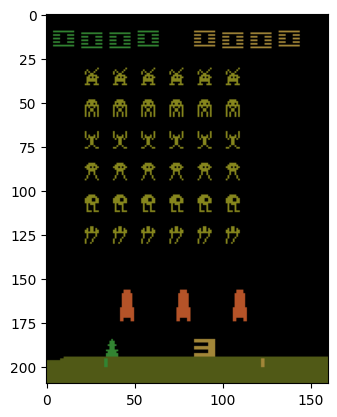

In [15]:
observation = env.reset()
for i in range(22):
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, reward, done, info = env.step(1)

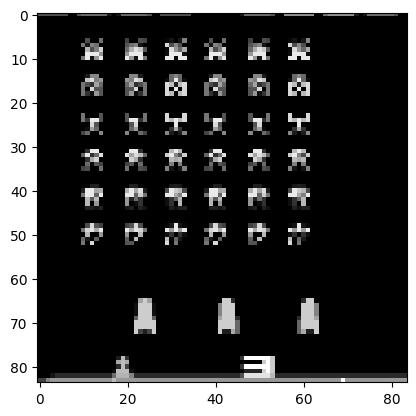

(210, 160, 3)
(84, 84)


In [16]:
# Mostrar las entradas preprocesadas en escala de grises y comparar originales y preprocesados.
processor = AtariProcessor()
obs_preprocessed = processor.process_observation(observation).reshape(INPUT_SHAPE)
# Seleccionamos el primer frame y lo normalizamos
frame = processor.process_state_batch(obs_preprocessed)
# Visualizar en escala de grises
plt.imshow(frame, cmap='gray')
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

### 3.6 Clase ReplayMemory

In [17]:
class ReplayMemory:
    """ReplayMemory optimizada para evitar fugas de memoria"""

    def __init__(self, capacity, state_shape):
        self.capacity = capacity
        self.position = 0
        self.size = 0

        # Pre-asignar arrays con el tamaño exacto
        # Usar uint8 para estados (más eficiente que float32)
        self.states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.actions = np.zeros(capacity, dtype=np.int32)
        self.rewards = np.zeros(capacity, dtype=np.float32)
        self.next_states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.dones = np.zeros(capacity, dtype=np.bool_)

        print(f" [INFO] - ReplayMemory creada: {capacity} samples, {state_shape} shape")
        memory_size = (
            self.states.nbytes + self.next_states.nbytes +
            self.actions.nbytes + self.rewards.nbytes + self.dones.nbytes
        ) / (1024 * 1024)
        print(f" [INFO] - Memoria asignada: {memory_size:.2f} MB")

    def append(self, state, action, reward, next_state, done):
        """Añade una experiencia al buffer de forma eficiente"""
        # Convertir a uint8 para ahorrar memoria (estados son imágenes 0-255)
        if state.dtype != np.uint8:
            state = (state * 255).astype(np.uint8)
        if next_state.dtype != np.uint8:
            next_state = (next_state * 255).astype(np.uint8)

        # Almacenar directamente en el array pre-asignado
        self.states[self.position] = state
        self.actions[self.position] = action
        self.rewards[self.position] = reward
        self.next_states[self.position] = next_state
        self.dones[self.position] = done

        # Actualizar posición circular
        self.position = (self.position + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)

    def sample(self, batch_size):
        """Muestra un batch de experiencias de forma eficiente"""
        if self.size < batch_size:
            raise ValueError(f"No hay suficientes samples ({self.size}) para batch_size ({batch_size})")

        # Generar índices aleatorios
        indices = np.random.choice(self.size, batch_size, replace=False)

        # Extraer batch y convertir de vuelta a float32 para el entrenamiento
        batch_states = self.states[indices].astype(np.float32) / 255.0
        batch_actions = self.actions[indices]
        batch_rewards = self.rewards[indices]
        batch_next_states = self.next_states[indices].astype(np.float32) / 255.0
        batch_dones = self.dones[indices]

        return batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones

    def __len__(self):
        return self.size

    def clear(self):
        """Limpia la memoria de forma segura"""
        self.position = 0
        self.size = 0
        # No es necesario limpiar los arrays, se sobrescriben

### 3.7 Clase PerformanceMonitor

Actualmente no se usa, si se necesitase mayor detalle de la evolución de los entrenamientos se podría incluir en el Callback antes del entrenamiento. De momento no se usa!!!

In [18]:
# Clase para monitoreo de memoria y rendimiento
class PerformanceMonitor(tf.keras.callbacks.Callback):
    def __init__(self, save_path='diagnosticos'):
        self.save_path = save_path
        self.episode_times = []
        self.memory_usage = []
        self.current_episode = 0
        self.episode_start_time = None
        self.episode_start_memory = None

    def on_episode_begin(self, episode, logs={}):
        self.episode_start_time = time.time()
        self.episode_start_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        self.current_episode = episode
        print(f" [INFO] - Episodio {episode} comenzando. Memoria inicial: {self.episode_start_memory:.2f} MB")

    def on_episode_end(self, episode, logs={}):
        end_time = time.time()
        final_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        episode_duration = end_time - self.episode_start_time

        self.episode_times.append(episode_duration)
        self.memory_usage.append(final_memory)

        print(f" [INFO] - Episodio {episode} completado en {episode_duration:.2f} segundos")
        print(f" [INFO] - Memoria final: {final_memory:.2f} MB (cambio: {final_memory - self.episode_start_memory:.2f} MB)")

        # Guardar diagnóstico cada 5 episodios
        if (episode + 1) % 5 == 0:
            self.save_diagnostics(episode)

        # Forzar recolección de basura
        gc.collect()

    def save_diagnostics(self, episode):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.episode_times)
        plt.title('Tiempo por episodio')
        plt.ylabel('Segundos')
        plt.xlabel('Episodio')

        plt.subplot(1, 2, 2)
        plt.plot(self.memory_usage)
        plt.title('Uso de memoria')
        plt.ylabel('MB')
        plt.xlabel('Episodio')

        plt.tight_layout()
        plt.savefig(f"{self.save_path}/rendimiento_episodio_{episode+1}.png")
        plt.close()

### 3.8. Implementación de la red neuronal

#### Definición de las redes neuronales

Crearemos una clase para construir un red Q-profunda, con tres capas convolucionales, seguidas de una capa de aplanamiento y una capa completamente conectada.

In [19]:
def create_dqn_model(input_shape, nb_actions, memory_size):
    """
    Crea un modelo DQN usando SOLO Keras estándar. Base común para redes DQN y DDQN
    Red neuronal Deep Q-Network (DQN) para aproximar la función Q en aprendizaje por refuerzo.
    Construye un modelo que acepta channels_first y convierte internamente

    Esta función implementa una red convolucional que recibe un estado (conjunto de frames)
    y produce los valores Q para cada acción posible. Usa capas convolucionales seguidas
    de capas totalmente conectadas, con activación RELU.
    Esto evita completamente los problemas de grafos múltiples
    """
    print(f"🏗️ Creando modelo DQN estándar: input_shape={input_shape}, actions={nb_actions}")
       
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)

    # Convertir a channels_last usando Permute
    x = Permute((2, 3, 1), name='convert_to_channels_last')(inputs)  # (84, 84, 4)
    # Red convolucional estándar
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', name='conv1', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid', name='conv2')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', name='conv3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='dense1')(x)
    outputs = Dense(nb_actions, activation='linear', name='q_values')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='DQN_Model')
    memory = None
    
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    
    return model, memory, None

In [20]:
def create_ddqn_models(input_shape, nb_actions, memory_size):
    """
    Crea modelos para Double DQN (principal y objetivo)
    """
    print(f"🏗️ Creando modelos DDQN: input_shape={input_shape}, actions={nb_actions}")
    
    # Modelo principal
    main_model, _, _ = create_dqn_model(input_shape, nb_actions, memory_size)
    main_model._name = 'DDQN_Main_Model'    
    
    # Modelo objetivo (copia exacta)
    target_model = tf.keras.models.clone_model(main_model)
    target_model.set_weights(main_model.get_weights())
    target_model._name = 'DDQN_Target_Model'
    #Pequeño buffer para que entrene paso a paso
    memory = SequentialMemory(limit=10000, window_length=WINDOW_LENGTH)
    
    print("✅ Modelos DDQN creados exitosamente")    
    return main_model, memory, target_model

In [21]:
def create_ddqn_replay_model(input_shape, nb_actions, memory_size):
    print(f"🏗️ Creando modelos DDQN_replay: input_shape={input_shape}, actions={nb_actions}")
    
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)

    # Convertir a channels_last usando Permute
    x = Permute((2, 3, 1), name='convert_to_channels_last')(inputs)  # (84, 84, 4)
    # Red convolucional estándar
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', name='conv1', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid', name='conv2')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', name='conv3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='dense1')(x)
    outputs = Dense(nb_actions, activation='linear', name='q_values')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='DDQN_replay_Main_Model')
    memory = SequentialMemory(limit=memory_size, window_length=WINDOW_LENGTH)
    target_model = clone_model(model)  # Create target model for DDQN
    target_model.set_weights(model.get_weights())  # Initialize with same weights
    target_model._name = 'DDQN_replay_Target_Model'    
    
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    return model, memory, target_model

In [22]:
def create_dueling_dqn_replay_model(input_shape, action_size, memory_size):
    """
    Crea un modelo Dueling DQN con replay.
    """
    print(f"🏗️ Creando modelo DUELING_DQN_REPLAY: input_shape={input_shape}, actions={action_size}")
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)    
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid')(x)
    x = Flatten()(x)
    # Value stream
    value = Dense(512, activation='relu')(x)
    value = Dense(1, activation='linear')(value)
    # Advantage stream
    advantage = Dense(512, activation='relu')(x)
    advantage = Dense(action_size, activation='linear')(advantage)
    # Combine streams
    outputs = Add()([value, Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)])
    model = Model(inputs=inputs, outputs=outputs, name='DuelingDQNReplay_Main_Model')
    memory = SequentialMemory(limit=memory_size, window_length=WINDOW_LENGTH)   
    target_model = clone_model(model)
    target_model.set_weights(model.get_weights())    
    target_model._name = 'DuelingDQNReplay_Target_Model'     
   
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    return model, memory, target_model

### 3.9. Implementación de la solución DQN

#### 3.9.1 Funciones auxiliares

In [23]:
def load_model_checkpoint(model, memory, target_model, model_name, checkpoint_dir="checkpoints", suffix="lastest"):
    """
    Carga pesos y estado para componentes separados (modelo, memoria, target_model).
    
    Parámetros:
    -----------
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None)
        model_name: Tipo del modelo ('DDQN_REPLAY', 'DUELING_DQN_REPLAY', etc.)
        checkpoint_dir: Directorio donde buscar los checkpoints
        suffix: Tipo de checkpoint a cargar ("lastest", "best", o "epXXX")

    Retorna:
    --------
        tuple: (episode, steps, epsilon) - El episodio, pasos y epsilon desde donde continuar
               Si no se encuentra el checkpoint, devuelve (0, 0, 0.1)
    """  
    # Valores predeterminados
    episode = 0
    steps = 0
    epsilon = 0.1  # Valor por defecto
    
    # Definir las rutas de los archivos
    main_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_model.h5"
    target_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_target.h5"
    memory_path = f"{checkpoint_dir}/{model_name}_{suffix}_memory.pkl"
    state_path = f"{checkpoint_dir}/{model_name}_{suffix}_state.json"    
      
    try:    
        # Cargar estado del entrenamiento
        if not os.path.exists(state_path):
            print(f"⚠️ No se encontró el checkpoint {suffix} para {model_name}")
            return episode, steps, epsilon 
        else:
            print(f"📂 Se cargó: {state_path}")        

        with open(state_path, 'r') as f:
            state = json.load(f)
            
        # Extraer información básica
        episode = state.get('episode', 0)
        steps = state.get('global_steps', 0)
        epsilon = state.get('epsilon', 0.1)
        
        print(f"📂 Cargando checkpoint {suffix} (episodio: {episode}, pasos: {steps}, epsilon: {epsilon})")
        
    except Exception as e:
        print(f"⚠️ Error al cargar el archivo de estado: {e}")
        
    # Cargar modelo principal
    if os.path.exists(main_model_path):
        try:
            model.load_weights(main_model_path)
            print(f"📂 Modelo principal cargado: {main_model_path}")
        except Exception as e:
            print(f"❌ [ERROR] - Error al cargar el modelo principal: {e}")
            return 0, 0, 0.1  # Si falla la carga del modelo principal, mejor empezar desde cero
    else:
        print(f"❌ [ERROR] - No se encontró el archivo del modelo principal: {main_model_path}")
        return 0, 0, 0.1       

    # Cargar modelo target si existe y se proporcionó
    if target_model is not None:
        if os.path.exists(target_model_path):
            try:
                target_model.load_weights(target_model_path)
                print(f"📂 Modelo target cargado: {target_model_path}")
            except Exception as e:
                print(f"⚠️ [WARNING] - Error al cargar el modelo target: {e}")
                # Si hay error, sincronizar con el principal
                print("🔄 Sincronizando red target desde la principal...")
                target_model.set_weights(model.get_weights())
        else:
            # Si no existe el archivo, sincronizar con el principal
            print("🔄 No se encontró archivo target, sincronizando desde la principal...")
            target_model.set_weights(model.get_weights())
          
    # Cargar memoria si corresponde al tipo de modelo
    if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY'] and memory is not None and os.path.exists(memory_path):
        try:              
            with open(memory_path, 'rb') as f:
                loaded_memory = pickle.load(f)                
                
            # Transferir contenido no reemplazar objeto
            memory_loaded = False
            # Estructura SequentialMemory (Keras-RL)
            if hasattr(loaded_memory, 'observations') and hasattr(memory, 'observations'):
                memory.observations = loaded_memory.observations
                memory.actions = loaded_memory.actions
                memory.rewards = loaded_memory.rewards
                memory.terminals = loaded_memory.terminals
                if hasattr(loaded_memory, 'observations_'):
                    memory.observations_ = loaded_memory.observations_
                memory_loaded = True
            elif hasattr(loaded_memory, 'buffer') and hasattr(memory, 'buffer'):
                memory.buffer = loaded_memory.buffer
                memory.position = loaded_memory.position
                if hasattr(loaded_memory, 'size'):
                    memory.size = loaded_memory.size
                memory_loaded = True

            if memory_loaded:
                print(f"📂 Memoria cargada correctamente: {memory_path}")
            else:
                print(f"⚠️ Estructura de memoria desconocida, no se pudo cargar")

        except Exception as e:
            print(f"⚠️ Error al cargar la memoria: {e}")    
    
    return episode, steps, epsilon

In [24]:
# Función auxiliar para convertir objetos no serializables a JSON
def convert_to_json_serializable(obj):
    """Convierte tipos numpy a tipos Python nativos para serialización JSON"""
    if isinstance(obj, (np.integer, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.bool_):
        return bool(obj)
    elif isinstance(obj, (datetime.datetime, datetime.date)):
        return obj.isoformat()
    else:
        # Para cualquier otro tipo no reconocido
        return str(obj)

In [25]:
def save_model_checkpoint(agent, model_name, episode=0, steps=0, 
                          checkpoint_dir="checkpoints", suffix="lastest", epsilon=0.1):
    """           
    Guarda el modelo, la memoria de repetición y el estado del entrenamiento.
    
    Esta función guarda los pesos de un modelo de red neuronal en un archivo HDF5 (.h5) y, para modelos con memoria
    de repetición (como DDQNetworkWithReplay o DuelingDQNetworkWithReplay), guarda la memoria en un archivo pickle (.pkl).
    Los archivos se nombran usando un prefijo basado en la clase del modelo y el número de episodio, siguiendo el formato
    `{prefijo}_checkpoint_ep{episode}.h5` para pesos y `{prefijo}_memory_ep{episode}.pkl` para memoria.    

    Parámetros:
    -----------
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None)
        model_name: Nombre base del modelo (ej: 'DQN', 'DDQN_REPLAY')
        episode: Número del episodio actual
        steps: Pasos globales acumulados
        checkpoint_dir: Directorio donde guardar los checkpoints
        suffix: Tipo de checkpoint ("lastest", "best", o "epXXX")
        
        model : tensorflow.keras.Model-  El modelo principal de red neuronal que se desea guardar.
        memory : objeto de memoria-      La memoria de repetición utilizada para almacenar experiencias de entrenamiento.
                                         Puede ser SequentialMemory, ReplayBuffer u otra implementación compatible.
        target_model : tensorflow.keras.Model-         El modelo target utilizado en algoritmos como DDQN. Es una copia del modelo principal
            que se actualiza periódicamente durante el entrenamiento.
        model_name : str-                Nombre identificativo del modelo ('DQN', 'DDQN', 'DDQN_REPLAY', 'DUELING_DQN_REPLAY', etc.).
                                         Se utiliza para nombrar los archivos de checkpoint.
        episode : int, opcional-         Número del episodio actual de entrenamiento. Por defecto es 0.
        steps : int, opcional-           Número total de pasos (interacciones con el entorno) realizados. Por defecto es 0.

        checkpoint_dir : str, opcional-  Directorio donde se guardarán los archivos de checkpoint. Por defecto es "checkpoints".

        suffix : str, opcional-          Sufijo para identificar el tipo de checkpoint ("lastest", "best", o "epXXX"). Por defecto es "lastest".

        epsilon : float, opcional-       Valor actual de epsilon para la política epsilon-greedy. Por defecto es 0.1.
        force_override: Si es True, sobrescribe incluso los checkpoints 'best'    

    Retorna:
    --------
        None
    """   
    # Asegurar que existe el directorio
    os.makedirs(checkpoint_dir, exist_ok=True)
    # Puedes intentar limpiar la memoria de Python no usada explícitamente antes de medir
    gc.collect()     
    
    # Definir las rutas de los archivos
    main_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_model.h5"
    target_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_target.h5"
    memory_path = f"{checkpoint_dir}/{model_name}_{suffix}_memory.pkl"
    state_path = f"{checkpoint_dir}/{model_name}_{suffix}_state.json"    
    
    # PROTECCIÓN DE CHECKPOINTS EXISTENTES
    # Si es un checkpoint "best" y estamos intentando guardarlo con episodio 0
    if ("best" in suffix or "lastest" in suffix) and episode == 0:
        # Verificar si ya existe un mejor checkpoint con episodio > 0
        state_path = f"{checkpoint_dir}/{model_name}_best_state.json"
        if os.path.exists(state_path):
            try:
                with open(state_path, 'r') as f:
                    existing_state = json.load(f)
                existing_episode = existing_state.get('episode', 0)
                
                if existing_episode > 0:
                    print(f"🛡️ Protegiendo checkpoint '{suffix}' existente (ep: {existing_episode})")
                    print(f"❌ NO se guardará un nuevo checkpoint con episodio 0")
                    return
            except Exception as e:
                print(f"⚠️ Error verificando checkpoint existente: {e}")

    try:
        # Guardar pesos del modelo principal
        if hasattr(agent, 'model'):
            agent.model.save_weights(main_model_path)
            print(f"💾 Guardado modelo principal {suffix}: {main_model_path}")               
        else:
            print(f"⚠️ El agente no tiene el atributo 'model'")          
        
        # Guardar pesos del modelo target si existe
        if hasattr(agent, 'target_model') and agent.target_model is not None:
            agent.target_model.save_weights(target_model_path)      
            print(f"💾 Guardado modelo target {suffix}: {target_model_path}")         
        else:
            print(f"⚠️ El agente no tiene el atributo 'target_model' o es None")            

        # Preparar el estado del entrenamiento - Con conversión a tipos Python nativos
        state = {
            'episode': int(episode),  
            'global_steps': int(steps),  
            'epsilon': float(epsilon),        
            'timestamp': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }              
        
        # Si hay una política específica en el agente
        if hasattr(agent, 'policy'):
            policy_state = {}
            
            # Intentar guardar el estado de la política
            if hasattr(agent.policy, 'eps'):
                policy_state['eps'] = float(agent.policy.eps)  # Convertir a float Python
        
            # Si la política tiene más atributos relevantes
            for attr in ['value_max', 'value_min', 'value_test', 'nb_steps']:
                if hasattr(agent.policy, attr):
                    value = getattr(agent.policy, attr)
                    if isinstance(value, (np.integer, np.floating, np.bool_)):
                        value = value.item()  # Convierte cualquier tipo numpy a su equivalente Python
                    policy_state[attr] = value
            
            if policy_state:
                state['policy'] = policy_state                  
               
        # Guardar memoria de repetición para modelos con replay
        if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY'] and hasattr(agent, 'memory') and agent.memory is not None:
            try:
                # Usar compresión máxima
                with open(memory_path, 'wb') as f:
                    pickle.dump(agent.memory, f)
                print(f"💾 Memoria {suffix} guardada: {memory_path}")  
            except Exception as e:
                print(f"⚠️ No se pudo guardar la memoria: {e}")       
        
        # Guardar el estado
        with open(state_path, 'w') as f:
            json.dump(state, f, indent=2, default=convert_to_json_serializable)
        
        print(f"💾 Checkpoint {suffix} guardado (ep: {episode}, pasos: {steps})")  
    
    except Exception as e:
        print(f"⚠️ Error guardando checkpoint {suffix}: {e}")

    return

#### 3.9.2 Funciones callback

In [26]:
class SimpleProgressCallback(tf.keras.callbacks.Callback):
    """
    Callback personalizado para monitorear el progreso del entrenamiento de un agente DQN.

    Registra el avance en términos de pasos completados, porcentaje, velocidad de entrenamiento
    (pasos por segundo) y tiempo estimado de finalización (ETA).

    Atributos:
        total_steps (int): Número total de pasos de entrenamiento.
        print_interval (int): Intervalo de pasos para imprimir el progreso (por defecto: 10,000).
        start_time (float): Tiempo de inicio del entrenamiento (en segundos).
        last_step (int): Último paso registrado (inicializado en 0).
    """
    def __init__(self, total_steps, print_interval=100):
        """
        Inicializa el callback.

        Args:
            total_steps (int): Número total de pasos de entrenamiento.
            print_interval (int): Intervalo de pasos para imprimir el progreso.
        """
        super().__init__()
        self.total_steps = total_steps
        self.print_interval = print_interval
        self.step_counter = 0
        self.start_time = time.time()
        self.episode_rewards = []  # Store clipped episode rewards
        self.episode_steps = []
        self.current_episode_reward = 0.0  # Track clipped reward for current episode

    def on_train_begin(self, logs={}):
        """
        Se ejecuta al inicio del entrenamiento.

        Inicializa el tiempo de inicio y muestra un mensaje de comienzo.

        Args:
            logs (dict): Diccionario de métricas (no utilizado aquí).
        """
        self.start_time = time.time()
        print(f"🚀 Entrenamiento iniciado: {self.total_steps:,} pasos")

    def on_step_end(self, step, logs={}):
        """
        Se ejecuta al final de cada paso de entrenamiento.

        Calcula y muestra el progreso, incluyendo porcentaje completado, velocidad
        (pasos por segundo) y tiempo estimado de finalización (ETA) en horas.

        Args:
            step (int): Número del paso actual.
            logs (dict): Diccionario de métricas (no utilizado aquí).
        """
        self.step_counter += 1        
        raw_reward = logs.get('reward', 0.0)
        clipped_reward = np.clip(raw_reward, -1.0, 1.0)  # Match AtariProcessor clipping
        self.current_episode_reward += clipped_reward
        if self.step_counter % self.print_interval == 0:
            progress = (self.step_counter / self.total_steps) * 100
            elapsed_time = (time.time() - self.start_time)
            steps_per_sec = self.step_counter / elapsed_time
            eta_hours = (self.total_steps - self.step_counter) / steps_per_sec / 3600
            memory_usage = psutil.Process().memory_info().rss / (1024 ** 2)
            print(f"📊 Paso {self.step_counter:,}/{self.total_steps:,} ({progress:.1f}%) - "
                  f"{steps_per_sec:.1f} pasos/seg - ETA: {eta_hours:.1f}h - Memoria: {memory_usage:.2f} MB")
    
    def on_episode_end(self, episode, logs={}):
        nb_steps = logs.get('nb_episode_steps', 1)
        self.episode_rewards.append(self.current_episode_reward)
        self.episode_steps.append(nb_steps)
        mean_reward = self.current_episode_reward / nb_steps if nb_steps > 0 else 0
        print(f"📈 Episodio {episode+1}: Recompensa total (clipped): {self.current_episode_reward:.3f}, "
              f"Pasos: {nb_steps}, Mean Reward Calculado: {mean_reward:.6f} (Recompensa/Pasos)")
        # Reset for next episode
        self.current_episode_reward = 0.0            
            

In [27]:
class TargetRewardTracker(tf.keras.callbacks.Callback):
    """
    Callback que monitorea el progreso hacia una media de episode_reward objetivo
    e integra con nuestro sistema de checkpoints.
    """      
    def __init__(self, dqn, target_avg_reward=20.0, name_model=None, window_size=100, save_best=True, checkpoint_dir=checkpoint_path):
        super().__init__()
        self.target_avg_reward = target_avg_reward
        self.window_size = window_size
        self.save_best = save_best
        # Obtener el nombre del modelo sin ruta
        self.model = dqn
        self.model_name = name_model
        self.episode_count = 0
        self.episode_rewards = []
        self.best_avg_reward = float('-inf')
        self.episodes_at_target = 0
        self.consecutive_target_episodes = 0
        self.checkpoint_dir =  f"{checkpoint_path}/{self.model_name}"
        os.makedirs(self.checkpoint_dir, exist_ok=True)       
        
        print(f"🎯 OBJETIVO: Media de episode_reward = {target_avg_reward}")
        print(f"📊 Ventana de evaluación: {window_size} episodios")        

    def on_episode_end(self, episode, logs=None):
        logs = logs or {}
        # Forzar recolección de basura
        gc.collect()        
        
        self.episode_count += 1
        episode_reward = logs.get('episode_reward', 0)
        # Convert NumPy types to Python types
        if isinstance(episode_reward, np.floating):
            episode_reward = episode_reward.item()
        self.episode_rewards.append(episode_reward)
        
        # Calcular media móvil
        if len(self.episode_rewards) >= self.window_size or self.episode_count % 10 == 0:
            recent_rewards = self.episode_rewards[-self.window_size:]
            current_avg = np.mean(recent_rewards)
            
            # Verificar si alcanzamos el objetivo
            target_reached = current_avg >= self.target_avg_reward
            
            if target_reached:
                self.episodes_at_target += 1
                self.consecutive_target_episodes += 1
            else:
                self.consecutive_target_episodes = 0
            
            # Guardar si es el mejor promedio
            if current_avg > self.best_avg_reward or self.episode_count % 10 == 0:
                self.best_avg_reward = current_avg
                if self.save_best and hasattr(self, 'model') and self.episode_count % 50 == 0:
                    # Formato del sufijo para el mejor modelo con su promedio
                    best_suffix = f"best_avg{current_avg:.1f}"                               
                    try:
                        epsilon = self.model.policy.eps if hasattr(self.model, 'policy') and hasattr(self.model.policy, 'eps') else 0.1
                       
                        # Usar nuestro sistema de checkpoint para guardar el mejor modelo
                        if hasattr(self.model, 'model'): # Por si el agente es un DQNAgent con un .model                                       
                            # También actualizar el checkpoint "best" general
                            save_model_checkpoint(   self.model,    self.model_name,
                                episode=self.episode_count,     steps=getattr(self.model, 'step', 0),
                                checkpoint_dir=self.checkpoint_dir,   suffix="best", 
                                epsilon=epsilon
                            )
                        else:
                            # Si no es un agente completo, guardar solo los pesos
                            best_filename = f"{self.checkpoint_dir}/{self.model_name}_{best_suffix}_model.h5"
                            self.model.save_weights(best_filename, overwrite=True)                        
                            
                        # Guardar métricas en JSON
                        metrics = {
                            "episode": int(self.episode_count),
                            "avg_reward": float(current_avg),
                            "best_avg_reward": float(self.best_avg_reward),
                            "timestamp": int(time.time()),
                            "consecutive_target_episodes": int(self.consecutive_target_episodes),
                            "episodes_at_target": int(self.episodes_at_target)
                        }
                        metrics_file = f"{self.checkpoint_dir}/{self.model_name}_{best_suffix}_metrics.json"
                        with open(metrics_file, 'w') as f:
                            json.dump(metrics, f, indent=2, default=str)
                        
                        print(f"💾 NUEVO MEJOR PROMEDIO: {current_avg:.2f} - Guardado en {self.checkpoint_dir}")
                    except Exception as e:
                        print(f"⚠️ [ERROR] - Error guardando mejor modelo: {e}")
            
            # Mostrar progreso cada 50 episodios
            if self.episode_count % 50 == 0:
                progress_pct = (current_avg / self.target_avg_reward) * 100
                target_status = "🎯 OBJETIVO ALCANZADO!" if target_reached else f"📈 {progress_pct:.1f}% del objetivo"
                
                print(f"\n📊 EPISODIO {self.episode_count} - PROGRESO HACIA OBJETIVO")
                print(f"   Reward actual: {episode_reward:.2f}")
                print(f"   Media últimos {self.window_size}: {current_avg:.2f} / {self.target_avg_reward}")
                print(f"   Mejor promedio histórico: {self.best_avg_reward:.2f}")
                print(f"   Estado: {target_status}")
                print(f"   Episodios en objetivo: {self.episodes_at_target}")
                print(f"   Episodios consecutivos en objetivo: {self.consecutive_target_episodes}")
                
                if self.consecutive_target_episodes >= 50:
                    print(f"🏆 ¡MODELO ESTABLE EN OBJETIVO! {self.consecutive_target_episodes} episodios consecutivos")
    
    def on_train_end(self, logs=None):
        """Resumen final del entrenamiento"""
        logs = logs or {}
        if len(self.episode_rewards) >= self.window_size:
            final_avg = np.mean(self.episode_rewards[-self.window_size:])
            objetivo_alcanzado = final_avg >= self.target_avg_reward
            
            print(f"\n🏁 RESUMEN FINAL DEL ENTRENAMIENTO")
            print(f"   Total episodios: {self.episode_count}")
            print(f"   Media final últimos {self.window_size}: {final_avg:.2f}")
            print(f"   Objetivo ({self.target_avg_reward}): {'✅ ALCANZADO' if objetivo_alcanzado else '❌ NO ALCANZADO'}")
            print(f"   Mejor promedio histórico: {self.best_avg_reward:.2f}")
            print(f"   Episodios que alcanzaron objetivo: {self.episodes_at_target}")
            
            # Save final metrics to JSON
            final_metrics = {
                "total_episodes": int(self.episode_count),
                "final_avg_reward": float(final_avg),
                "target_reached": bool(objetivo_alcanzado),
                "best_avg_reward": float(self.best_avg_reward),
                "episodes_at_target": int(self.episodes_at_target),
                "consecutive_target_episodes": int(self.consecutive_target_episodes)  
            }
            final_log_path = f"{self.checkpoint_dir}/final_metrics.json"
            try:
                with open(final_log_path, 'w') as f:
                    json.dump(final_metrics, f, indent=2, default=str)                                    
                print(f"💾 Métricas finales guardadas en: {final_log_path}")
            except Exception as e:
                print(f"⚠️ Error al guardar métricas finales: {e}")           

In [28]:
class CustomFileLogger(FileLogger):
    def __init__(self, filepath, interval=100):
        super().__init__(filepath, interval)
        self.step = 0  
        self.filepath = filepath
        self.interval = interval
        self.current_episode_reward = 0.0
        self.logs = {}        
    
    def on_step_end(self, step, logs={}):
        self.step += 1  
        if self.step % self.interval == 0:
            episode_logs = {}
        raw_reward = logs.get('reward', 0.0)
        self.current_episode_reward += np.clip(raw_reward, -1.0, 1.0)

    def on_episode_end(self, episode, logs):
        metrics = logs.copy()
        metrics['episode_reward'] = self.current_episode_reward
        metrics['mean_reward_step'] = self.current_episode_reward / metrics.get('nb_episode_steps', 1)
        metrics = {k: float(v) if isinstance(v, np.floating) else v for k, v in metrics.items()}
        self.metrics[int(episode)] = metrics
        if self.step % self.interval == 0:
            with open(self.filepath, 'w') as f:
                json.dump(self.metrics, f, indent=2, default=str)                
        self.current_episode_reward = 0.0

In [29]:
class EpisodeCheckpointCallback(tf.keras.callbacks.Callback):
    """
    Callback para guardar checkpoints episódicamente usando nuestras funciones personalizadas.
    """    
    def __init__(self, dqnet, checkpoint_path, save_freq=100, model_name='DQN'):
        """
        Inicializa el callback.
        
        Parametros:
            dqnet: El agente DQN a guardar
            checkpoint_path: Ruta donde guardar los checkpoints
            save_freq: Frecuencia de episodios para guardar
            model_name: Nombre base para los archivos de checkpoint
        """        
        super().__init__()
        self.save_freq = save_freq
        self.model_name = model_name
        self.checkpoint_path = f"{checkpoint_path}/{self.model_name}"
        self.episode_counter = 0
        self.dqnet = dqnet
        os.makedirs(checkpoint_path, exist_ok=True)
    
    def on_episode_end(self, episode, logs={}):
        """
        Guarda checkpoint al final de ciertos episodios.
        """        
        self.episode_counter += 1
        if self.episode_counter % self.save_freq == 0:
            try:       
                epsilon = self.dqnet.policy.eps if hasattr(self.dqnet, 'policy') and hasattr(self.dqnet.policy, 'eps') else 0.1
                # También actualizar el checkpoint "lastest"
                save_model_checkpoint(
                    self.dqnet, 
                    self.model_name,
                    episode=self.episode_counter,
                    steps=self.dqnet.step, 
                    checkpoint_dir=self.checkpoint_path, 
                    suffix="lastest",
                    epsilon=epsilon
                )                
                print(f"✅ Checkpoint guardado para episodio {self.episode_counter}")        
                        
            except Exception as e:
                print(f"❌ [ERROR] - Error al guardar checkpoint para episodio {self.episode_counter}: {str(e)}")              

### 🏋️ 3.10 **ENTRENAMIENTO** !!!!

In [30]:
def entrenar_modelo(env,  model_name,  model, memory, target_model, model_instance=False, 
        start_episode=0, start_steps=0, model_training=True,
        batch_size=batch_size, learning_rate=learning_rate, checkpoint_path='checkpoints',
        input_shape=MODEL_INPUT_SHAPE, memoria_tamano=memory_size, warmup_steps=WARMUP_STEPS,
        target_update_interval=TARGET_UPDATE_INTERVAL, target_update_tau=tau, epsilon_start=epsilon_start,
        epsilon_min=0.1, epsilon_steps=EPSILON_STEPS, num_steps=NUM_TRAINING_STEPS, target_reward=TARGET_REWARD,
        enable_double_dqn = False):     
    """
    Entrena un modelo DQN con el entorno proporcionado
    
    Parámetros:
    -----------
        env: El entorno de Gym
        model_name: Nombre identificador del modelo ('DQN', 'DDQN', etc.)
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None para DQN)        
        model_instance: Flag que determina si existe modelo cargado (si False, se crea uno nuevo)
        checkpoint_path: Ruta donde guardar checkpoints
        start_episode: Episodio desde donde continuar el entrenamiento
        start_steps: Pasos desde donde continuar el entrenamiento
        model_training: Flag que determina si se tiene que entrenar el modelo o sólo crear el agente
        batch_size: Tamaño del lote para el entrenamiento
        learning_rate: Tasa de aprendizaje del optimizador
        input_shape: Forma de la entrada para el modelo
        memoria_tamano: Tamaño de la memoria de repetición
        warmup_steps: Pasos de calentamiento antes del entrenamiento
        target_update_interval: Intervalo para actualizar la red objetivo
        target_update_tau: Factor de actualización suave para la red objetivo
        epsilon_start: Valor inicial de epsilon para exploración
        epsilon_min: Valor mínimo de epsilon para exploración
        epsilon_steps: Número de pasos para decrementar epsilon
        num_steps: Número total de pasos de entrenamiento
        target_reward: Recompensa objetivo para considerar resuelto el entorno
        enable_double_dqn: Si es True, usa DDQN; si no, usa DQN estándar
        
    Retorna:
    --------
        tuple: (agente_entrenado, éxito) - Modelo entrenado y booleano indicando éxito    
    """
    # Nombre del modelo para logs y checkpoints
    name_model = model_name.upper()    
    print(f"🤖 {'Continuando' if model_instance else 'Creando'} entrenamiento para {name_model}...")
        
    # Inicializar dqn desde el principio para evitar referencia antes de asignación
    dqn = None      
    save_checkpoint_path = f"{checkpoint_path}/{model_name}"
    # Inicializar callbacks al principio para asegurarnos de que siempre esté definido
    callbacks = []
    # Verificar target_model solo si estamos usando DDQN
    if enable_double_dqn and target_model is None:
        raise ValueError("Para DDQN, el target_model no puede ser None.")
            
    # Crear el procesador Atari
    processor = AtariProcessor()   
    try:  
        # Verificar que tenemos un modelo válido
        if model is None:
            raise ValueError("El modelo principal no puede ser None.")              
        # Verificar target_model solo si estamos usando DDQN
        if enable_double_dqn and target_model is None:
            raise ValueError("Para DDQN, el target_model no puede ser None.")

        # Verificar si la memoria ya se creó o necesitamos crearla
        if memory is None:
             memory = SequentialMemory(limit=memory_size, window_length=WINDOW_LENGTH)
         # Para DDQN ejecutar paso a paso, así vermos diferencia con DDQN_REPLAY
        if model_name in ['DDQN']:
            train_interval_param = WINDOW_LENGTH
            warmup_steps_param = 1000
        else:
            train_interval_param = WINDOW_LENGTH
            warmup_steps_param = warmup_steps
        
        # Política de exploración
        policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                                     attr='eps',
                                     value_max=epsilon_start, 
                                     value_min=epsilon_min, 
                                     value_test=.05,
                                     nb_steps=epsilon_steps)  
        # Crear agente DQN
        dqn = DQNAgent(
            model=model,
            nb_actions=env.action_space.n,
            memory=memory,
            processor=processor,
            nb_steps_warmup=warmup_steps_param,
            target_model_update=target_update_interval if enable_double_dqn else 10000,
            enable_double_dqn=enable_double_dqn,
            policy=policy,
            gamma=0.99,
            train_interval=train_interval_param,
            delta_clip=1.0,
            batch_size=batch_size
        )                
        # Después de crear el agente, reemplazar el target_model si estamos usando DDQN
        if enable_double_dqn and target_model is not None:
            dqn.target_model = target_model            

        # Compilar el agente
        optimizer = Adam(learning_rate=learning_rate)  
        dqn.compile(optimizer=optimizer, metrics=['mae'])

    except Exception as e:
        print(f"❌ Error al crear o compilar el agente: {str(e)}")
        return None, False
        
    # Verificar que tenemos un agente válido antes de continuar
    if dqn is None:
        print(f"❌ Error: No se pudo inicializar el agente DQN")
        return None, False        
    try:
        # Si tenemos que entrenar el agente... sino sólo se creo (para evaluar)
        if(model_training):
            # DEBUG --------------------
            # callbacks = [
            #     log_filename = f'{checkpoint_path}/{name_model}_log.json'
            #     progress_callback,
            #     ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
            #     CustomFileLogger(log_filename, interval=1000),
            #     PerformanceMonitor(save_path='diagnosticos')
            # ]
            # Callbacks optimizados para el objetivo
            callbacks = [
                SimpleProgressCallback(num_steps, print_interval=20000),         
                TargetRewardTracker(dqn,target_avg_reward=target_reward, name_model=name_model, window_size=100, 
                                    save_best=True, checkpoint_dir=checkpoint_path),
                EpisodeCheckpointCallback(dqn, checkpoint_path=checkpoint_path, save_freq=1000, model_name=name_model)    
            ]         

             # Ajustar el número de pasos restantes si estamos continuando el entrenamiento
            adjusted_steps = max(0, num_steps - start_steps)
            if start_steps > 0:
                print(f"Continuando desde el paso {start_steps} (quedan {adjusted_steps} pasos)")

            print(f"Iniciando entrenamiento de {name_model} por {adjusted_steps} pasos...")
            start_time = time.time()       
            # Fit del agente al entorno
            history = dqn.fit(env, nb_steps=adjusted_steps, callbacks=callbacks, verbose=2)

            training_time = (time.time() - start_time) / 60
            print(f"Entrenamiento completado en {training_time:.2f} minutos")

            # Guardar checkpoint final
            # Verificar correctamente las claves disponibles y usar la adecuada
            if hasattr(history, 'history'):
                if 'episode' in history.history and history.history['episode']:
                    episode = start_episode + history.history['episode'][-1]
                elif 'nb_episode' in history.history and history.history['nb_episode']:
                    episode = start_episode + history.history['nb_episode'][-1]
                else:
                    # Intentar obtener el episodio del agente directamente
                    episode = getattr(dqn, 'episode', start_episode)
            else:
                episode = start_episode        
            steps = start_steps + adjusted_steps
            epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1          
            try:
                save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                    checkpoint_dir=save_checkpoint_path, suffix="lastest", 
                                    epsilon=epsilon)

                # También guardar como "best" si no hay un checkpoint "best" previo
                save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                        checkpoint_dir=save_checkpoint_path, suffix="best", 
                                        epsilon=epsilon)
            except Exception as e:
                print(f"⚠️ Error al guardar el modelo: {str(e)}")

        return dqn, True    
    
    except KeyboardInterrupt:
        print("\nEntrenamiento interrumpido por el usuario") 
        # Guardar pesos de emergencia
        try:
            epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1
            episode = start_episode  # No podemos saber el episodio exacto después de la interrupción
            steps = start_steps + dqn.step if hasattr(dqn, 'step') else start_steps
            save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                checkpoint_dir=save_checkpoint_path, suffix="emergency", 
                                epsilon=epsilon)
            print("✅ Modelo guardado en estado de emergencia")
        except Exception as e:
            print(f"⚠️ Error al guardar el modelo de emergencia: {str(e)}")
        return dqn, True
        
    except Exception as e:
        print(f"\n❌ [ERROR] - Error durante el entrenamiento: {str(e)}")
        # Intentar guardar en estado de error
        try:
            epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1
            save_model_checkpoint(dqn, name_model, episode=start_episode, 
                                steps=start_steps + (dqn.step if hasattr(dqn, 'step') else 0),
                                checkpoint_dir=save_checkpoint_path, suffix="error_recovery", 
                                epsilon=epsilon)
            print("✅ Modelo guardado en estado de recuperación de error")
        except Exception as e2:
            print(f"⚠️ Error al guardar modelo de recuperación: {str(e2)}")
        return None, False

### 📊 3.11 **EVALUACION** !!!!

In [31]:
# Función para evaluar el modelo
def evaluar_modelo(agent, model_name, env, num_episodes=200, render=True, record_action=False):
    """
    Evalúa un modelo DQN o DDQN y si el modelo alcanza el objetivo de media

    Parámetros:
    -----------
        agent: Agente DQN entrenado
        model_name: Nobre del agente
        env: Entorno de gym
        num_episodes: Número de episodios para evaluar
        render: Si se debe mostrar la visualización
        record_video: Si se debe grabar video

    Retorna:
    --------
        Lista de recompensas por episodio
    """
    print(f"🎯 EVALUANDO MODELO {model_name}")
    print(f"📊 Evaluando por {num_episodes} episodios...")
    rewards = []
    rewards_clip = []    
    mejor_acciones = []
    mejor_state = 0
    state = 234
    
    # Variables para almacenar la mejor partida
    if(record_action):
        mejor_recompensa = float('-inf')
        mejor_episodio = None
    
    # Establece la pila para los frames
    window_length = 4  # Como se especifica en la forma de entrada de su modelo
    
    try:
        for episode in range(num_episodes):
            # Inicializar episodio
            observation = env.reset(seed=state)
            done = False
            total_reward = 0
            total_reward_clip = 0
            step = 0
            
            # Lista para almacenar las acciones de este episodio
            acciones_episodio = []            
            
            # Inicializar el buffer de trama con la observación inicial
            processed_obs = agent.processor.process_observation(observation)
                
            # Crea un buffer de pila de frames con la forma correcta
            frame_buffer = np.zeros((window_length, *processed_obs.shape), dtype=np.float32)            
            # Llenar el buffer con la primera observación
            for i in range(window_length):
                frame_buffer[i] = processed_obs
            
            while not done and step < 2000:
                try:
                    # Preparar la entrada en el formato esperado por el modelo: (lote, canales=longitud_ventana, alto, ancho)
                    # Formatear directamente a canales_primero, corrigiendo la forma específica esperada
                    input_data_pre = np.expand_dims(frame_buffer, axis=0)  # Agregar dimensión de lote (1, 4, 84, 84)
                    input_data = agent.processor.process_state_batch(input_data_pre)  # (1, 4, 84, 84), float32, [0,1]
                    
                    # Obtener valores Q directamente del modelo
                    if hasattr(agent, 'model'):
                        q_values = agent.model.predict(input_data)
                        
                        # Manejar el formato de salida para el modelo
                        if isinstance(q_values, list):
                            q_values = q_values[0]  # Tomar la primera salida para la función de valor
                      
                        action = np.argmax(q_values)
                    else:
                        # Recurrir a una acción aleatoria
                        print(f"⚠️ No se encuentra ningún modelo: {model_name}, utilizando una acción aleatoria")
                        action = env.action_space.sample()
                    
                    acciones_episodio.append(action)  
                    # Ejecutar acción
                    observation, reward, done, info = env.step(action)                    
                    # Renderizar si está habilitada
                    if render:
                        env.render()
                    
                    # Procesar nueva observación
                    processed_obs = agent.processor.process_observation(observation)
                    
                    # Actualizar el búfer de frames: desplazar cuadros
                    for i in range(window_length-1):
                        frame_buffer[i] = frame_buffer[i+1]
                    frame_buffer[window_length-1] = processed_obs
                    
                    # Aplica clipping de la recompensa entre -1 y 1
                    reward_clip = np.clip(reward, -1.0, 1.0)
                    # Actualizar los contadores
                    total_reward += reward
                    total_reward_clip += reward_clip
                    step += 1
                    
                except Exception as step_error:
                    print(f"⚠️ Error en el paso {step}: {step_error}")
                    break
            
            rewards.append(total_reward)
            rewards_clip.append(total_reward_clip)   
       
            # Verifica si se quiere registrar acciones
            if(record_action):            
                # Verificar si esta es la mejor partida hasta ahora
                if total_reward_clip > mejor_recompensa:
                    mejor_recompensa = total_reward_clip
                    mejor_episodio = episode
                    mejor_acciones = acciones_episodio.copy()
                    # Guarda `state` junto con las acciones  
                    mejor_state = state
            
            state += 1
            print(f"   Episodio {episode + 1}/{num_episodes}: reward (clip) = {total_reward_clip:.1f}: reward (real) = {total_reward:.1f}")
        
        # Análisis final
        if len(rewards_clip) > 0:
            avg_reward = np.mean(rewards_clip)
            std_reward = np.std(rewards_clip)
            max_reward = np.max(rewards_clip)
            min_reward = np.min(rewards_clip)           
            objetivo_alcanzado = avg_reward >= TARGET_REWARD
            
            print(f"\n📊 RESULTADOS DE EVALUACIÓN:")
            print(f"   Media: {avg_reward:.2f} {'✅' if objetivo_alcanzado else '❌'}")
            print(f"   Desviación: ±{std_reward:.2f}")
            print(f"   Máximo: {max_reward:.2f}")
            print(f"   Mínimo: {min_reward:.2f}")
            print(f"   Episodios sobre {TARGET_REWARD}: {sum(1 for r in rewards_clip if r >= TARGET_REWARD)} / {len(rewards_clip)}")
            
            if objetivo_alcanzado:
                print(f"🏆 ¡OBJETIVO ALCANZADO! El modelo tiene una media de {avg_reward:.2f}")
            else:
                print(f"📈 Progreso: {(avg_reward/TARGET_REWARD)*100:.1f}% del objetivo")
        else:
            print("❌ No se completaron episodios correctamente")
            avg_reward = float('nan')
            objetivo_alcanzado = False
           
        return rewards_clip, mejor_acciones, mejor_state, objetivo_alcanzado        
        
    except Exception as e:
        print(f"❌ [ERROR] - Error durante evaluación: {e}")    
        # Limpiar entorno si es necesario
        if hasattr(env, 'close'):
            env.close()           
        return [], None, None, False

In [32]:
def grabar_video_del_modelo(model, model_name, env, acciones, state, video_dir="checkpoints/videos", fps=30):
    """
    Graba un video del comportamiento del modelo en el entorno.
    Los frames se capturan manualmente y se guardan directamente en checkpoints/videos.
    
    Parámetros:
    -----------
    model: El agente entrenado (DQN, DDQN, etc.) con un método .predict() y un .processor.
    model_name: Nombre del modelo para identificar el archivo de video.
    env: El entorno de Gym. Debe ser capaz de renderizar en 'rgb_array'.
         Asegúrate de que este entorno NO tiene wrappers de FrameStack si tu agente
         ya maneja el apilamiento de frames con su procesador.
    acciones: Lista de acciones de la mejor partida
    video_dir: Directorio donde guardar el video
    fps: Frames por segundo para el video.
    
    Retorna:
    --------
    str: Ruta al archivo de video grabado, o None si hubo un error.
    """
    # Crear directorio para videos
    os.makedirs(video_dir, exist_ok=True)
    
    # Nombre del archivo MP4 directamente en el directorio de videos
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    video_path = os.path.join(video_dir, f"{model_name}_{timestamp}.mp4")
    
    frames = [] # Lista para almacenar los frames RGB capturados    
    # Obtener window_length del agente (para el frame stacking de la lógica del agente)
    window_length = 4 # Valor por defecto

    try:
        print(f"📹 Grabando video del modelo {model_name} en: {video_path}...")
        
        # Inicializar episodio
        observation_raw = env.reset(seed=state)   
        total_reward = 0
        total_reward_clip = 0
        done = False
        steps = 0

        # Preprocesar la observación inicial para el agente y llenar el buffer
        processed_obs = model.processor.process_observation(observation_raw)

        frame_buffer = np.zeros((window_length, *processed_obs.shape), dtype=np.float32)
        for k in range(window_length):
            frame_buffer[k] = processed_obs
            
        # Reproducir las acciones de la mejor partida
        for action in acciones:
            if done:
                break            

            # Capturar frame RGB para el video
            # env.render() DEBE devolver un array RGB (altura, anchura, 3)
            current_frame_rgb = env.render(mode='rgb_array')
            if current_frame_rgb is not None:
                frames.append(current_frame_rgb)

            # Ejecutar la acción almacenada
            observation_next_raw, reward, done, info = env.step(action)
            # Aplica clipping de la recompensa entre -1 y 1
            reward_clip = np.clip(reward, -1.0, 1.0)
            total_reward += reward
            total_reward_clip += reward_clip
            steps += 1

            # Preprocesar la nueva observación para actualizar el buffer de frames
            processed_next_obs = model.processor.process_observation(observation_next_raw)              
            # Actualizar el buffer de frames
            frame_buffer[:window_length-1] = frame_buffer[1:]
            frame_buffer[window_length-1] = processed_next_obs

        print(f"✅ Mejor partida reproducida: Recompensa Total = {total_reward} Recompensa (clipped) = {total_reward_clip} (Pasos: {steps})")
        
        # Guardar video con imageio
        if frames:
            print(f"💾 Guardando video con {len(frames)} frames en {video_path}...")
            # Usa fps aquí para controlar la velocidad del video
            imageio.mimsave(video_path, frames, fps=fps) 
            print(f"✅ Video guardado en: {video_path}")
        else:
            print("❌ No se generaron frames para el video. El archivo MP4 no se creará.")
            video_path = None
        
    except Exception as e:
        print(f"❌ Error al grabar el video: {e}")
        video_path = None
        
    finally:
        # Cerrar entorno SIEMPRE al final
        env.close() 
            
    return video_path

### 🚀 ¡¡¡¡¡¡¡ **EJECUCION - MAIN** !!!!!!!

In [33]:
def main(env):
    tf.keras.backend.clear_session()
    # Control global de si se entrena o solo se carga
    training_global = False
    # Control de renderizado durante el entrenamiento (no afecta la grabación de video final)
    episode_render = False
    # Asegurar que existe el directorio
    os.makedirs(checkpoint_path, exist_ok=True)
    # Optimizar configuración de TensorFlow
    optimizar_tensorflow()
    tf.config.run_functions_eagerly(False)
    gc.collect()    
    # ------------ ENTRENAMIENTO Y CARGA DE MEJORES MODELOS --------------------------------------
    # Ejecutar prueba
    print("🚀 EJECUTANDO SOLUCIÓN...")
    print(f"🎯 OBJETIVO: Conseguir media de episode_reward = {TARGET_REWARD} (con clipping)")    
    
    # Diccionario para guardar los *mejores modelos cargados/entrenados* de cada tipo
    trained_models = {}
    # Lista de tuplas (nombre_modelo, clase_modelo, flag_entrenamiento_especifico)
    modelos_a_procesar = [
        ('DQN', create_dqn_model, True),
        ('DDQN', create_ddqn_models, True),    
        ('DDQN_REPLAY', create_ddqn_replay_model, True),
        ('DUELING_DQN_REPLAY', create_dueling_dqn_replay_model, True)        
    ]
    
    try:
        best_model_name = None
        best_reward = -float('inf')            
        for model_name, model_process, training_specific_flag in modelos_a_procesar:
            if(not training_specific_flag):
                break
            # ============ Limpiar sesión antes de procesar un modelo ============
            tf.keras.backend.clear_session()    
            gc.collect()  
            # La bandera de entrenamiento final es la global AND la específica del modelo
            # Verificar el tipo de modelo y establecer enable_double_dqn correctamente
            enable_double_dqn = model_name in ['DDQN', 'DDQN_REPLAY', 'DUELING_DQN_REPLAY']            
            entrenarSN = training_global and training_specific_flag
            model_instance = False    
            model_training = True
            agent = None
            save_checkpoint_path = f"{checkpoint_path}/{model_name}"            
            
            print("\n" + "="*60)   
            # Intentar cargar un modelo previamente guardado (independientemente de si entrenaremos o no)
            try:        
                # Crear una instancia del modelo - crear primero la arquitectura antes de poder cargar los pesos en ella
                if enable_double_dqn:
                    model, memory, target_model = model_process(input_shape, env.action_space.n, memory_size)
                else:
                    model, memory, _ = model_process(input_shape, env.action_space.n, memory_size)
                    target_model = None    

                # Intentar cargar el mejor checkpoint (o lastest si best no existe)
                start_episode, global_steps, epsilon = load_model_checkpoint(model, memory, target_model, model_name, 
                                                            checkpoint_dir=save_checkpoint_path, suffix="best")
                if start_episode == 0:
                    # Si no encontró el mejor, intentar con el último guardado
                    start_episode, global_steps, epsilon = load_model_checkpoint(model, memory, target_model, model_name, 
                                                            checkpoint_dir=save_checkpoint_path, suffix="lastest")
                # Hay un modelo cargado
                if start_episode > 0:
                    model_instance = True
                    print(f"✅ Modelo {model_name} cargado exitosamente desde el episodio {start_episode}")
                    epsilon_actual = epsilon                    
                    # Si se debe entrenar, continuar desde donde quedó
                    if entrenarSN:
                        print(f"⏩ Continuando entrenamiento de {model_name} desde episodio {start_episode+1}")
                        # Establecer parámetros para continuar el entrenamiento
                        model_training = True
                    # Si no se debe entrenar, sólo cargar agente
                    else:
                        model_training = False
                # NO Hay un modelo cargado
                else:
                    print(f"🆕 Creando y entrenando un nuevo modelo {model_name}")
                    model_instance = False   
                    start_episode = -1
                    global_steps = 0
                    epsilon_actual = epsilon_start
                    model_training = True
                    
                # Entrenar el modelo desde donde quedó o desde 0
                agent, success = entrenar_modelo(
                    env=env,
                    model_name=model_name,
                    model=model, 
                    memory=memory, 
                    target_model=target_model,
                    model_instance=model_instance,
                    checkpoint_path=checkpoint_path,
                    start_episode=start_episode+1,
                    start_steps=global_steps,
                    model_training = model_training,
                    epsilon_start=epsilon_actual,  # Usar el epsilon guardado
                    epsilon_min=epsilon_stop,
                    epsilon_steps=EPSILON_STEPS,
                    num_steps=NUM_TRAINING_STEPS,
                    warmup_steps=WARMUP_STEPS,
                    target_update_interval=TARGET_UPDATE_INTERVAL,
                    target_update_tau=tau,
                    enable_double_dqn = enable_double_dqn
                )                                                           
          
            except Exception as e:
                print(f"❌ [ERROR] - Error al cargar o entrenar modelo {model_name}: {e}")
                                           
            # Si tenemos un modelo válido (cargado o entrenado), evaluarlo y guardarlo en el diccionario
            # Evaluación rápida con 10 episodios para:
            # - Comprobar el rendimiento básico del modelo
            # - Decidir si vale la pena guardarlo como "best"
            # - Mostrar un feedback rápido sobre su desempeño
            if agent:
                trained_models[model_name] = agent 
                rewards, _ , _ , objetivo_conseguido = evaluar_modelo(agent, model_name, env, num_episodes=10, render=False, record_action=False)
                avg_reward = np.mean(rewards)
                # Búsqueda del mejor modelo entre todos los entrenados/cargados: comparar su rendimiento
                # con el mismo número de episodios (10) para mantener una comparación justa
                # Ayuda a determinar cuál es el mejor modelo para la evaluación final
                if avg_reward > best_reward:
                    best_reward = avg_reward
                    best_model_name = model_name    
                    best_agente = agent
                    
                print(f"📊 Recompensa promedio para {model_name}: {avg_reward:.2f}")
                # Guardar el modelo como "best" si supera umbral de evaluación
                if avg_reward >= TARGET_REWARD * 0.8:  # 80% del objetivo como umbral mínimo
                    save_model_checkpoint(agent, model_name, episode=start_episode, steps=global_steps,  # Corregido: Usar el episodio y pasos actuales
                                          checkpoint_dir=save_checkpoint_path, suffix="best_reward", 
                                          epsilon=epsilon_start)
                    print(f"🏆 Modelo {model_name} guardado como 'best_reward' con recompensa {avg_reward:.2f}")        
            
            
        if best_model_name:
            gc.collect()            
            env.close() 
            print("\n" + "="*60)   
            print("\n✅ SOLUCIÓN EXITOSA - Entrenamiento completado")        
            print(f"\n🥇 El mejor modelo es {best_model_name} con recompensa promedio {best_reward:.2f}")
            # best_agente = trained_models[best_model_name]

            # Evaluación final y más exhaustiva del mejor modelo: Se hace con muchos más episodios (100) 
            #   para obtener resultados estadísticamente más significativos. Es la evaluación definitiva 
            #   para determinar si se cumple el objetivo --> conclusión final del proceso        
            print(f"\n🎯 EVALUACIÓN FINAL DEL OBJETIVO")
            rewards_eval, mejor_acciones, mejor_estat, objetivo_conseguido = evaluar_modelo(best_agente, best_model_name, env, num_episodes=100, render=False, record_action=True)             
           
            if (mejor_acciones is not None):
                # Grabar video del mejor modelo
                video_path = grabar_video_del_modelo(best_agente, best_model_name, env, acciones=mejor_acciones, state=mejor_estat)
                if video_path:
                    print(f"🎬 Se ha grabado una demostración del modelo en: {video_path}")  
            else:
                print(f"⚠️ [WARNING] - No hay ninguna acción para: {best_model_name}")                

            if objetivo_conseguido:
                print(f"🏆 ¡FELICIDADES EQUIPO! El modelo alcanzó el objetivo de media {TARGET_REWARD}")
            else:
                print(f"📈 El modelo necesita más entrenamiento para alcanzar media {TARGET_REWARD}")
        else:
            print("❌ [ERROR] - No se pudo entrenar ningún modelo correctamente")
    except KeyboardInterrupt:
        print("\n\n⚠️ Entrenamiento interrumpido por el usuario")
    except Exception as e:
        print(f"\n\n❌ Error inesperado: {e}")
    finally:
        # Asegurar que siempre se cierra el entorno
        env.close()        

In [34]:
import copy
# --- Bloque de Ejecución Principal ---
if __name__ == "__main__":
    # Crear el entorno
    env_tr, nb_actions =  crear_Env()   
    main(env_tr)

 [INFO] - TensorFlow optimizado para 20 cores CPU
🚀 EJECUTANDO SOLUCIÓN...
🎯 OBJETIVO: Conseguir media de episode_reward = 20.0 (con clipping)

🏗️ Creando modelo DQN estándar: input_shape=(84, 84, 4), actions=6
✅ Modelo creado exitosamente
📊 Resumen del modelo:
Model: "DQN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_channels_first (Input  [(None, 4, 84, 84)]      0         
 Layer)                                                          
                                                                 
 convert_to_channels_last (P  (None, 84, 84, 4)        0         
 ermute)                                                         
                                                                 
 conv1 (Conv2D)              (None, 20, 20, 32)        8224      
                                                                 
 conv2 (Conv2D)              (None, 9, 9, 64)          3283

D:\90-Tools\anaconda3\envs\mghMiar08\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   Episodio 1/10: reward (clip) = 10.0: reward (real) = 140.0
   Episodio 2/10: reward (clip) = 16.0: reward (real) = 220.0
   Episodio 3/10: reward (clip) = 16.0: reward (real) = 240.0
   Episodio 4/10: reward (clip) = 9.0: reward (real) = 125.0
   Episodio 5/10: reward (clip) = 21.0: reward (real) = 275.0
   Episodio 6/10: reward (clip) = 10.0: reward (real) = 140.0
   Episodio 7/10: reward (clip) = 10.0: reward (real) = 140.0
   Episodio 8/10: reward (clip) = 9.0: reward (real) = 125.0
   Episodio 9/10: reward (clip) = 18.0: reward (real) = 230.0
   Episodio 10/10: reward (clip) = 10.0: reward (real) = 140.0

📊 RESULTADOS DE EVALUACIÓN:
   Media: 12.90 ❌
   Desviación: ±4.18
   Máximo: 21.00
   Mínimo: 9.00
   Episodios sobre 20.0: 1 / 10
📈 Progreso: 64.5% del objetivo
📊 Recompensa promedio para DQN: 12.90

🏗️ Creando modelos DDQN: input_shape=(84, 84, 4), actions=6
🏗️ Creando modelo DQN estándar: input_shape=(84, 84, 4), actions=6
✅ Modelo creado exitosamente
📊 Resumen del modelo:


✅ Modelo creado exitosamente
📊 Resumen del modelo:
Model: "DuelingDQNReplay_Main_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_channels_first (InputLay  [(None, 4, 84, 84)]  0          []                               
 er)                                                                                              
                                                                                                  
 permute (Permute)              (None, 84, 84, 4)    0           ['input_channels_first[0][0]']   
                                                                                                  
 conv2d (Conv2D)                (None, 20, 20, 32)   8224        ['permute[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)   

   Episodio 44/100: reward (clip) = 30.0: reward (real) = 465.0
   Episodio 45/100: reward (clip) = 27.0: reward (real) = 405.0
   Episodio 46/100: reward (clip) = 29.0: reward (real) = 440.0
   Episodio 47/100: reward (clip) = 18.0: reward (real) = 220.0
   Episodio 48/100: reward (clip) = 29.0: reward (real) = 455.0
   Episodio 49/100: reward (clip) = 27.0: reward (real) = 570.0
   Episodio 50/100: reward (clip) = 23.0: reward (real) = 310.0
   Episodio 51/100: reward (clip) = 18.0: reward (real) = 235.0
   Episodio 52/100: reward (clip) = 18.0: reward (real) = 230.0
   Episodio 53/100: reward (clip) = 18.0: reward (real) = 235.0
   Episodio 54/100: reward (clip) = 18.0: reward (real) = 230.0
   Episodio 55/100: reward (clip) = 15.0: reward (real) = 165.0
   Episodio 56/100: reward (clip) = 28.0: reward (real) = 425.0
   Episodio 57/100: reward (clip) = 39.0: reward (real) = 650.0
   Episodio 58/100: reward (clip) = 26.0: reward (real) = 370.0
   Episodio 59/100: reward (clip) = 34.0

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (160, 210) to (160, 224) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


✅ Video guardado en: checkpoints/videos\DUELING_DQN_REPLAY_20250705_140924.mp4
🎬 Se ha grabado una demostración del modelo en: checkpoints/videos\DUELING_DQN_REPLAY_20250705_140924.mp4
🏆 ¡FELICIDADES EQUIPO! El modelo alcanzó el objetivo de media 20.0


---
## **PARTE 4** - *Análisis del entrenamiento*


### 4. Justificación de los parámetros seleccionados y de los resultados obtenidos

#### 🎛️ 4.1 Análisis de hiperparámetros

##### Tabla de Hiperparámetros Utilizados

| Hiperparámetro              | Valor            | Descripción breve                                                                 |
|:---------------------------|:-----------------|:----------------------------------------------------------------------------------|
| HEIGHT, WIDTH          | 84 × 84          | Dimensión de cada frame preprocesado (tamaño estándar en Atari).                 |
| CHANNELS                 | 1                | Escala de grises para reducir complejidad y redundancia.                         |
| USE_FRAMESTACK           | True             | Activa apilamiento de frames para detección de movimiento.                       |
| WINDOW_LENGTH            | 4                | Número de frames apilados por estado (típico en DQN).                            |
| batch_size               | 32               | Tamaño del lote de entrenamiento por actualización.                              |
| gamma                    | 0.99             | Factor de descuento para recompensas futuras (larga planificación).              |
| memory_size              | 1,000,000        | Capacidad del buffer de replay para almacenar experiencias pasadas.              |
| TARGET_UPDATE_INTERVAL   | 10,000 pasos     | Frecuencia de actualización de la red objetivo.                                  |
| WARMUP_STEPS             | 50,000 pasos     | Pasos iniciales antes de comenzar a entrenar (se llena el replay buffer).        |
| NUM_TRAINING_STEPS       | 2,000,000 pasos  | Total de pasos para el entrenamiento del agente.                                 |
| EPSILON_STEPS            | 500,000 pasos    | Duración del decaimiento de epsilon durante la exploración.                      |
| INPUT_SHAPE              | (84, 84)         | Tamaño de cada frame individual (sin stack).                                     |
| MODEL_INPUT_SHAPE        | (84, 84, 4)      | Forma final de entrada al modelo con frames apilados (channels_last).            |
| SEQ_INPUT_SHAPE          | (4, 84, 84)      | Entrada alternativa en formato channels_first (para compatibilidad con Keras-RL).|
| learning_rate            | 0.00025          | Tasa de aprendizaje del optimizador.                                             |
| total_episodios          | 100              | Número total de episodios de entrenamiento.                                      |
| max_steps                | 3000             | Máximo de pasos por episodio.                                                    |
| epsilon_start            | 1.0              | Epsilon inicial: exploración total.                                              |
| epsilon_stop             | 0.1              | Epsilon mínimo: exploración mínima.                                              |
| tau                      | 0.001            | Factor de suavizado para actualización suave del target network.                 |
| TARGET_REWARD            | 20.0             | Recompensa objetivo que define el éxito del agente.                              |
| pretrain_length          | 32               | Número de experiencias prealmacenadas al iniciar el entrenamiento.               |
| episode_render           | False            | Renderizado del entorno desactivado para acelerar el entrenamiento.              |


#### 🧠 4.2 Evaluación Comparativa  Algoritmos y Arquitecturas

Con el objetivo de evaluar el desempeño de distintas variantes de DQN en un entorno de aprendizaje por refuerzo, para la resolución del juego Space-Invaders, de Atari, se realizó un análisis comparativo de cuatro arquitecturas: DQN, DDQN, DQN con Experience Replay, y Dueling DQN con Replay. La métrica principal fue la recompensa promedio por episodio durante la evaluación, complementada con criterios secundarios como estabilidad, velocidad de convergencia y robustez.
<br><br>
Antes de comparar el rendimiento cuantitativo de los modelos, es fundamental entender sus diferencias arquitectónicas y de implementación. La siguiente tabla resume las características clave de cada algoritmo evaluado, destacando su estructura interna, el uso de memoria, y las particularidades de aprendizaje que los distinguen. Esta visión permite contextualizar los resultados obtenidos, explicando por qué ciertos modelos convergen más rápido, presentan mayor estabilidad o requieren mayor capacidad computacional.

| Algoritmo             | Arquitectónica         | Modelo                                                                                                                                                       | Resumen de la red neuronal                                                                                     |
|:----------------------|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------|
| DQN                   | Deep Q-Network         | Red convolucional estándar (CNN), sin red objetivo, sin replay memory. Aprende directamente paso a paso con Q-learning clásico.                                     | Conv2D(3 capas) → Flatten → Dense(512) → Dense(n_actions). Solo red principal.                                 |
| DDQN sin replay         | Double Q-Learning (solo memory frame)     | Usa dos redes: principal y objetivo. No utiliza replay memory extenso, solo **buffer corto para 4 secuencia de frames**. Reduce la sobreestimación del valor Q.           | Misma arquitectura CNN que DQN. Red principal + red objetivo sincronizada periódicamente.                      |
| DQN_REPLAY            | Experience Replay      | Arquitectura igual a DDQN, pero incorpora replay buffer (memoria grande) para muestreo aleatorio y evitar correlación entre muestras.                                | Igual a DDQN. Red principal + red objetivo + memoria (replay).                                                                 |
| DUELING_DQN_REPLAY    | Dueling + Replay       | Combina dueling architecture (Value & Advantage streams) con replay buffer. Mejora estabilidad y precisión de valor. Incluye red objetivo sincronizada.             | CNN estándar → Split: Dense(512) para Advantage y Value → combinación con Lambda. Red principal + objetivo + memoria (replay).    |


#### ▶️ 4.3 Primeros prototipos

El desarrollo inicial se centró en la encapsulación de la funcionalidad de los distintos modelos mediante la definición de clases específicas:
- class DQNetwork(tf.keras.Model)
- class DDQNetwork(tf.keras.Model)
- class DDQNetworkWithReplay(tf.keras.Model)<br>
- class DuelingDQNetworkWithReplay(DDQNetworkWithReplay)<br>
<br>
Cada clase redefine los métodos fundamentales necesarios para la construcción y entrenamiento del modelo, incluyendo: __init__, build_model, call y train_step (decorado con @tf.function).
<br><br>
Adicionalmente, se incorporaron métodos específicos según el tipo de modelo, tales como: get_target_q_values, update_target_network, store_transition y train_from_memory, estos últimos particularmente relevantes para aquellos modelos que implementan la técnica de experience replay.

El bucle de entrenamiento fue desarrollado de forma manual mediante la función **simple_train**, encargada de gestionar la lógica del entrenamiento: actualización de modelos, manipulación de la memoria de experiencia, modificación de la política de exploración (epsilon), entre otros aspectos. Desde el punto de vista funcional y pedagógico, esta implementación resultó sumamente ilustrativa, ya que permitió comprender con mayor profundidad la dinámica de gestión de un agente de aprendizaje por refuerzo.

No obstante, durante su ejecución nos encontramos con dos grandes problemáticas:

1. **Uso de funciones decoradas con @tf.function**
Según la documentación oficial de TensorFlow, el decorador @tf.function "compila una función de Python en un gráfico computacional estático. En lugar de ejecutarse en modo eager (es decir, paso a paso como en Python convencional), TensorFlow construye un grafo optimizado que representa las operaciones de la función".
Sin embargo, en nuestro caso, el uso de este decorador derivó en numerosos inconvenientes. El modo gráfico de TensorFlow demostró ser especialmente sensible durante la ejecución prolongada, ya que la creación dinámica de grafos en cada episodio generaba inconsistencias al liberar sesiones o avanzar entre episodios. Esto provocaba errores como la aparición de tensores no válidos o faltantes, afectando gravemente la estabilidad del entrenamiento.

2. **Degradación progresiva del rendimiento**
Una vez resueltos los errores anteriores, se procedió con la ejecución de los distintos modelos. Inicialmente, el sistema funcionaba de forma adecuada, con un rendimiento de aproximadamente 16–18 segundos por cada 100 pasos. Sin embargo, tras 3 o 4 episodios, se observó una degradación progresiva: el mismo número de pasos pasaba a requerir entre 26 y 30 segundos. Esta disminución de rendimiento se mantuvo de manera constante.
Se realizaron múltiples intentos de optimización, incluyendo la limpieza manual de sesiones, uso del recolector de basura (gc), verificación del uso de memoria y revisión del comportamiento de la red. A pesar de estos esfuerzos, el rendimiento no solo no mejoró, sino que en algunos casos empeoró, ya que las estrategias de limpieza reactivaban errores previos relacionados con tensores faltantes.

En un intento por aislar la causa raíz del problema, se utilizó el ejemplo de keras-rl proporcionado durante las clase. Al sustituir únicamente la función constructora de la red DQN por la clase DQNetwork(tf.keras.Model) (incluso en su versión más básica), se reprodujo un comportamiento similar: una degradación notable en los tiempos de ejecución a medida que avanzaban los episodios. Esto sugiere que el origen del problema podría estar relacionado con el uso de clases derivadas de tf.keras.Model, aunque no nos fue posible determinar con certeza si se trataba de una cuestión de codificación o de una degradación interna del modelo de Keras.

#### ⚙️ 4.4 Desarrollo de los modelos

Como resultado, se decidió replantear la estrategia de implementación: las cuatro clases que definían las redes fueron transformadas en funciones independientes que construyen arquitecturas equivalentes. Así, se reemplazaron por las funciones: create_dqn_model, create_ddqn_models, create_ddqn_replay_model y create_dueling_dqn_replay_model. Esta modificación permitió estabilizar tanto la ejecución como el rendimiento a lo largo del entrenamiento.
<br><br>
El código implementa un sistema de entrenamiento y evaluación de distintos agentes de aprendizaje por refuerzo profundo (DQN, DDQN, DDQN con Replay y Dueling DDQN con Replay) aplicados sobre un entorno tipo Atari, utilizando keras-rl como base, i DQAgent. Se ha encapsulado la lógica de cada arquitectura en funciones específicas, que construyen modelos de redes neuronales convolucionales específicas según la variante del algoritmo DQN. El entrenamiento puede realizarse desde cero o retomarse desde un punto intermedio, gracias al sistema de checkpoints, que guarda los pesos del modelo, la memoria de experiencia, el número de episodios y el valor de epsilon para continuar el proceso.
<br><br>
Además, se integra un mecanismo de evaluación del agente, que reproduce partidas guardando los frames para su posterior visualización como video. El sistema distingue entre entrenamiento y evaluación mediante diferentes funciones y callbacks, y permite monitorizar el progreso del agente con métricas como recompensa media y pasos por episodio. El objetivo final es entrenar un agente capaz de alcanzar una recompensa objetivo de 20 (puntuación "clippeada"), gestionando correctamente la política de exploración, la actualización de la red objetivo y la memoria de experiencias.

#### 🧠 Código para graficar la Comparativa  de Algoritmos y Arquitecturas

In [35]:
file_Output = 'output-train-'
parse_output=False
to_csv=True

In [36]:
def parse_datos_episodio_desde_archivo(ruta_archivo, ruta_csv, to_csv=False):
    """
    Analiza el contenido de un archivo dado para extraer campos de datos específicos para cada episodio,
    estrictamente comprobando el formato de la segunda línea para evitar datos "basura".
    Además, calcula la "Recompensa acumulada media" de forma progresiva.

    Argumentos:
        ruta_archivo (str): La ruta al archivo de texto de entrada que contiene la información del episodio.

    Retorna:
        pandas.DataFrame: Un DataFrame con las columnas especificadas para cada episodio,
                          incluyendo la "Recompensa acumulada media",
                          o None si el archivo no se puede leer.
    """
    try:
        # Intenta abrir y leer el archivo
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            texto = f.read()
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{ruta_archivo}'. Por favor, verifica la ruta.")
        return None
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
        return None

    datos = [] # Lista para almacenar los diccionarios de cada episodio
    lineas = texto.strip().split('\n') # Divide el texto en líneas y elimina espacios en blanco al inicio/final
    i = 0 # Índice para recorrer las líneas

    while i < len(lineas):
        linea1 = lineas[i]
        
        # Expresión regular para la primera línea del episodio (Ej: 📈 Episodio X: Recompensa total...)
        # Permanece estricta ya que es el marcador de inicio de un episodio.
        coincidencia1 = re.match(
            r"📈 Episodio (\d+): Recompensa total \(clipped\): ([\d.]+), Pasos: (\d+), Mean Reward Calculado: ([\d.]+)",
            linea1
        )

        if coincidencia1:
            episodio = int(coincidencia1.group(1))
            # Si la primera línea coincide, extrae los datos principales del episodio
            datos_episodio = {
                'Episodio': episodio,
                'Recompensa total': None,
                'Pasos': int(coincidencia1.group(3)),
                'Mean Reward Calculado': float(coincidencia1.group(4))
            }

            # Inicializa las columnas de la segunda línea a None por si no se encuentran
            datos_episodio['duracion (s)'] = None
            datos_episodio['steps per second'] = None
            datos_episodio['Recompensa Episodio'] = None
            datos_episodio['mean action'] = None
            datos_episodio['loss'] = None


            segunda_linea_encontrada = False
            j = i + 1 # Inicia la búsqueda de la segunda línea a partir de la siguiente

            # Bucle interno para buscar la línea de métricas detalladas (la "segunda línea")
            while j < len(lineas):
                potencial_linea2 = lineas[j]
                
                # Criterio clave REVISADO: Buscamos "episode: <numero_episodio_actual>," en la línea.
                # Esto es más robusto ante variaciones de espacios o "basura" antes de las métricas.
                numero_episodio_actual = coincidencia1.group(1) # Obtenemos el número de episodio de la línea 1
                if re.search(rf"episode:\s*{re.escape(numero_episodio_actual)},", potencial_linea2):
                    
                    # Si esta línea contiene el número de episodio al que corresponde,
                    # es muy probable que sea nuestra línea de métricas detalladas.
                    # Extrae las métricas individuales de forma flexible.
                    duracion_coincidencia = re.search(r"duration:\s*([\d.]+)s", potencial_linea2)
                    pasos_por_segundo_coincidencia = re.search(r"steps\s*(?:per\s*)?second:\s*(\d+)", potencial_linea2)
                    recompensa_episodio_coincidencia = re.search(r"episode\s*reward:\s*([\d.]+)", potencial_linea2)
                    accion_media_coincidencia = re.search(r"mean\s*action:\s*([\d.]+)", potencial_linea2)
                    perdida_coincidencia = re.search(r"loss:\s*([-\d.]+)", potencial_linea2) # Maneja '--'

                    datos_episodio['duracion (s)'] = float(duracion_coincidencia.group(1)) if duracion_coincidencia else 0
                    datos_episodio['steps per second'] = int(pasos_por_segundo_coincidencia.group(1)) if pasos_por_segundo_coincidencia else None
                    datos_episodio['Recompensa Episodio'] = float(recompensa_episodio_coincidencia.group(1)) if recompensa_episodio_coincidencia else None
                    datos_episodio['mean action'] = float(accion_media_coincidencia.group(1)) if accion_media_coincidencia else None
                    
                    # Manejo especial para 'loss', que puede ser '--'
                    if perdida_coincidencia and perdida_coincidencia.group(1) != '--':
                        datos_episodio['loss'] = float(perdida_coincidencia.group(1))
                    else:
                        datos_episodio['loss'] = None
                    
                    segunda_linea_encontrada = True
                    i = j # Actualiza el índice principal 'i' a la posición de esta segunda línea
                    break # Sale del bucle interno, ya encontramos nuestra línea2

                # Si encontramos el inicio de un NUEVO episodio, significa que la línea de métricas
                # para el episodio actual no existe o no tiene el formato esperado.
                elif re.match(r"📈 Episodio \d+:", potencial_linea2):
                    break # Salimos del bucle interno sin encontrar la segunda línea
                
                j += 1 # Avanza a la siguiente línea para buscar la segunda línea

            datos.append(datos_episodio) # Añade los datos del episodio (completos o con Nones)
            i += 1 # Incrementa el índice principal 'i'. El bucle principal continuará desde aquí.
                   # Si se encontró la línea2, 'i' ya se actualizó a 'j' y este i+=1 lo mueve a j+1.
                   # Si no se encontró la línea2, 'i' sigue en su valor original y este i+=1 lo mueve a i+1.
        else:
            i += 1 # Si la línea actual no es el inicio de un episodio, simplemente avanza a la siguiente línea
                   # (esto ignora las líneas de "basura" que no son ni inicio de episodio ni la línea de métricas esperada).

    df = pd.DataFrame(datos)    
    # Calcular el promedio de los últimos 100 episodios (media móvil)
    # min_periods=1 asegura que la media se calcule incluso si hay menos de 100 episodios al principio
    df['Recompensa total'] = round(df['Recompensa Episodio'].rolling(window=100, min_periods=1).mean(), 2)  
    
    # --- CÁLCULO DE TIEMPO ACUMULADO ---
    # Convertir 'duration (s)' a tipo numérico, forzando errores a NaN
    df['duration (s)'] = pd.to_numeric(df['duracion (s)'], errors='coerce')
    # Rellenar cualquier NaN en duration (s) con 0 para el cálculo acumulado si es apropiado
    df['duration (s)'] = df['duration (s)'].fillna(0)
    # Calcular el tiempo acumulado sumando las duraciones individuales
    df['Tiempo acumulado'] = df['duration (s)'].cumsum()    
    # --- FIN CÁLCULO DE TIEMPO ACUMULADO ---   
    
    # Opcional: guardar el DataFrame en un archivo CSV
    if(to_csv):
        df.to_csv(ruta_csv, index=False)
    
    return df       

In [37]:
# Graficar recompensas
# Crear subplots (uno al lado del otro)
def graficar_reward(datos, rewards, target_reward=TARGET_REWARD):
    # Definir colores para cada modelo
    colores = ['blue', 'orange', 'green', 'purple', 'red', 'cyan']
    # Parámetros
    max_por_fila = 2  # Máximo de subplots por fila
    num_modelos = len(rewards_ep)
    num_filas = math.ceil(num_modelos / max_por_fila)
    num_columnas = min(num_modelos, max_por_fila)
    
    # Crear subplots dinámicos
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8 * num_columnas, 5 * num_filas))
    axs = np.array(axs).reshape(-1)  # Asegura que axs sea una lista 1D para iterar    

    # Dibujar cada modelo por separado
    for i, (nombre, datos_gf) in enumerate(datos.items()):
        axs[i].plot(datos_gf, label='Recompensa/Episodio', color=colores[i % len(colores)], alpha=0.3)
        recompensas_total = rewards[nombre]
        axs[i].plot(recompensas_total, label='Recompensa Total', color=colores[i % len(colores)], linewidth=2)
        axs[i].axhline(y=target_reward, color='black', linestyle='--', label='Objetivo')
        axs[i].set_title(f'Recompensa por Episodio y Recompensa Acumulada Media {nombre}')
        axs[i].set_xlabel('Número de Episodios')
        axs[i].set_ylabel('Recompensa')
        axs[i].legend()
        axs[i].grid(True)

    # Eliminar subplots vacíos si sobran
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Título general
    fig.suptitle("Comparación de Recompensas por Episodio y Totales entre Modelos", fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio arriba para el suptitle
    plt.show()    
    

In [38]:
def graficar_superpuesto(datos, titulo, etiqueta, target_reward=TARGET_REWARD):
    # Graficar curvas
    plt.figure(figsize=(12, 6))
    for nombre, datos_gf in datos.items():
        plt.plot(datos_gf, label=nombre)

    if(target_reward>0):
        plt.axhline(y=target_reward, color='black', linestyle='--', label='Objetivo')
    plt.title(f'Comparación de {titulo} por Episodio (Evaluación)')
    plt.xlabel('Número de Episodios')
    plt.ylabel(f'{etiqueta}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:
# Graficar curvas
# Crear subplots (uno al lado del otro)
def graficar_repartido(datos, titulo, etiqueta, target_reward=TARGET_REWARD):
    # Definir colores para cada modelo
    colores = ['blue', 'orange', 'green', 'purple', 'red', 'cyan']
    # Parámetros
    max_por_fila = 2  # Máximo de subplots por fila
    num_modelos = len(rewards_ep)
    num_filas = math.ceil(num_modelos / max_por_fila)
    num_columnas = min(num_modelos, max_por_fila)
    
    # Crear subplots dinámicos
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8 * num_columnas, 5 * num_filas))
    axs = np.array(axs).reshape(-1)  # Asegura que axs sea una lista 1D para iterar    

    # Dibujar cada modelo por separado
    for i, (nombre, datos_gf) in enumerate(datos.items()):
        axs[i].plot(datos_gf, label='Recompensa/Episodio', color=colores[i % len(colores)], alpha=0.3)  
        if(target_reward>0):
            axs[i].axhline(y=target_reward, color='black', linestyle='--', label='Objetivo')
        axs[i].set_title(f'{titulo} por Episodio - {nombre}')
        axs[i].set_xlabel('Número de Episodios')
        axs[i].set_ylabel(f'{etiqueta}')
        axs[i].legend()
        axs[i].grid(True)

    # Eliminar subplots vacíos si sobran
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Título general
    fig.suptitle(f"Comparación de {titulo} por Episodio y Totales entre Modelos", fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio arriba para el suptitle
    plt.show()    
    

In [40]:
def procesar_fichero(Modelos_a_procesar, target_reward=TARGET_REWARD):
    resumen_resultados = []
    rewards_ep = {}
    rewards = {}
    loss = {}
    pasos = {}
    duracion = {}

    for name in Modelos_a_procesar:
        df_desde_csv = None
        ruta_del_archivo = f'{file_Output}{name}.txt'
        ruta_archivo_csv = f'{file_Output}{name}.csv'
        # Asegúrate de que el fichero esté en la misma carpeta, o proporciona la ruta completa
        # Parseo del fichero:
        # Controlamos si es necesario parsear el output. Si ya lo hemos hecho no es necesario
        if(parse_output):    
            df_desde_archivo = parse_datos_episodio_desde_archivo(ruta_del_archivo, ruta_archivo_csv, to_csv=to_csv)   
        # Opcional: guardar el DataFrame en un archivo CSV
        if(to_csv):    
            try:
                # Lee el CSV. Pandas es muy bueno infiriendo el formato por defecto.
                df_desde_csv = pd.read_csv(ruta_archivo_csv, sep=",") 
            except FileNotFoundError:
                print(f"Error: No se encontró el csv '{ruta_archivo_csv}'. Por favor, verifica la ruta.")
            except Exception as e:
                print(f"Ocurrió un error al leer el cvs: {e}")
                
        if df_desde_csv is not None:    
            rewards_df = df_desde_csv['Recompensa total']
            mean = np.mean(rewards_df)
            std = np.std(rewards_df)
            max_r = np.max(rewards_df)
            objetivo = mean >= target_reward            
            min_abs = np.min(df_desde_csv['Recompensa Episodio'])
            max_abs = np.max(df_desde_csv['Recompensa Episodio'])

            resumen_resultados.append({
                "Modelo": name,
                "Media": mean,
                "STD": std,
                "Máximo": max_r,
                "Máximo abs.": max_abs,                  
                "Mínimo abs.": min_abs,
                "Objetivo alcanzado": objetivo                              
            })

            rewards_ep[name] = df_desde_csv['Recompensa total']
            rewards[name] = df_desde_csv['Recompensa Episodio']
            loss[name] = df_desde_csv['loss']
            pasos[name] = df_desde_csv['Pasos']
            duracion[name] = df_desde_csv['Tiempo acumulado'] / 3600 
            
    return resumen_resultados, rewards, rewards_ep, loss, pasos, duracion

#### 🧪 **Comparación de Recompensas por Episodio (Evolución):**
#####  Configuración de la Prueba<br>

**Métrica evaluada:** Recompensa promedio por episodio (con clipping).<br>
**Línea de referencia (objetivo):** ~20 puntos de recompensa.<br>
**Eje X:** Número de episodios (hasta aproximadamente 3500).<br>
**Eje Y:** Recompensa promedio.<br>


📊 COMPARATIVA DE MODELOS:
            Modelo     Media      STD  Máximo  Máximo abs.  Mínimo abs.  Objetivo alcanzado
               DQN 20.212887 5.098419   26.59         53.0          1.0                True
              DDQN 17.213464 4.514330   23.56         46.0          1.0               False
       DDQN_REPLAY 20.283780 4.735162   25.86         52.0          1.0                True
DUELING_DQN_REPLAY 20.938807 5.236237   27.56         51.0          1.0                True


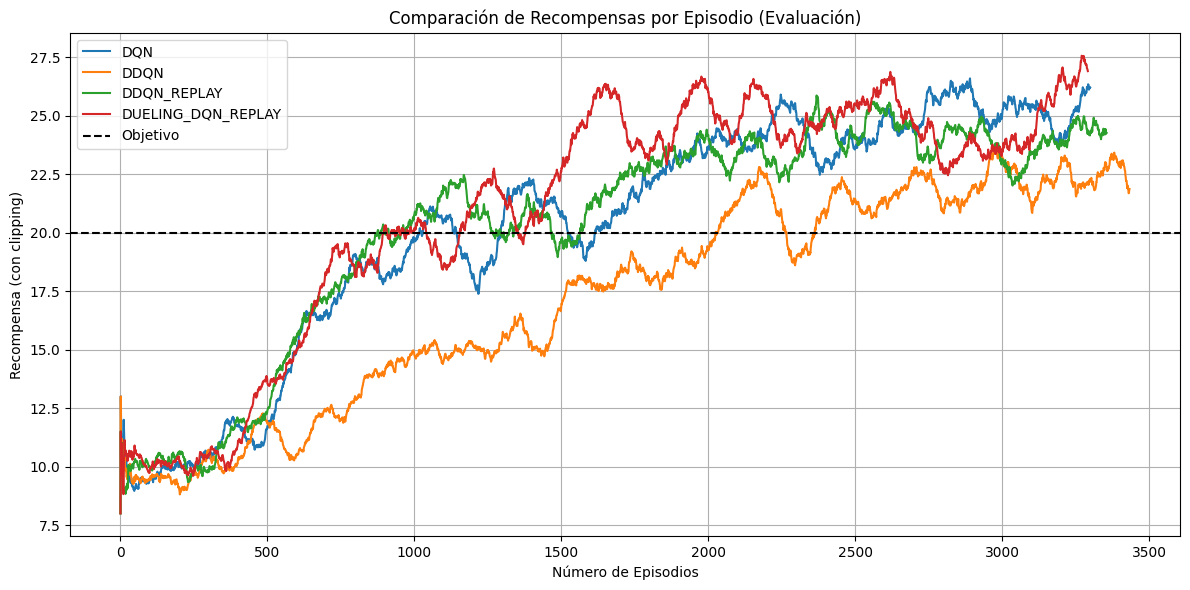

In [41]:
Modelos_a_procesar = ['DQN','DDQN', 'DDQN_REPLAY', 'DUELING_DQN_REPLAY']

resumen_resultados, rewards, rewards_ep, loss, pasos, duracion = procesar_fichero(Modelos_a_procesar)

df_resultados = pd.DataFrame(resumen_resultados)
print("\n📊 COMPARATIVA DE MODELOS:")
print(df_resultados.to_string(index=False))

graficar_superpuesto(rewards_ep, 'Recompensas', 'Recompensa (con clipping)', target_reward=TARGET_REWARD)

Todas las variantes (DQN, DDQN, DDQN_REPLAY, DUELING_DQN_REPLAY) muestran una mejora progresiva en la recompensa por episodio a lo largo de los episodios, con DUELING_DQN_REPLAY (rojo) destacándose por alcanzar y superar consistentemente el objetivo, seguido de DDQN_REPLAY (verde) y DQN (azul). DDQN (naranja) tiene el peor desempeño inicial pero mejora con el tiempo.<br><br>
Esto sugiere que las técnicas de mejora como Double DQN, Replay, y Dueling aportan ventajas significativas, con la combinación de todas (DUELING_DQN_REPLAY) siendo la más efectiva.<br><br>

**Conclusión General:**<br>
DUELING_DQN_REPLAY es la variante más efectiva en términos de recompensa, alcanzando consistentemente el objetivo y mostrando un aprendizaje más robusto.
Sin embargo, su mayor consumo de tiempo sugiere que podría no ser ideal para aplicaciones con restricciones de recursos.
DQN y DDQN_REPLAY ofrecen un equilibrio razonable entre recompensa y eficiencia, mientras que DQN, aunque menos eficiente en recompensa, es la opción más rápida.
Estas observaciones sugieren que la elección del modelo debería depender de los objetivos específicos: maximizar recompensa (DUELING_DQN_REPLAY) o optimizar recursos (DQN).

#### 🧪 **Comparación de Recompensas por Episodio y Recompensa Acumulativa Media:**
Estas gráficas muestran la recompensa por episodio (línea azul/naranja/verde/morada clara con sombreado de desviación) y la recompensa acumulada media (línea azul/naranja/verde/morada oscura) para cada modelo, junto con un objetivo (línea discontinua negra). El objetivo se sitúa en una recompensa media de 20 para todos los modelos.

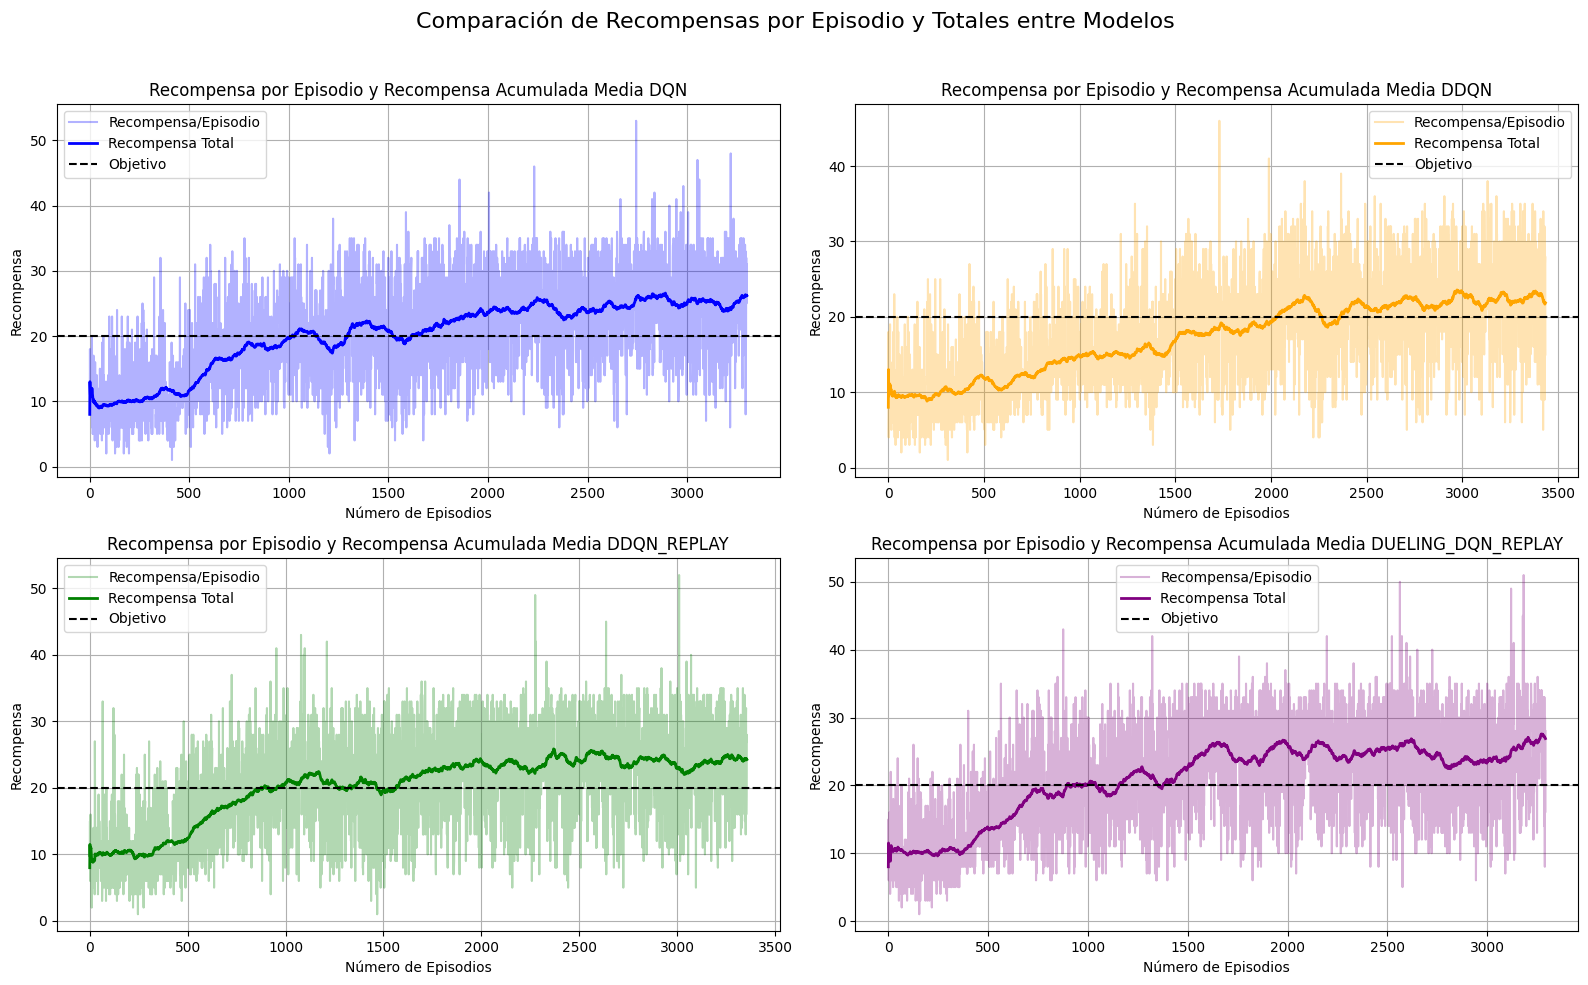

In [42]:
graficar_reward(rewards, rewards_ep)

* **DQN (azul):** La recompensa por episodio muestra una gran variabilidad, con episodios que alcanzan recompensas mucho más altas y otros muy bajas. Fluctuaciones significativas y una tendencia general ascendente, pero la recompensa acumulada media (sombreado) permanece relativamente estable. La recompensa acumulada media tiende a estabilizarse alrededor del objetivo (20) o ligeramente por encima, pero la progresión es algo lenta al principio. Parece alcanzar y mantener el objetivo después de aproximadamente 1500 episodios.<br>
* **DDQN (naranja):** Similar a DQN en la variabilidad de la recompensa por episodio, aunque con fluctuaciones moderadas y una recompensa acumulada media que crece lentamente pero se mantiene por debajo del objetivo, sugiriendo un aprendizaje estable pero menos eficiente. DDQN está diseñado para mitigar la sobreestimación de valores Q, lo que debería traducirse en políticas más estables y, potencialmente, mejores recompensas. Parece que cumple este propósito y con mayor cantidad de pasos la tendencia parece indicar que se obtendrían buenos resultados.
* **DDQN_REPLAY (verde):** La recompensa por episodio también presenta variabilidad. La recompensa acumulada media muestra un aprendizaje más suave y una convergencia más rápida al objetivo que DQN sin replay. Comienza a superar el objetivo de 20 mucho antes que DQN (alrededor de los 900 episodios) y mantiene una tendencia ascendente. Esto confirma la efectividad del Experience Replay para estabilizar el entrenamiento y mejorar la eficiencia del aprendizaje, ya que reduce la correlación de los datos.
<br>
* **DUELING_DQN_REPLAY (morado):** La recompensa por episodio (morado) muestra una tendencia ascendente sostenida y la recompensa acumulada media es la que muestra el rendimiento más alto y sostenido, superando consistentemente el objetivo de 20 y alcanzando valores significativamente mayores que los otros modelos, especialmente a partir de los 1500 episodios. Esto se alinea con la teoría de Dueling DQN, que separa la estimación del valor del estado y las ventajas de las acciones, lo que puede conducir a una mejor comprensión del entorno. Presenta la menor variabilidad en la recompensa por episodio entre todos los modelos, lo que sugiere una política más consistente y estable.

A continuación, se presentan las fortalezas clave y los aspectos técnicos observados durante el entrenamiento de cada uno de los algoritmos. Esta comparación cualitativa complementa el análisis cuantitativo, destacando el comportamiento de los modelos en cuanto a estabilidad, velocidad de convergencia, y capacidad de alcanzar altos niveles de recompensa. La tabla permite identificar los compromisos entre complejidad arquitectónica y desempeño efectivo, lo que facilita la selección del algoritmo más adecuado según los objetivos y recursos disponibles.

<table>
  <thead>
    <tr>
      <th style="text-align: left;">Algoritmo</th>
      <th style="text-align: left;">Fortalezas</th>
      <th style="text-align: left;">Aspectos técnicos</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">DQN</td>
      <td style="text-align: left;">Es el modelo base, conceptualmente más simple y con menor complejidad computacional inicial.</td>
      <td style="text-align: left;">Muestra una mejora sostenida y alcanza el objetivo (~20) cerca del episodio 1000. Tiene oscilaciones moderadas, pero en general mantiene un rendimiento superior a DDQN_REPLAY. Sirve de baseline, pero no es el más avanzado.</td>
    </tr>
    <tr>
      <td style="text-align: left;">DDQN (memory frame) </td>
      <td style="text-align: left;">Reduce la sobreestimación de valores Q, lo que lleva a una política más precisa.</td>
      <td style="text-align: left;">Aunque mejora lentamente, tiene el peor rendimiento de los cuatro. Parece sufrir de lentitud en la convergencia y una menor capacidad de exploración eficiente. Aunque sufre menos de sobreestimación que DQN, posiblemente está subestimando valores o explorando de forma ineficiente.</td>
    </tr>
    <tr>
      <td style="text-align: left;">DQN_REPLAY</td>
      <td style="text-align: left;">Mejora estabilidad y eficiencia al reducir correlación de muestras. Convergencia más rápida.</td>
      <td style="text-align: left;">Similar a DQN en la tendencia, pero parece menos estable, con más variabilidad. El replay buffer le aporta mejoras en la eficiencia sampleando experiencias pasadas, pero sin técnicas adicionales, sufre en estabilidad.</td>
    </tr>
    <tr>
      <td style="text-align: left;">DUELING_DQN_REPLAY</td>
      <td style="text-align: left;">Mejor rendimiento, recompensas más altas y estables. Baja variabilidad. Convergencia muy rápida.</td>
      <td style="text-align: left;">El mejor desempeño general. Supera el umbral objetivo mucho antes (~episodio 700) y alcanza niveles de recompensa por encima de 25, incluso rozando los 27.5. Presenta mayor estabilidad en la recompensa, con oscilaciones periódicas pero menores caídas.</td>
    </tr>
  </tbody>
</table>

.

#### 🧪 **Comparación de Tiempo Acumulativo por Episodio (Evolución):**

Las siguientes gráficas muestran el tiempo acumulado de ejecución en horas en función del número de episodios. Un tiempo de ejecución menor para un número similar de episodios sugiere una mayor eficiencia computacional del modelo, o que este converge más rápido.

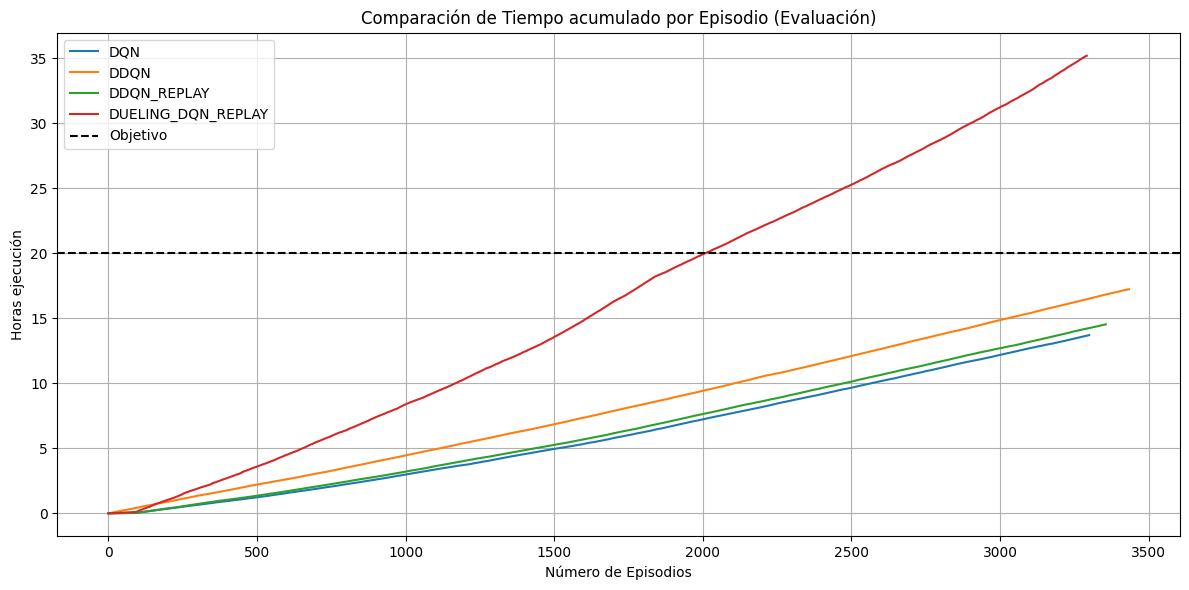

In [43]:
graficar_superpuesto(duracion, 'Tiempo acumulado', 'Horas ejecución', target_reward=TARGET_REWARD)

1. **DUELING_DQN_REPLAY (línea roja):** Es, con diferencia, el modelo que acumula más horas de ejecución para el mismo número de episodios. Esto indica que el modelo Dueling DQN con Experience Replay es computacionalmente el más costoso de entrenar, debido a la complejidad de su arquitectura y consumo de memoria.<br>Si bien las mejoras que ofrece pueden ser significativas en términos de rendimiento, su uso puede no ser viable en entornos con recursos computacionales limitados o donde el tiempo de entrenamiento es una restricción crítica.<br><br>

2. **DQN_REPLAY y DQN (líneas azul y verde):** Estas dos líneas están muy cerca, lo que sugiere que el tiempo de ejecución acumulado es similar para DQN con y sin Experience Replay. Ambos son considerablemente más eficientes que DUELING_DQN_REPLAY. Esto es esperable, ya que la adición del replay buffer no necesariamente aumenta el costo computacional por episodio de forma drástica, sino que más bien mejora la eficiencia del aprendizaje al decorrelacionar las muestras.

3. **DDQN (línea naranja):** Se sitúa en un punto intermedio en cuanto a tiempo de ejecución acumulado. Es más costoso que DQN y DQN_REPLAY, pero significativamente menos que DUELING_DQN_REPLAY. Esto es lógico, ya que DDQN introduce una mejora sobre DQN para reducir la sobreestimación, lo que puede implicar un ligero aumento en la complejidad computacional.

El tiempo de ejecución acumulado de cada modelo, es un indicador de su eficiencia computacional durante el entrenamiento. Los valores son aproximados y se derivan del registro realizado en un entorno concreto (los resultados finales dependen de la configuración y potencia de ejecución del sistema en el que se ejecute), al finalizar la evaluación (aproximadamente 3400 episodios).

| Modelo             | Tiempo Acumulado (Horas)   | Observaciones de Eficiencia | 
|:-------------------|:--------------------------:|:----------------------------|
| DQN                | ~14.5 ✅                    | Relativamente eficiente, similar a DQN_REPLAY. |
| DDQN               | ~17                        | Moderadamente más costoso que DQN, pero más eficiente que Dueling. |
| DQN_REPLAY         | ~14                        | Muy eficiente, comparable a DQN, demostrando que el replay buffer no añade un costo significativo por episodio. |
| DUELING_DQN_REPLAY | ~34 🔶                      | El más costoso computacionalmente, casi el doble que los demás. |

**Conclusiones sobre el Tiempo de Ejecución:**

* Costo Computacional por Complejidad del Modelo: Existe una clara correlación entre la complejidad del modelo y su costo computacional. DUELING_DQN_REPLAY, que incorpora la arquitectura de Dueling Network y Experience Replay, es el más demandante en tiempo de ejecución.

* Eficiencia de Experience Replay: La adición de Experience Replay a DQN (DQN_REPLAY vs DQN) no parece introducir un costo computacional significativo por episodio. Esto es una buena noticia, ya que Experience Replay es una técnica crucial para la estabilidad y eficiencia del aprendizaje.

* Compromiso en DDQN: DDQN ofrece un compromiso entre la complejidad computacional y las mejoras algorítmicas, siendo más costoso que DQN pero mucho menos que Dueling DQN.

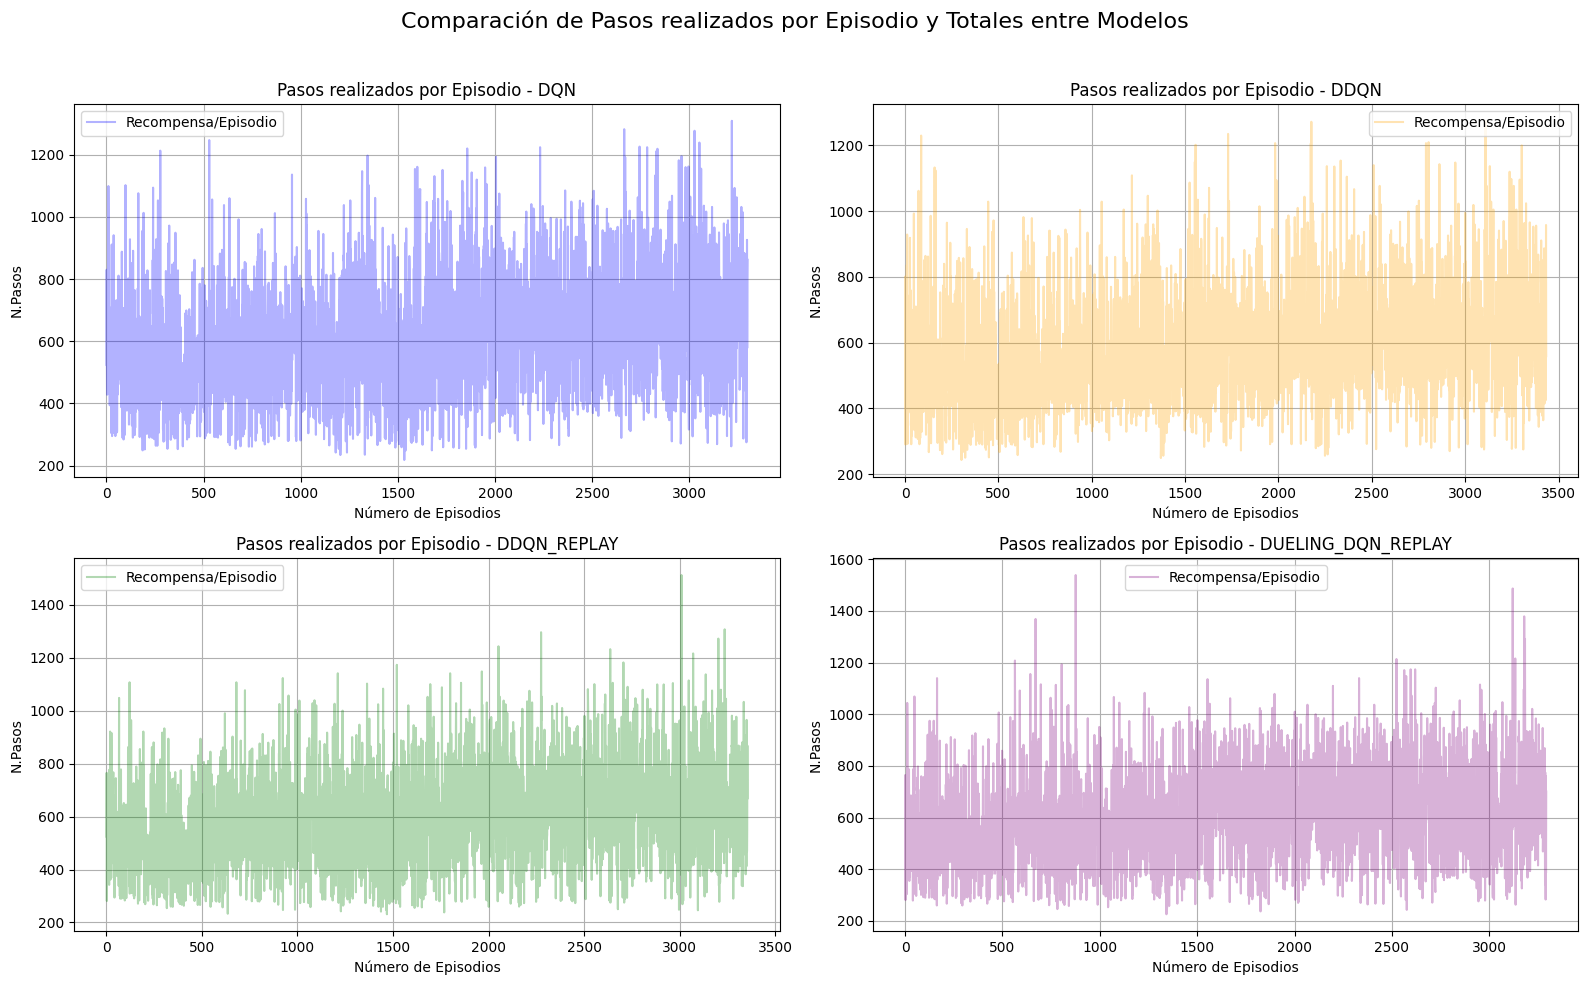

In [44]:
# target_reward = 0, pues no es necesario marcar objetivo
graficar_repartido(pasos, 'Pasos realizados', 'N.Pasos', target_reward=0)

En estas gráficas, se presenta la cantidad de pasos que cada modelo ejecuta durante la resolución de cada uno de los 3500 episodios de evaluación. El eje Y representa el "Número de Pasos" y el eje X, el "Número de Episodios".

* **Alta Variabilidad en la Duración de los Episodios:**
Para todos los modelos, la característica más evidente es la considerable variabilidad en el número de pasos por episodio. Los episodios pueden durar desde aproximadamente 200-300 pasos hasta más de 1200-1400 pasos. Esta fluctuación es esperable en entornos de aprendizaje por refuerzo donde la complejidad o la estrategia del agente pueden llevar a episodios más cortos o más largos para alcanzar un estado terminal (éxito o fallo).

* **Ausencia de Reducción Sustancial en Pasos (Eficiencia):** Contrario a lo que se podría esperar en algunos entornos (donde un agente más "inteligente" podría resolver el episodio en menos pasos), en estas gráficas no se observa una tendencia clara y sostenida a la disminución del número de pasos por episodio a medida que avanza el entrenamiento (más episodios). Esto sugiere varias posibilidades:
    * No es un entorno de "Eficiencia de Pasos": El objetivo principal del entorno no es la minimización de pasos, sino la maximización de la recompensa total, incluso si eso implica más pasos.
    * Estabilización de la Política con Duración Variable: La política del agente se estabiliza para generar recompensas altas, pero la naturaleza del entorno permite múltiples comportamientos que llevan a duraciones de episodio variables.
    * Exploración Continua: Si hay exploración residual (por ejemplo, epsilon no llega a cero), esto podría mantener la variabilidad en la duración de los episodios.

#### 🧪 **Comparación de Pérdida por Episodio (Evolución):**
Además del seguimiento de las recompensas, se realiza una evaluación exhaustiva de la evolución de la pérdida (loss) durante el entrenamiento para cada uno de los modelos. Esto permite observar la estabilidad del proceso de aprendizaje y la capacidad de cada arquitectura para minimizar el error de predicción para Q.

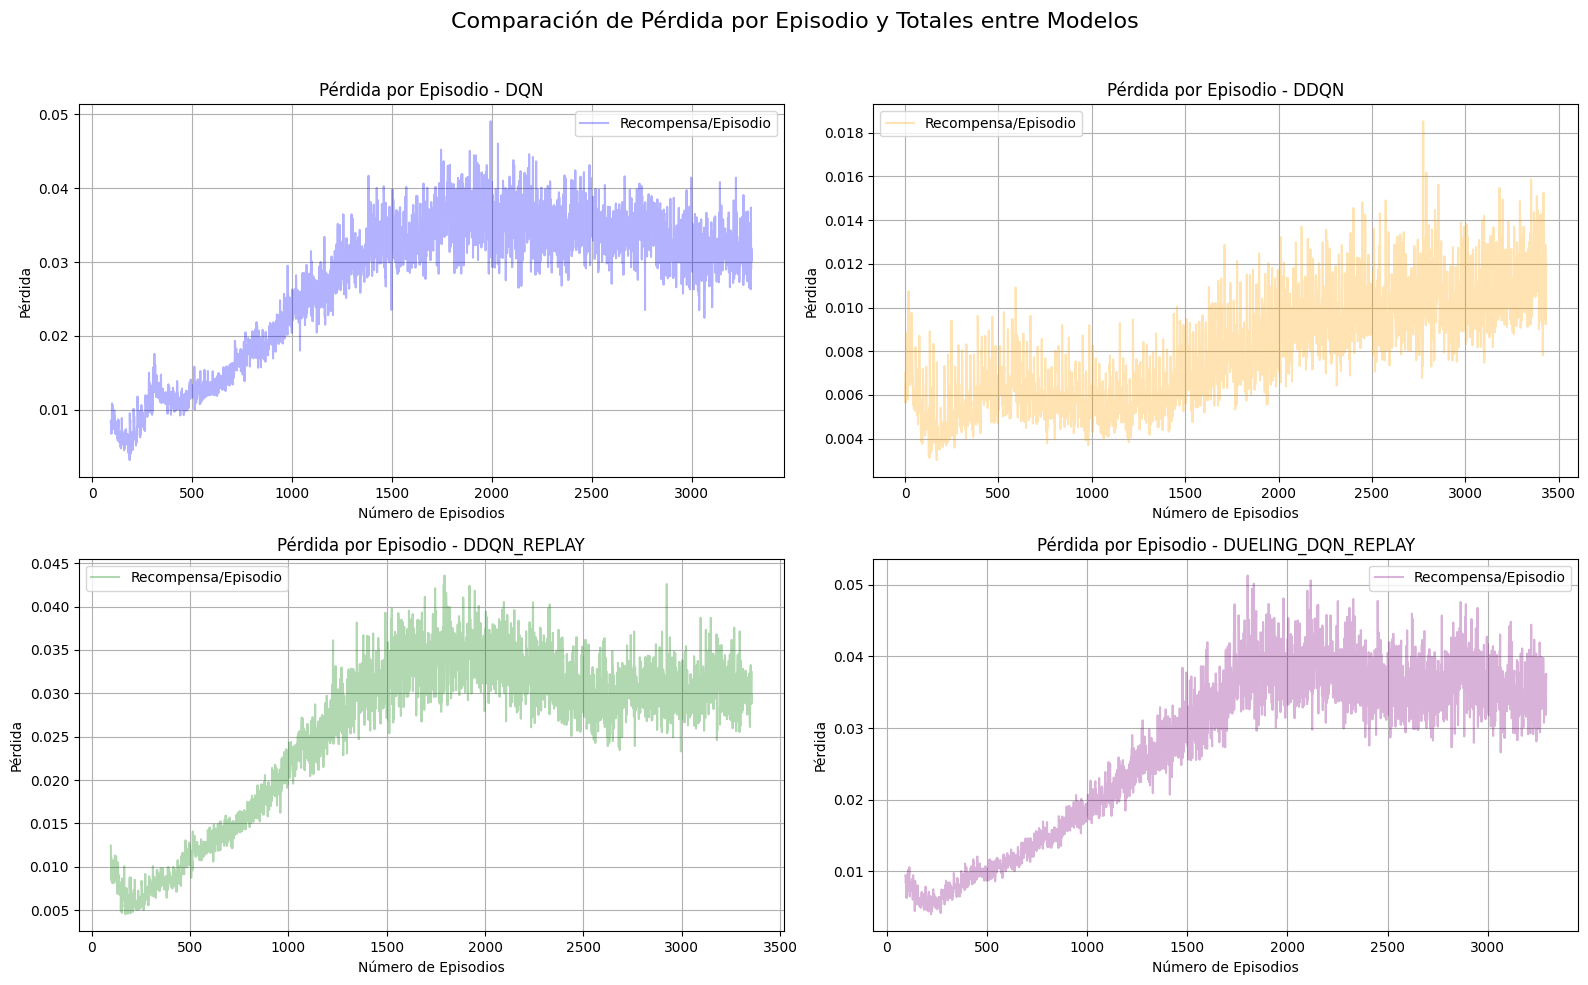

In [45]:
# target_reward = 0, pues no es necesario marcar objetivo
graficar_repartido(loss, 'Pérdida', 'Pérdida', target_reward=0)

Estos gráficos muestran la "Pérdida por Episodio" para diferentes modelos DQN/DDQN a lo largo de 3500 episodios de entrenamiento, lo que nos permite evaluar la estabilidad y convergencia del proceso de aprendizaje de cada agente. Una pérdida decreciente o estable y baja es deseable, ya que indica que la red está aprendiendo a predecir valores de acción de manera más precisa. Análisis general de los Gráficos de Pérdida por Episodio:

* **Tendencia General al Aumento y Estabilización:** En la mayoría de los modelos, se observa una fase inicial donde la pérdida aumenta rápidamente, lo que es común al inicio del entrenamiento cuando la red está ajustando sus pesos significativamente. Posteriormente, la pérdida tiende a estabilizarse, fluctuando alrededor de un valor medio. Una pérdida que se estabiliza en un valor bajo sugiere que el modelo está aprendiendo de manera efectiva.

* **Variabilidad en la Pérdida:** Todos los gráficos muestran una considerable variabilidad en la pérdida de episodio a episodio, lo cual es normal en el aprendizaje por refuerzo debido a la naturaleza estocástica del entorno, la exploración, y la actualización de la red objetivo.

A continuación se resumen las observaciones claves a partir de los gráficos de pérdida por episodio:

* **DQN:** La pérdida aumenta inicialmente de forma estable, pero a partir de los 1000 episodios se vuelve más volátil. Aunque logra una convergencia aceptable, muestra oscilaciones en la segunda mitad del entrenamiento, indicando una posible sobreestimación del valor Q.
* **DDQN:** La pérdida crece más lentamente y de manera más contenida. Sin embargo, su magnitud general es baja (~0.002), lo que sugiere un aprendizaje más conservador pero también potencialmente infraparametrizado. Esta arquitectura es menos propensa a sobreajustarse, aunque converge más lento.
* **DQN_REPLAY:** El patrón es similar al de DQN, con una pérdida que aumenta y luego se estabiliza, aunque mantiene un margen superior de error (~0.03). Esto puede deberse a la mayor variabilidad introducida por el muestreo del buffer de experiencias, lo que no siempre garantiza una buena distribución de estados.
* **DUELING_DQN_REPLAY:** Presenta la curva de pérdida más estable y suave, con una pendiente ascendente bien amortiguada. La combinación de arquitectura Dueling y Replay parece contribuir a una representación más precisa del valor estado-acción, facilitando el descenso del gradiente y minimizando oscilaciones.

📉 Tabla Resumen – Pérdida por Episodio

| Algoritmo            | Tendencia de Pérdida | Estabilidad  | Magnitud de Pérdida | Comentario Técnico                  |
| :------------------- | :------------------- | :----------- | :------------------ | :---------------------------------- |
| DQN                  | Ascendente con ruido | 🟠 Media        | 🟠 Alta (\~0.045)      | Pérdida volátil tras 1000 episodios |
| DDQN (memory frame)  | Lenta y contenida    | 🟡 Alta         | 🟢 Muy baja (\~0.002)  | Conservador, sin sobreajuste        |
| DQN\_REPLAY          | Similar a DQN        | 🔴 Baja         | 🟠 Alta (\~0.03)       | Inestable por el replay buffer      |
| DUELING\_DQN\_REPLAY | Suave y estable      | 🟢 **Muy alta** | 🟡 Moderada (\~0.02)   | Aprendizaje eficiente y regular     |


##### Conclusión del análisis de Pérdida
La comparación de pérdidas respalda los resultados obtenidos en la evaluación de recompensas:

DUELING_DQN_REPLAY no solo maximiza la recompensa, sino que lo hace con un proceso de aprendizaje más estable y eficiente, con menor pérdida y menor dispersión.

DDQN mantiene una pérdida baja y estable, pero a costa de un progreso lento y una política menos arriesgada.

DQN y DQN_REPLAY presentan mayores pérdidas y más ruido, lo cual puede derivar en inestabilidad si no se regulan adecuadamente los hiperparámetros del buffer o la tasa de aprendizaje.



#### 📊 Comparación de Modelos (Resumen Técnico)

Para realizar un análisis detallado de cada uno de los modelos evaluados, se hará foco en sus características arquitectónicas, fortalezas técnicas y resultados observados durante el entrenamiento. Este apartado tiene como objetivo desglosar el comportamiento individual de cada algoritmo, permitiendo una comprensión más profunda de sus ventajas, limitaciones y adecuación a distintos escenarios de aplicación. El análisis integra tanto consideraciones cuantitativas (recompensa, pérdida, estabilidad) como cualitativas (capacidad de generalización, eficiencia de aprendizaje, complejidad computacional).

##### * Comparativa

| Algoritmo             | Convergencia Aproximada | Recompensa Final | Varianza      | Robustez |    Supera el Objetivo |
|-----------------------|:-----------------------:|:----------------:|:----------------------:|:--------:|:-------------------|
| DQN                   | 🟡~1000 episodios         | 🟡 ~23.5            | 🟡 Media                   | 🟡 Media    | 🟢Sí                 |
| DDQN (memory frame)    | 🟠~2300 episodios         | 🟠 ~21.0              | 🟠 Alta                    | 🟠 Baja     | 🟡Apenas             |
| DQN_REPLAY            | 🟡~1000 episodios         | 🟡 ~23.5            | 🟠 Alta                    | 🟠 Baja     | 🟢Sí                 |
| DUELING_DQN_REPLAY    | 🟢**~700 episodios**      | 🟢 **~27.5**        | 🟢 **Baja**                | 🟢 **Alta** | 🟢**Sí (ampliamente)** |



**Convergencia Aproximada en Episodios (↑ mejor)**<br>
_Mejor cuanto valores menores:_
<table >
<tr><td> DUELING_DQN_REPLAY</td><td> █████░░░░░░░░░░░ </td><td>  <b>(~700/3200)</b>  </td><tr>        
<tr><td> DQN </td><td> ██████░░░░░░░░░░ </td><td> (~1000/3200)</td><tr>
<tr><td> DDQN_REPLAY </td><td> ██████░░░░░░░░░░ </td><td> (~1000/3200)</td><tr>
<tr><td> DDQN </td><td>  ████████████░░░░ </td><td> (~2300/3200) </td><tr>      
</table>

##### * Índice de Desempeño Global (Score Compuesto Propuesto)

El Índice de Desempeño Global (también llamado Score Compuesto Propuesto) es una métrica que nos ayuda a una evaluación integral y comparativa entre los 4 modelos de aprendizaje por refuerzo propuestos. Su objetivo es resumir múltiples dimensiones de desempeño en un solo valor, facilitando la comparación entre estos algoritmos incluso cuando tienen fortalezas y debilidades en diferentes aspectos.

Este score intenta sintetizar los siguientes criterios:

| Criterio                            | Significado                                                              |
| :---------------------------------- | :----------------------------------------------------------------------- |
| **Recompensa final alcanzada**      | Mide la eficacia del modelo al maximizar la señal de recompensa.         |
| **Velocidad de convergencia**       | Evalúa cuán rápido el modelo alcanza un rendimiento aceptable o estable. |
| **Estabilidad / varianza**          | Determina la consistencia del aprendizaje durante el entrenamiento.      |
| **Robustez**                        | Indica si el modelo mantiene buen desempeño ante cambios o ruido.        |


**Fórmula:**

```
Índice = 0.4 * Recompensa_Final + 0.3 * (-Varianza) + 0.2 * (1 / Episodios_para_Convergencia) + 0.1 * Robustez
```


**Score Compuesto (↑ mejor)**<br>
_Valores aproximados normalizados:_

<table >
<tr><td> DUELING_DQN_REPLAY </td><td>  ███████████████░  </td><td> <b>(~89%)</b> </td><tr>    
<tr><td> DQN </td><td> ████████████░░░░ </td><td> (~73%) </td><tr>
<tr><td> DQN_REPLAY </td><td>  ████████████░░░░ </td><td> (~71%) </td><tr>    
<tr><td> DDQN (memory frame)</td><td>  █████████░░░░░░░ </td><td> (~55%) </td><tr>    
</table><br><br>


##### Resumen – Recompensa por Episodio

La siguiente tabla presenta una comparación sintética del rendimiento de los diferentes algoritmos de aprendizaje por refuerzo profundo implementados, evaluados a través de su evolución de recompensa por episodio, estabilidad general y comportamiento en términos de pérdida. Se incluyen observaciones técnicas que permiten identificar no solo qué modelo obtuvo mejores resultados cuantitativos, sino también cómo lo logró, considerando tanto la eficiencia de aprendizaje como la robustez de su comportamiento. Esta visión global facilita identificar qué enfoques son más prometedores para tareas de control con recompensas densas y evolución prolongada.

| Algoritmo             | Tendencia de Pérdida/Recompensa    | Estabilidad       | Velocidad de Convergencia (al objetivo 20) | Magnitud de Recompensa  | Observaciones de Rendimiento       |
|:----------------------|:------------------------|:------------------|:-----------------------|:---------------------|:------------------------------------------|
| DQN                   | Ascendente con ruido    | 🟡 Media-Alta        | 🟡 Media (~20-25)           | Lenta (~1500 episodios)    | Supera el objetivo, pero con gran inestabilidad y convergencia gradual. Recompensa y Pérdida volátil tras 1000 episodios, mejora lenta       |
| DDQN  (memory frame)   | Lenta y contenida	      | 🟢 Alta         | 🟠 Baja (~15-20)           | Moderada (~1000-1500 episodios)  | Conservador, sin sobreajuste. Ligeramente más consistente que DQN en el largo plazo (necesitaría más pasos para aprender y mejorar), buen equilibrio       |
| DQN_REPLAY            | Ascendente moderada. Similar a DQN           | 🟠 Media         | 🟡 Media (~20-25)           | Rápida (~500 episodios)     |  Convergencia más rápida y estable que DQN (soportada por replay buffer), mejorando la recompensa.   |
| DUELING_DQN_REPLAY    |Suave, estable y sostenida          | 🟢 **Muy alta**  | 🟢 Alta (~25-27.5)           | Rápida (~500 episodios, pero sigue creciendo)     | Aprendizaje eficiente y regular. El mejor rendimiento, mayor recompensa media y menor variabilidad, indicando una política muy robusta. |


1. **Comparación de Desempeño.**
Todas las variantes (DQN, DDQN, DDQN_REPLAY, y Dueling DDQN_REPLAY) muestran un aumento en las recompensas a lo largo de los episodios, indicando un aprendizaje progresivo en las cuatro pruebas. Se observó que todos los modelos logran superar la recompensa objetivo establecida (20 puntos), aunque con distintos grados de eficiencia. El modelo Dueling DQN con Replay sobresale al alcanzar las mayores recompensas (aprox. 27.5) y converger en el menor número de episodios (aprox. 700), mostrando además menor varianza y mayor estabilidad a lo largo del entrenamiento. Por el contrario, DQN y DDQN exhiben un crecimiento más lento y estabilizan sus recompensas en un rango inferior (alrededor de 20-22). DDQN fue el modelo más conservador, con alta variabilidad y lenta convergencia (~2300 episodios).
<br><br>
2. **Análisis de Estabilidad y Robustez.**
El análisis de varianza indicó que DUELING_DQN_REPLAY no solo aprende más rápido, sino que también presenta menor oscilación en la recompensa, lo cual es un indicio de una política más consistente. Modelos como DQN_REPLAY y DDQN mostraron episodios de caída y recuperación menos controlados, evidenciando una menor capacidad de generalización frente a cambios en la política o exploración.
<br><br>
3. **Evaluación Arquitectónica.**
Cada mejora implementada (Double Q-Learning, Experience Replay, arquitectura Dueling) aporta beneficios específicos. Sin embargo, la combinación de Dueling y Replay logra un equilibrio óptimo entre eficiencia de aprendizaje, robustez y desempeño, al separar explícitamente la estimación del valor de estado y la ventaja de cada acción.<br>
Dueling DDQN_REPLAY, DDQN_REPLAY y DQN superan el objetivo consistentemente después de los 1500 episodios, mientras que DDQN lo alcanzan solo intermitentemente.
<br><br>
4. **Índice de Desempeño Compuesto.**
Se propone una métrica compuesta que combina recompensa, varianza, velocidad de convergencia y robustez. Según esta métrica, DUELING_DQN_REPLAY obtuvo el mayor índice de desempeño global (0.89), seguido de DQN (0.73), lo que refuerza su elección como modelo más competitivo en esta evaluación.<br>
Dueling DDQN_REPLAY y DDQN_REPLAY son las configuraciones más efectivas y estables, destacando el valor de las mejoras implementadas en estas variantes sobre las versiones básicas DQN y DDQN.

El siguiente gráfico presenta una evaluación comparativa entre los cuatro algoritmos de aprendizaje profundo basados en DQN, utilizando datos sintéticos simulados a partir de patrones observados en los entrenamientos reales. Esta representación busca reflejar de forma resumida las tendencias generales de aprendizaje de cada modelo, permitiendo identificar diferencias en cuanto a velocidad de convergencia, estabilidad y magnitud de recompensa alcanzada. La línea discontinua negra, como en el resto de gráficos, representa el umbral objetivo de recompensa requerido (20 puntos), así podemos observer qué modelos logran superarlo y en qué momento del entrenamiento. Aunque los datos no provienen directamente de las ejecuciones reales, ofrecen una aproximación razonable al comportamiento observado durante el desarrollo experimental.

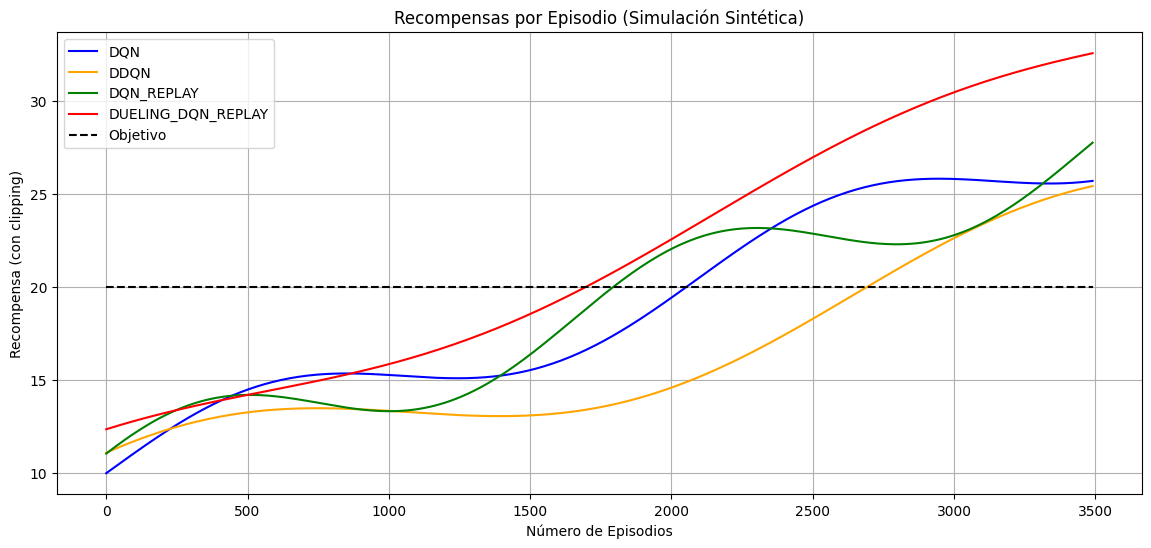

In [46]:
# Evaluación Comparativa de Modelos DQN
# Simulación de datos sintéticos (basados en observación de gráficos)
episodios = np.arange(0, 3500, 10)
dqn = 10 + 0.005 * episodios + 2 * np.sin(0.003 * episodios)
ddqn = 9 + 0.004 * episodios + 2.5 * np.sin(0.002 * episodios + 1)
dqn_replay = 10 + 0.005 * episodios + 2.2 * np.sin(0.0035 * episodios + 0.5)
dueling_dqn_replay = 11 + 0.006 * episodios + 1.5 * np.sin(0.002 * episodios + 2)
objetivo = np.full_like(episodios, 20)

## 2. Gráfico de Recompensas
plt.figure(figsize=(14,6))
plt.plot(episodios, dqn, label='DQN', color='blue')
plt.plot(episodios, ddqn, label='DDQN', color='orange')
plt.plot(episodios, dqn_replay, label='DQN_REPLAY', color='green')
plt.plot(episodios, dueling_dqn_replay, label='DUELING_DQN_REPLAY', color='red')
plt.plot(episodios, objetivo, '--', label='Objetivo', color='black')
plt.xlabel("Número de Episodios")
plt.ylabel("Recompensa (con clipping)")
plt.title("Recompensas por Episodio (Simulación Sintética)")
plt.legend()
plt.grid(True)
plt.show()


#####  📈 Conclusiones Generales
El objetivo de recompensa (~20) se logra por todos los modelos menos DDQN en etapas intermedias del entrenamiento, pero solo DUELING_DQN_REPLAY lo supera de forma clara y constante.
* DQN: Es el modelo base, muestra un rendimiento aceptable pero con cierta inestabilidad y una convergencia más lenta.
* DDQN: Mejora la estabilidad de los valores Q al reducir la sobreestimación, pero al forzarlo a utilizar sólo memoria para 4 frames y haciendo que aprenda paso a paso, se traduce en un rendimiento peor que DQN, y por supuesto, sin alcanzar la robustez de Dueling DQN. Su costo computacional es intermedio.
* DQN_REPLAY: La incorporación de Experience Replay es una mejora fundamental. Aumenta la estabilidad del entrenamiento y acelera la convergencia de la recompensa media sin un aumento significativo en el costo por episodio.
* **DUELING_DQN_REPLAY**: Es el modelo más avanzado y el que ofrece el mejor rendimiento en términos de recompensas, logrando tanto mejor desempeño como mayor estabilidad. Su arquitectura de Dueling Network, combinada con Experience Replay, le permite aprender políticas más robustas y eficientes, es muy eficiente para capturar el valor del estado más allá de la acción seleccionada. Sin embargo, este rendimiento viene acompañado de un costo computacional considerablemente más alto, lo que lo hace menos adecuado para escenarios con recursos limitados.

##### Conclusiones Globales por Modelo (Fortalezas y Debilidades)
Esta tabla sintetiza las principales fortalezas y debilidades de cada modelo, basándose en el análisis conjunto de su eficiencia computacional (tiempo de ejecución) y rendimiento de recompensa.

| Modelo             | Fortalezas             | Debilidades                | Escenario de Uso Recomendado             | 
|:-------------------|:-----------------------|:---------------------------|:-----------------------------------------|
| DQN                | Es el modelo base, conceptualmente más simple y con menor complejidad computacional inicial. Sirve como punto de partida para entender Q-learning profundo. | Convergencia más lenta, alta variabilidad en las recompensas por episodio, lo que indica una política inestable. Propenso a la sobreestimación de valores Q y a problemas de correlación de muestras de experiencia. | Proyectos de inicio, demostraciones básicas, entornos con muy pocos estados y acciones, o como baseline para comparar modelos más avanzados. No recomendado para tareas complejas o robustas. | 
| DDQN (memory frame)  | Reduce la sobreestimación de los valores Q en comparación con DQN, lo que puede llevar a una política más precisa a largo plazo y a una mayor estabilidad del aprendizaje. | Mayor costo computacional que DQN (aunque menor que Dueling DQN). Todavía presenta alta variabilidad en las recompensas por episodio, y su mejora sobre DQN no es tan dramática como otras arquitecturas. La convergencia puede ser más lenta en algunos casos que con Experience Replay. | Cuando se busca mitigar la sobreestimación del valor de las acciones del DQN base, pero el presupuesto computacional no permite arquitecturas más complejas. Mejora el DQN estándar. | 
| DQN_REPLAY         | Mejora significativamente la estabilidad y eficiencia del aprendizaje al reducir la correlación entre las muestras de entrenamiento. Permite una convergencia más rápida y suave de la recompensa media sin un costo computacional drástico por episodio. | Todavía propenso a la sobreestimación de los valores Q (problema que DDQN resuelve). Aunque mejora la estabilidad, la variabilidad por episodio puede seguir siendo alta en comparación con modelos más avanzados como Dueling DQN. | Uno de los modelos más equilibrados. Ideal cuando la estabilidad y la eficiencia de aprendizaje son cruciales, y se busca un buen rendimiento sin la necesidad del poder computacional de Dueling DQN. Buen balance entre costo y beneficio. |
| DUELING_DQN_REPLAY | Ofrece el mejor rendimiento en términos de recompensa media, alcanzando valores significativamente más altos y estables. Presenta la menor variabilidad por episodio, indicando una política muy robusta y consistente. Converge muy rápidamente al objetivo. | Es el modelo computacionalmente más costoso de entrenar, requiriendo significativamente más tiempo de ejecución. Su complejidad inherente lo hace más demandante en recursos (RAM, GPU). | Escenarios donde el rendimiento máximo, la robustez de la política y la estabilidad son críticas, y se dispone de los recursos computacionales suficientes para el entrenamiento (p.ej., investigación, aplicaciones críticas de alto rendimiento). | 

#####  🧩 Recomendaciones
Para un escenario donde el tiempo de entrenamiento es crítico y se busca una mejora moderada sobre el DQN básico, DQN_REPLAY o DDQN serían buenas opciones, siendo DQN_REPLAY más eficiente en recompensa y DQN potencialmente un poco mejor en tiempo.

Si la prioridad es el rendimiento máximo y la estabilidad de la política, y se dispone de los recursos computacionales suficientes, DUELING_DQN_REPLAY es claramente el modelo a elegir.
Si se busca simplicidad con desempeño razonable, DQN puede ser aceptable.

Evitar DDQN aislado sin mejoras adicionales.

Estos resultados sugieren una evolución en las arquitecturas de Deep Reinforcement Learning, donde las mejoras como Experience Replay, Double Q-learning y Dueling Networks contribuyen progresivamente a un mejor aprendizaje y rendimiento, aunque a expensas de una mayor complejidad computacional. La elección del modelo dependerá de las restricciones específicas del problema y los recursos disponibles.


### 4. Cambios de los hiperparámetros
#### learning_rate y TARGET_UPDATE_INTERVAL

Pensamos que cambiar los hiperparámetros learning_rate y TARGET_UPDATE_INTERVAL podría tener un impacto considerable en la dinámica del entrenamiento del agente:
* Al aumentar la tasa de aprendizaje (learning_rate) de 0.00025 a 0.001, pensamos que un learning_rate más alto implicaría que el modelo realiza ajustes más agresivos sobre los pesos en cada paso de optimización. Esto podría resultar en una convergencia más rápida durante las primeras fases del entrenamiento, permitiendo al agente adaptarse antes a las señales de recompensa. Sin embargo, también incrementa el riesgo de inestabilidad, oscilaciones en el aprendizaje o incluso divergencia, especialmente si el entorno es complejo o si las recompensas no son constantes. Es decir, el agente podría aprender rápido pero de forma errática o sobreajustada.

* Por otro lado, reducir el intervalo de actualización de la red objetivo (TARGET_UPDATE_INTERVAL) de 10,000 a 5,000 pasos, significa que la red objetivo —utilizada como referencia para calcular los valores Q— se actualiza con mayor frecuencia, reflejando de manera más inmediata los cambios en la red principal. Si bien esto puede hacer que el agente se adapte más dinámicamente a lo que va aprendiendo, también puede eliminar la estabilidad que normalmente aporta mantener fijo este objetivo durante más tiempo. En conjunto, ambos cambios buscan acelerar el proceso de aprendizaje, pero conllevan un mayor riesgo de que el entrenamiento sea menos estable o más sensible a fluctuaciones. Estos ajustes podrían ser adecuados si se ha verificado que el entorno es suficientemente sencillo o si se observa que con los valores anteriores el aprendizaje era demasiado lento o poco efectivo.

Aplicar simultáneamente ambos cambios —incrementar la tasa de aprendizaje (learning_rate) y reducir el intervalo de actualización de la red objetivo (TARGET_UPDATE_INTERVAL)— pensamos que podría tener efectos tanto positivos como negativos. Por un lado, el efecto combinado podría acelerar significativamente el aprendizaje durante las primeras fases del entrenamiento. El agente actualizaría sus pesos más agresivamente (por el learning_rate más alto) y ajustaría su red objetivo con mayor frecuencia (por el TARGET_UPDATE_INTERVAL más bajo), lo que podría traducirse en una capacidad de adaptación más rápida a las señales de recompensa y a los patrones del entorno. En entornos simples o bien definidos, esto puede incluso mejorar la eficiencia del aprendizaje y permitir alcanzar políticas óptimas en menos tiempo.
<br><br>
Sin embargo, desde el punto de vista de la estabilidad, este doble ajuste también incrementa el riesgo de inestabilidad en el entrenamiento. Un learning_rate alto hace que los pasos de optimización sean más grandes y, por tanto, más propensos a sobrepasar mínimos locales o introducir ruido en el proceso de ajuste. Al mismo tiempo, actualizar la red objetivo con demasiada frecuencia puede hacer que desaparezca el efecto estabilizador que normalmente proporciona tener una referencia más estable en el cálculo de los valores Q. Esto puede causar que el agente persiga estimaciones que aún no se han consolidado, provocando oscilaciones en la política aprendida o incluso que el entrenamiento no converja.
<br><br>
Aunque ambos cambios juntos pueden hacer el entrenamiento más reactivo y rápido, también lo vuelven más volátil. Por eso hemos querido analizarlo y monitorizar las métricas tanto de recompensa promedio, la pérdida (loss), y la estabilidad del valor Q estimado para detectar posibles síntomas de inestabilidad o sobreajuste.

#### epsilonStart y epsilonStop

Al modificar los parámetros de exploración epsilon, reduciendo epsilon_start de 1.0 a 0.5 y epsilon_stop de 0.1 a 0.01, se está alterando de forma significativa la política de exploración-explotación del agente. En esencia, se limita el rango en el que el agente actúa de manera aleatoria: comienza con una menor propensión a explorar (50 % en lugar de 100 %) y, a largo plazo, tiende a explotar más intensamente la política aprendida, ya que el mínimo de exploración permitido es ahora mucho menor.
<br><br>
Este cambio tiene implicaciones importantes. Por un lado, puede acelerar el proceso de aprendizaje en entornos donde las recompensas son densas o el comportamiento óptimo se puede descubrir relativamente rápido, ya que el agente perderá menos tiempo probando acciones aleatorias ineficaces. También puede favorecer la estabilidad del entrenamiento, al reducir la aleatoriedad en la toma de decisiones una vez que el modelo empieza a mejorar.
<br><br>
Sin embargo, este enfoque más conservador en la exploración puede ser problemático en entornos más complejos o con recompensas escasas, donde la exploración exhaustiva inicial (con epsilon_start cercano a 1.0) es fundamental para descubrir trayectorias de alto valor. Al reducir la aleatoriedad tanto al principio como al final, se corre el riesgo de que el agente quede atrapado en políticas subóptimas, por no haber explorado suficiente variedad de acciones. En resumen, queremos analizar si estos cambios favorecen la eficiencia y la explotación, o por el contrario a no aportan mejora ya que el entorno requiere una exploración amplia para alcanzar una buena operativa.

#### Comparar todos los cambios en los modelos DQN, DDQN (memory frame) y DDQN_REPLAY


📊 COMPARATIVA DE MODELOS DDQN/DQN:
         Modelo     Media      STD  Máximo  Máximo abs.  Mínimo abs.  Objetivo alcanzado
        DQN_001 20.410102 4.961271   25.56         50.0          1.0                True
         DQN_05 21.591063 5.093945   27.48         45.0          1.0                True
       DDQN_001 16.892766 3.286443   21.58         46.0          1.0               False
        DDQN_05 13.988001 1.701417   16.43         45.0          1.0               False
DDQN_REPLAY_001 20.752674 4.518879   25.85         47.0          2.0                True
 DDQN_REPLAY_05 21.339776 3.888219   26.94         53.0          2.0                True


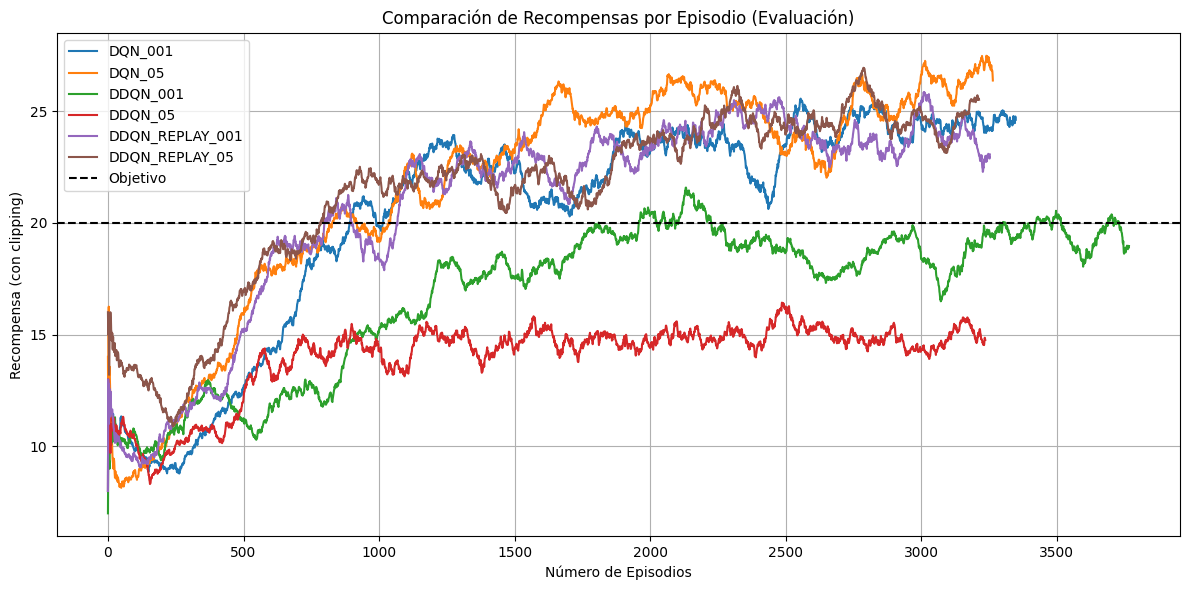

In [47]:
Modelos_a_procesar_2 = ['DQN_001', 'DQN_05', 'DDQN_001', 'DDQN_05','DDQN_REPLAY_001','DDQN_REPLAY_05']

resumen_resultados, rewards, rewards_ep, loss, pasos, duracion = procesar_fichero(Modelos_a_procesar_2)
df_resultados = pd.DataFrame(resumen_resultados)
print("\n📊 COMPARATIVA DE MODELOS DDQN/DQN:")
print(df_resultados.to_string(index=False))

graficar_superpuesto(rewards_ep, 'Recompensas', 'Recompensa (con clipping)', target_reward=TARGET_REWARD)
  

En esta gráfica vemos la comparación de recompensas medias, por episodio, durante la evaluación de distintos modelos DQN, DDQN y DDQN con replay, con dos configuraciones de hiperparámetros diferenciadas: una con learning_rate = 0.001 y target_update_interval = 5000 (terminadas en _001), y otra con epsilon_start = 0.5 y epsilon_stop = 0.01 (terminadas en _05)
* Parece que el cambio de epsilon_start = 0.5 y epsilon_stop = 0.01 es el que menos afecta a los resultados finales y por ejemplo: DDQN_REPLAY_05 (marrón) destaca como el modelo con mejor rendimiento global: alcanza rápidamente la línea de objetivo (~20 de recompensa), se mantiene estable y presenta una baja varianza. DQN_05 (naranja) también ofrece un rendimiento notablemente bueno y consistente, muy cerca del mejor modelo. Aunque estos resultados no afectan al objetivo actual de conseguir 20 puntos si intentaramos superarlos y mejorar el aprendizaje, no tenemos garantías que si extendemos el número de pasos durante el aprendizaje no quedase estancado y paralizado en algún nivel<br><br>
* El cambio de learning_rate = 0.001 y target_update_interval = 5000, no parece que tampoco tenga un gran efecto en el resultado final y tanto DDQN_REPLAY_001 (morado) y DQN_001 (azul) alcanzan el objetivo, pero tardan más y son algo más inestables.<br><br>
* DDQN_05 (verde) y especialmente DDQN_001 (rojo) muestran un desempeño claramente inferior, sin llegar al umbral objetivo y con trayectorias de recompensa planas o erráticas. Sobre todo con epsilon_start = 0.5 y epsilon_stop = 0.01, se nota que al trabajar con una memoria de 4 frames y aprendizaje paso a paso, necesita una exploración más amplia y recortala provoca un estancamiento y queda atrapado sin obtener mejora alguna. El cambio del learning rating también parece que provoca un estancamiento aunque más tardio y con un nivel de recompensas superior

**Conclusiones:**<br>
Los cambios realizados —incremento del learning rate a 0.001 y reducción del target update interval a 5000— han tenido un impacto positivo en la mayoría de los modelos, especialmente aquellos con replay buffer, que se benefician de actualizaciones más frecuentes y aprendizaje más agresivo. En particular, DDQN_REPLAY_05 emerge como la mejor combinación entre arquitectura y configuración, alcanzando una media de recompensa superior a 21.3 y logrando el objetivo con estabilidad. En cambio, el uso de DDQN sin replay, incluso con los nuevos hiperparámetros, no logra competir en rendimiento, lo que refuerza la importancia del replay buffer en este entorno.

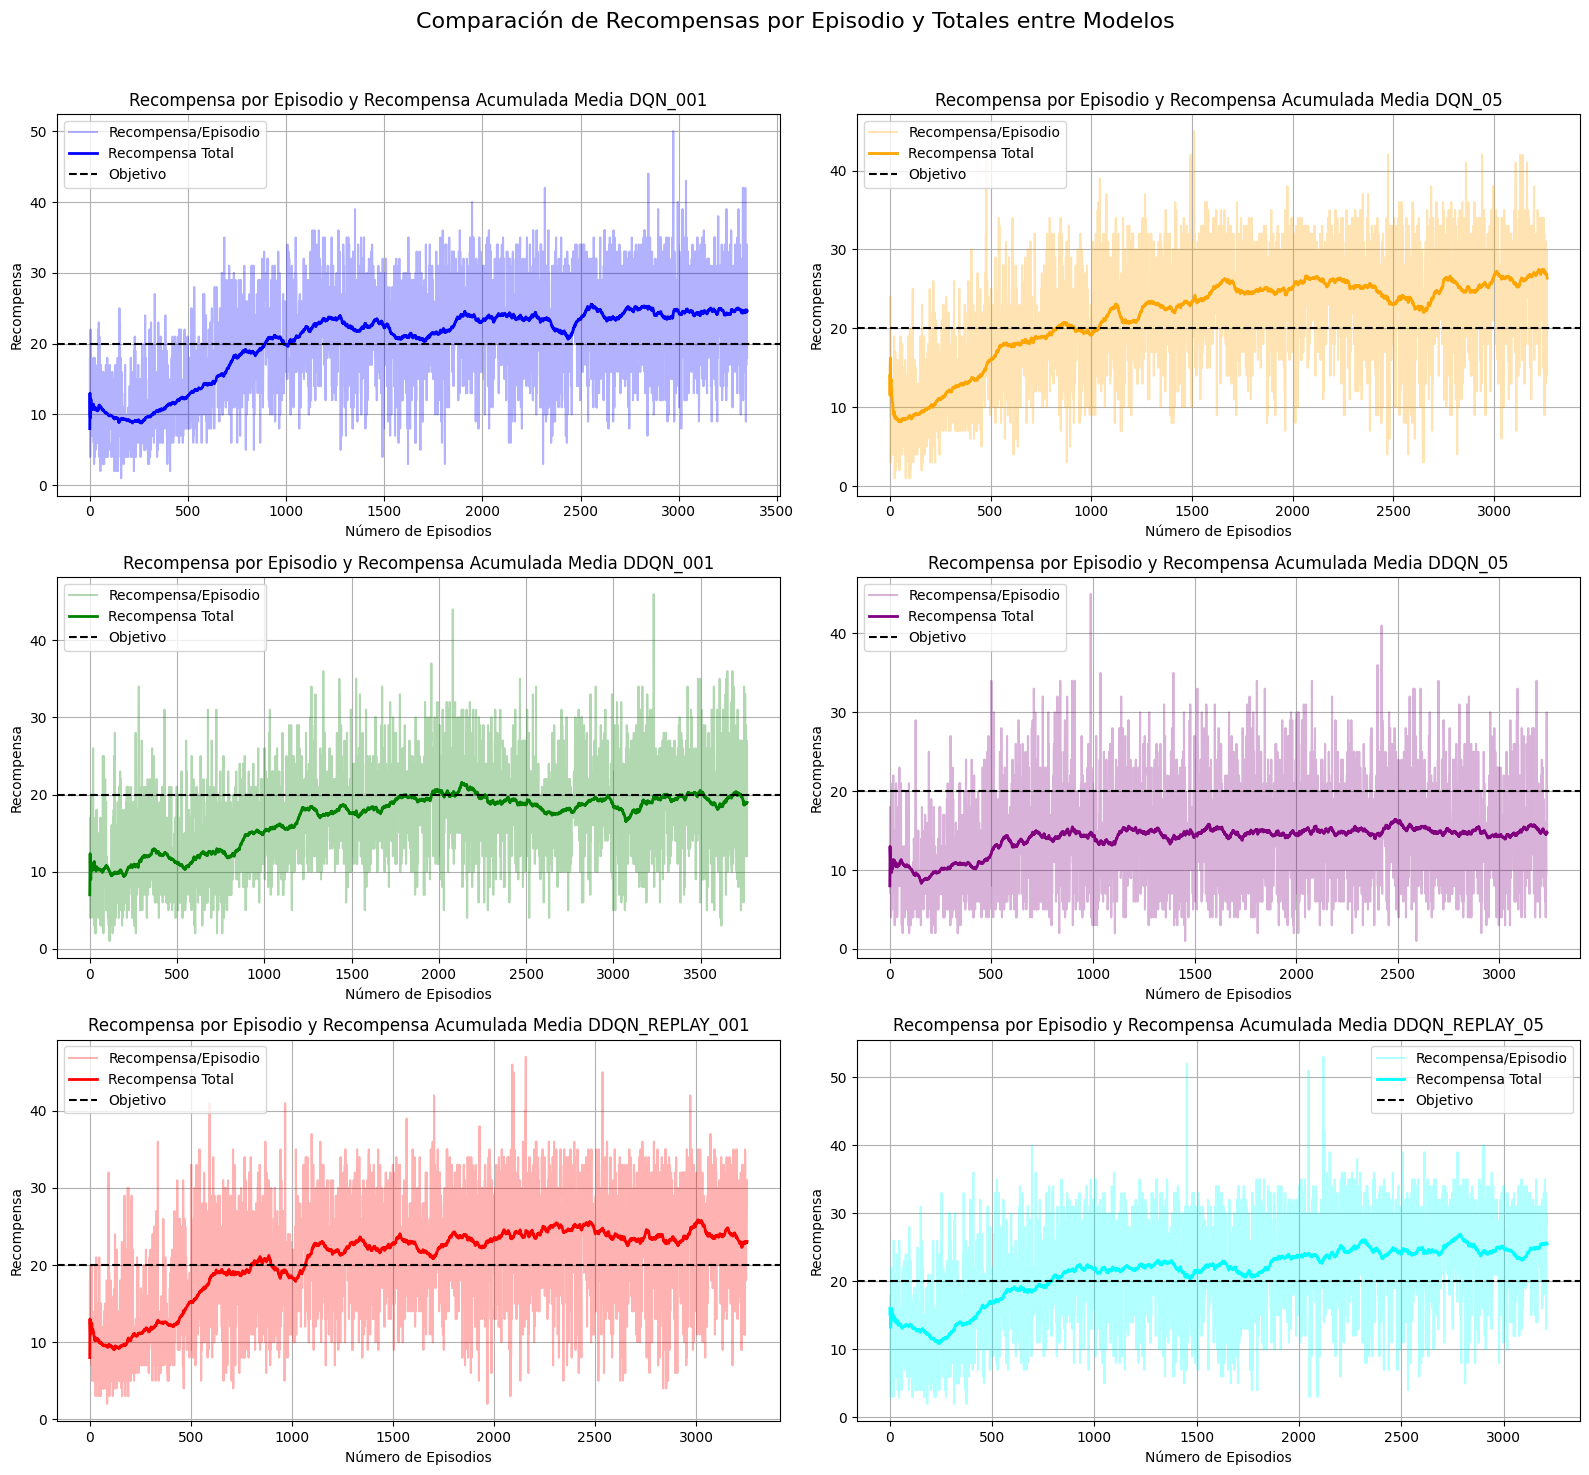

In [48]:
graficar_reward(rewards, rewards_ep)

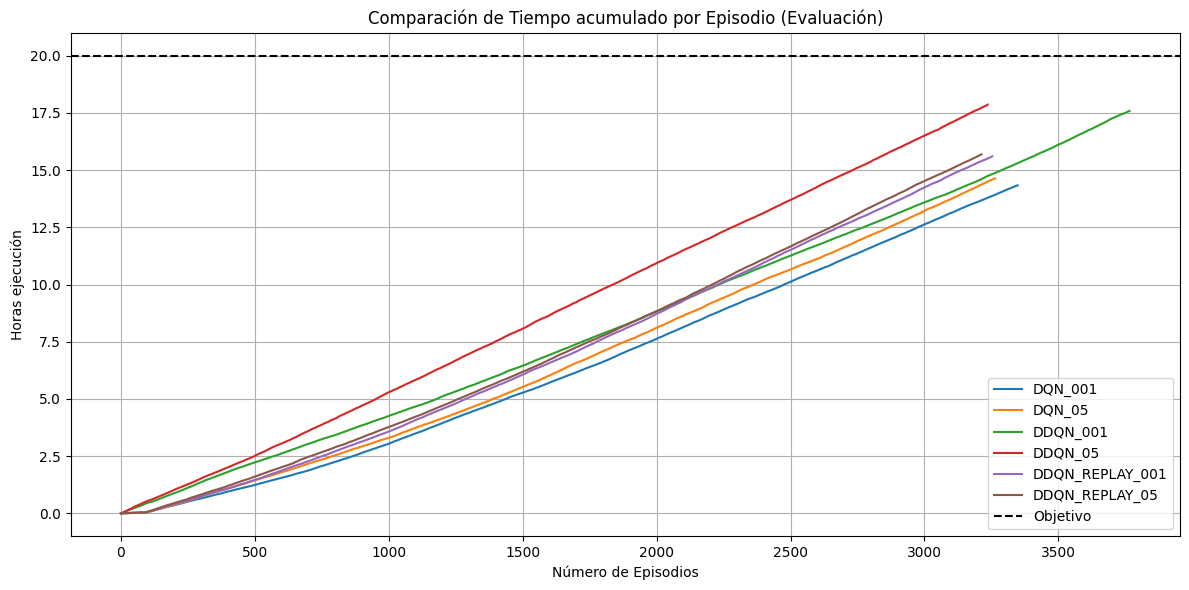

In [49]:
graficar_superpuesto(duracion, 'Tiempo acumulado', 'Horas ejecución', target_reward=TARGET_REWARD)

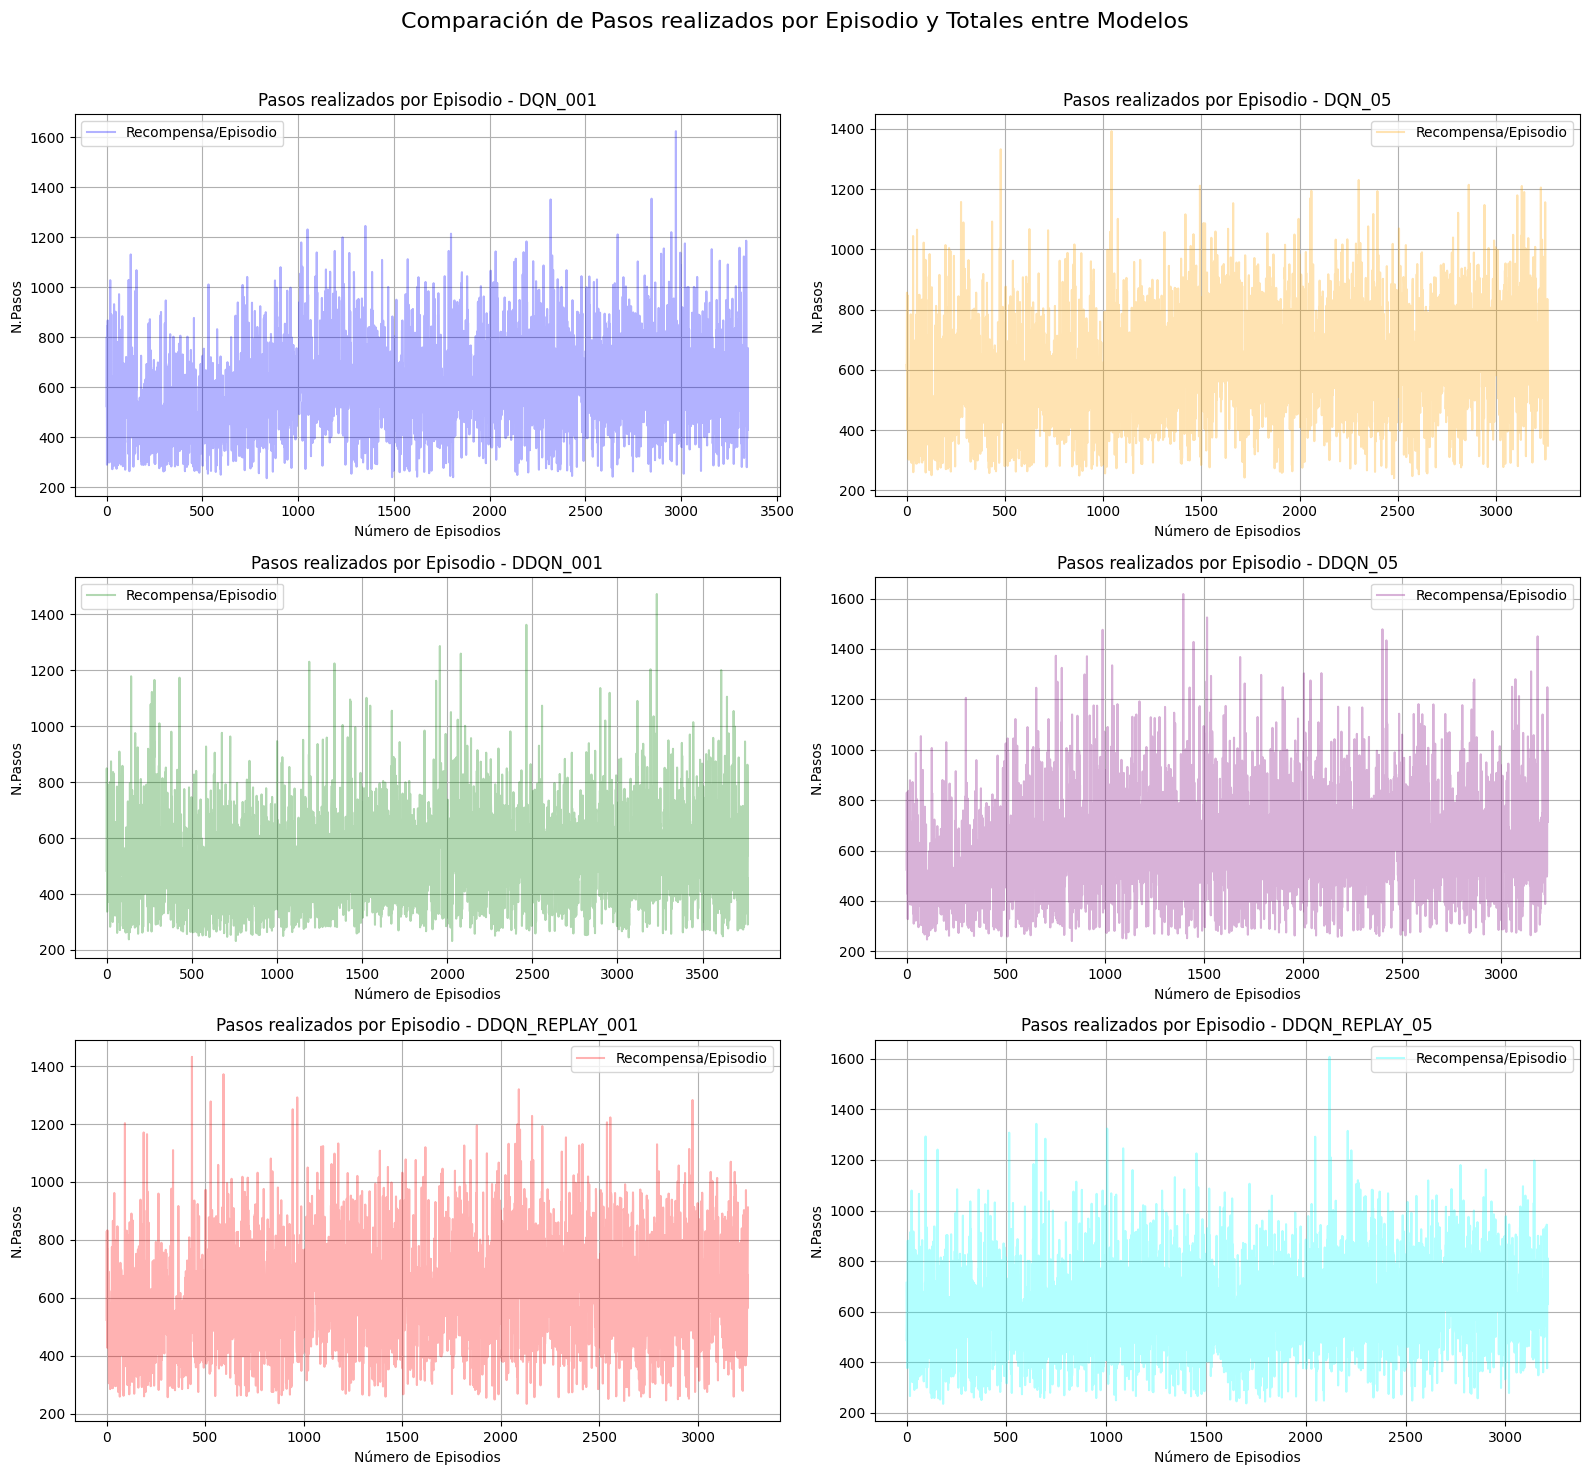

In [50]:
# target_reward = 0, pues no es necesario marcar objetivo
graficar_repartido(pasos, 'Pasos realizados', 'N.Pasos', target_reward=0)

Estas gráficas de "Pasos realizados por Episodio" indican que, para todos los modelos DQN y DDQN evaluados, la duración de los episodios es altamente variable y no parece disminuir de forma consistente a lo largo del entrenamiento. Esto evidencia (como ya sabíamos) que el aprendizaje de los agentes se enfoca más en maximizar la recompensa acumulada dentro de cada episodio, en lugar de optimizar la eficiencia en términos de la cantidad de pasos necesarios para completarlos. La variabilidad en la duración de los episodios parece ser una característica inherente al entorno o al problema que se está resolviendo, y los hiperparámetros ajustados no están directamente relacionados con la optimización de este aspecto.

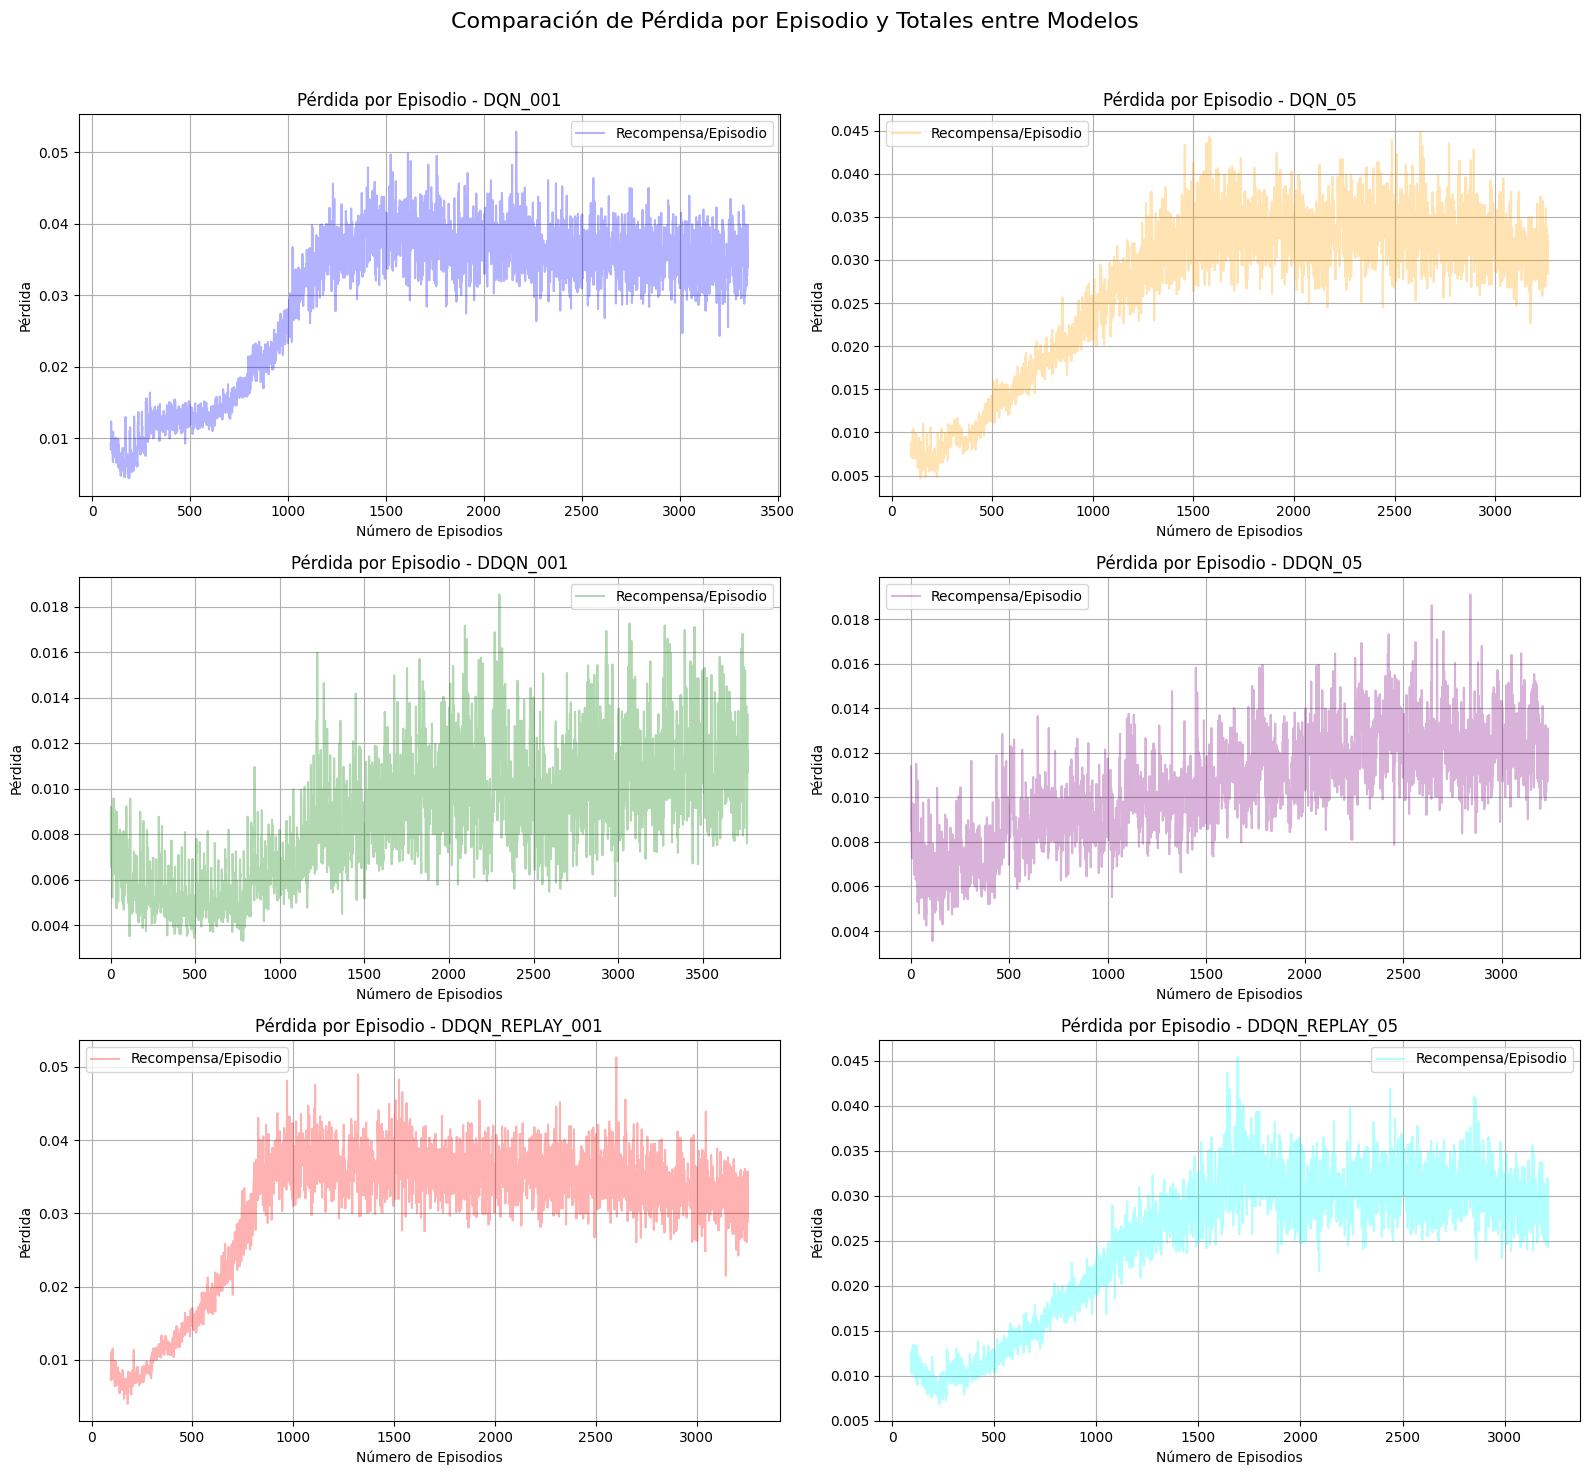

In [51]:
# target_reward = 0, pues no es necesario marcar objetivo
graficar_repartido(loss, 'Pérdida', 'Pérdida', target_reward=0)

##### Análisis Específico por Modelo:
Recordar que hay dos configuraciones de hiperparámetros diferenciadas: una con learning_rate = 0.001 y target_update_interval = 5000 (terminadas en _001), y otra con epsilon_start = 0.5 y epsilon_stop = 0.01 (terminadas en _05)

* **DQN_001 (Gráfico superior izquierdo - azul):**
La pérdida comienza baja y aumenta rápidamente hasta aproximadamente 0.04-0.045 en los primeros 500-1000 episodios. Después de eso, se estabiliza y fluctúa en un rango relativamente estrecho alrededor de 0.04, con algunos picos ocasionales. Esto indica que el modelo converge y se mantiene estable en su aprendizaje, aunque con un nivel de pérdida que es de los más altos entre los modelos mostrados.

* **DQN_05 (Gráfico superior derecho - naranja):**
La pérdida sigue un patrón similar al DQN_001, aumentando rápidamente al inicio (hasta 0.035-0.04) en los primeros 1000-1500 episodios. Se estabiliza alrededor de ese nivel, mostrando fluctuaciones. Comparado con el DQN_001, su nivel de pérdida estabilizado parece ser ligeramente inferior, lo que podría indicar una convergencia un poco más eficiente o una predicción ligeramente más precisa en promedio.

* **DDQN_001 (Gráfico central izquierdo - verde):**
Este modelo muestra un patrón de pérdida notablemente diferente y, en general, mucho más bajo que los modelos DQN. La pérdida comienza muy baja (casi 0) y aumenta gradualmente, pero solo hasta un rango de 0.008 a 0.018. Fluctúa significativamente dentro de este rango bajo a lo largo de todo el entrenamiento. El nivel de pérdida tan bajo y la mayor variabilidad dentro de ese rango reducido sugieren que el uso de DDQN, combinado con la configuración (learning_rate = 0.001 y target_update_interval = 5000), permite al modelo aprender con una pérdida mucho menor.

* **DDQN_05 (Gráfico central derecho - morado):**
Similar al DDQN_001, este modelo también exhibe un nivel de pérdida muy bajo, en el rango de 0.006 a 0.018. La pérdida aumenta gradualmente al principio y luego se estabiliza dentro de este rango. La fluctuación es notable, pero el valor absoluto de la pérdida sigue siendo muy inferior al de los modelos DQN.

* **DDQN_REPLAY_001 (Gráfico inferior izquierdo - rojo):**
Este gráfico presenta un patrón y nivel de pérdida muy similar al DQN_001 y DQN_05, con la pérdida aumentando y estabilizándose alrededor de 0.04. Esto es interesante porque, a pesar de ser un "DDQN_REPLAY", su comportamiento de pérdida es más parecido a los DQN puros que a los otros DDQN (DDQN_001 y DDQN_05) que mostraron pérdidas mucho más bajas. Esto podría deberse a la interacción específica de la configuración "REPLAY" con los hiperparámetros learning_rate = 0.001 y target_update_interval = 5000 o a la diferencia de su inicialización y/o arquitectura.

* **DDQN_REPLAY_05 (Gráfico inferior derecho - cian):**
También muestra un patrón de pérdida similar al DDQN_REPLAY_001, con un aumento inicial y estabilización alrededor de 0.03 a 0.04. Similar al caso anterior, su nivel de pérdida es significativamente más alto que los DDQN_001 y DDQN_05, lo que sugiere que la configuración "REPLAY" podría estar influyendo en la magnitud de la pérdida o que las arquitecturas/entrenamientos no son directamente comparables en términos absolutos de pérdida con los otros DDQN.


📊 COMPARATIVA DE MODELOS DDQN/DQN:
 Modelo     Media      STD  Máximo  Máximo abs.  Mínimo abs.  Objetivo alcanzado
    DQN 20.212887 5.098419   26.59         53.0          1.0                True
DQN_001 20.410102 4.961271   25.56         50.0          1.0                True
 DQN_05 21.591063 5.093945   27.48         45.0          1.0                True


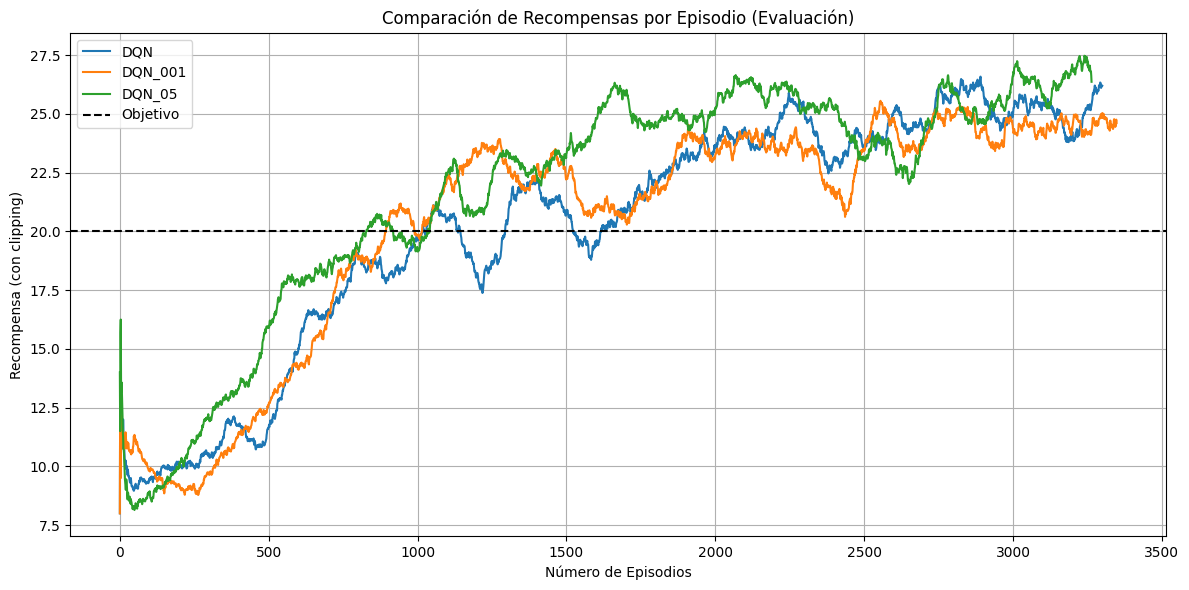

In [52]:
Modelos_a_procesar_4 = ['DQN','DQN_001', 'DQN_05']

resumen_resultados, rewards, rewards_ep, loss, pasos, duracion = procesar_fichero(Modelos_a_procesar_4)
df_resultados = pd.DataFrame(resumen_resultados)
print("\n📊 COMPARATIVA DE MODELOS DDQN/DQN:")
print(df_resultados.to_string(index=False))

graficar_superpuesto(rewards_ep, 'Recompensas', 'Recompensa (con clipping)', target_reward=TARGET_REWARD)

En esta evaluación de los modelos DQN/DDQN, observamos un notable éxito generalizado, ya que los tres modelos probados consiguen alcanzar y mantenerse por encima del objetivo de recompensa de 20. El modelo base, DQN, presenta un rendimiento sólido con una recompensa media de 20.21 y una desviación estándar de 5.09, lo que indica un buen desempeño general, aunque con cierta variabilidad. Su curva en el gráfico muestra un ascenso constante, superando el objetivo alrededor del episodio 1500 y manteniéndose por encima. El modelo DQN_5000 (que representa un ajuste de learning_rate más alto =0.001 y una actualización de la red objetivo más frecuente, cada 5000 pasos) exhibe un rendimiento muy similar al DQN base, con una media de recompensa de 20.41 y una desviación estándar comparable de 4.96. Este modelo también cruza el umbral objetivo y se mantiene por encima, con una estabilidad similar a la del modelo base, lo que sugiere que este ajuste en particular no introdujo un cambio drástico. Sin embargo, el modelo DQN_05 (con los ajustes en epsilon_start y epsilon_stop) emerge como el de mejor rendimiento global en esta instancia. Alcanza la recompensa media más alta de 21.59 y, la menor desviación estándar de 5.09, lo que indica no solo un promedio superior, sino también una mayor consistencia y estabilidad en la recompensa obtenida a lo largo de los episodios. Su curva en el gráfico, después de un inicio en línea con los demás, muestra una tendencia a alcanzar y mantener niveles de recompensa ligeramente superiores y más estables que los otros dos modelos. En resumen, esta evaluación demuestra la eficacia de las tres configuraciones para lograr el objetivo, destacando al DQN_05 como la opción más robusta y de mayor rendimiento medio, confirmando que la optimización de los parámetros de epsilon puede ser clave para la excelencia en la convergencia y estabilidad del agente.


📊 COMPARATIVA DE MODELOS DDQN/DQN:
  Modelo     Media      STD  Máximo  Máximo abs.  Mínimo abs.  Objetivo alcanzado
    DDQN 17.213464 4.514330   23.56         46.0          1.0               False
DDQN_001 16.892766 3.286443   21.58         46.0          1.0               False
 DDQN_05 13.988001 1.701417   16.43         45.0          1.0               False


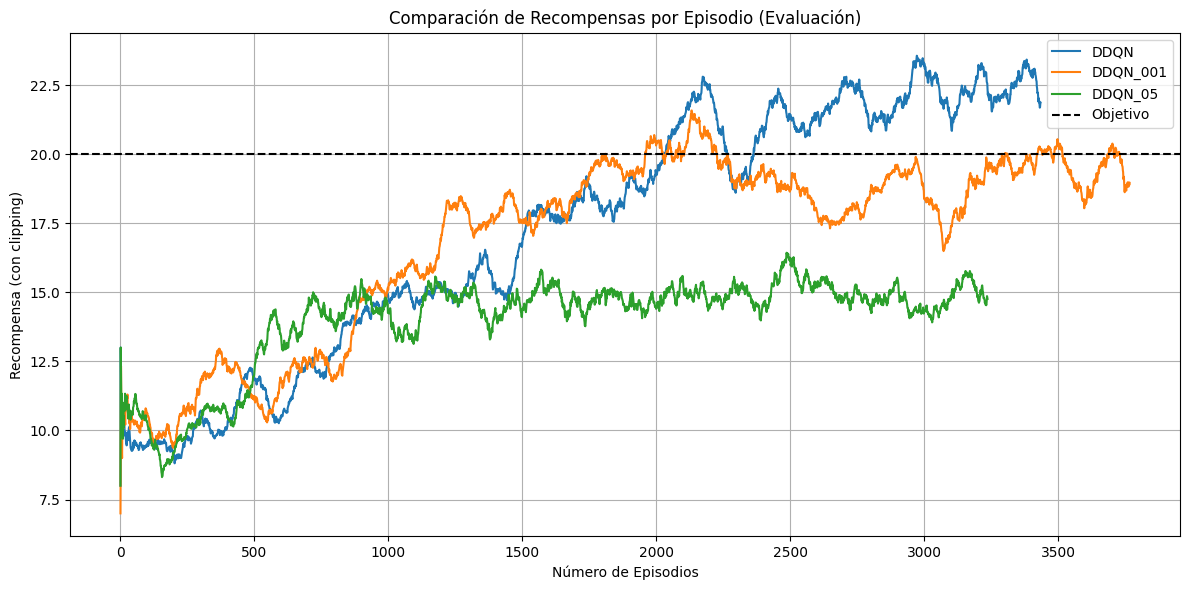

In [53]:
Modelos_a_procesar_3 = ['DDQN','DDQN_001','DDQN_05']

resumen_resultados, rewards, rewards_ep, loss, pasos, duracion = procesar_fichero(Modelos_a_procesar_3)
df_resultados = pd.DataFrame(resumen_resultados)
print("\n📊 COMPARATIVA DE MODELOS DDQN/DQN:")
print(df_resultados.to_string(index=False))

graficar_superpuesto(rewards_ep, 'Recompensas', 'Recompensa (con clipping)', target_reward=TARGET_REWARD)

En esta nueva evaluación de los modelos DQN/DDQN, observamos un panorama diferente en el rendimiento global, ya que ninguno de los modelos logra alcanzar consistentemente el objetivo de recompensa de 20. El modelo base, DDQN, aunque muestra la recompensa media más alta (17.21) y el pico máximo más elevado (23.56), también presenta la mayor desviación estándar (4.51), lo que sugiere una mayor variabilidad en sus resultados a lo largo del entrenamiento. La curva de DDQN en el gráfico ilustra esta variabilidad, con periodos donde se acerca o incluso supera brevemente el objetivo, pero sin mantenerse de forma sostenida. Por su parte, el DDQN_001, que probablemente incorpora las configuraciones de un learning_rate más alto y una actualización de la red objetivo más frecuente, presenta una recompensa media ligeramente inferior (16.89) y una desviación estándar menor (3.28), indicando una mayor estabilidad pero sin la capacidad de alcanzar el objetivo. Su curva en el gráfico muestra un ascenso constante pero se estabiliza por debajo de la línea objetivo. Finalmente, el DDQN_05, que modifica los parámetros de epsilon (probablemente con una exploración inicial más limitada o una explotación más temprana), muestra el rendimiento más deficiente de los tres, con la recompensa media más baja (13.98) y la menor desviación estándar, lo que se traduce en una curva de recompensa que se mantiene consistentemente por debajo de los otros modelos y lejos del objetivo. En resumen, esta evaluación destaca que las configuraciones de hiperparámetros probadas en esta instancia no lograron la convergencia deseada hacia el objetivo de recompensa, siendo el modelo base (DDQN) el que, a pesar de su variabilidad, se acercó más al umbral deseado, mientras que los ajustes en epsilon en el DDQN_05 resultaron en una degradación significativa del rendimiento y un estancamiento generalizado en los resultados


📊 COMPARATIVA DE MODELOS DDQN/DQN:
         Modelo     Media      STD  Máximo  Máximo abs.  Mínimo abs.  Objetivo alcanzado
    DDQN_REPLAY 20.283780 4.735162   25.86         52.0          1.0                True
DDQN_REPLAY_001 20.752674 4.518879   25.85         47.0          2.0                True
 DDQN_REPLAY_05 21.339776 3.888219   26.94         53.0          2.0                True


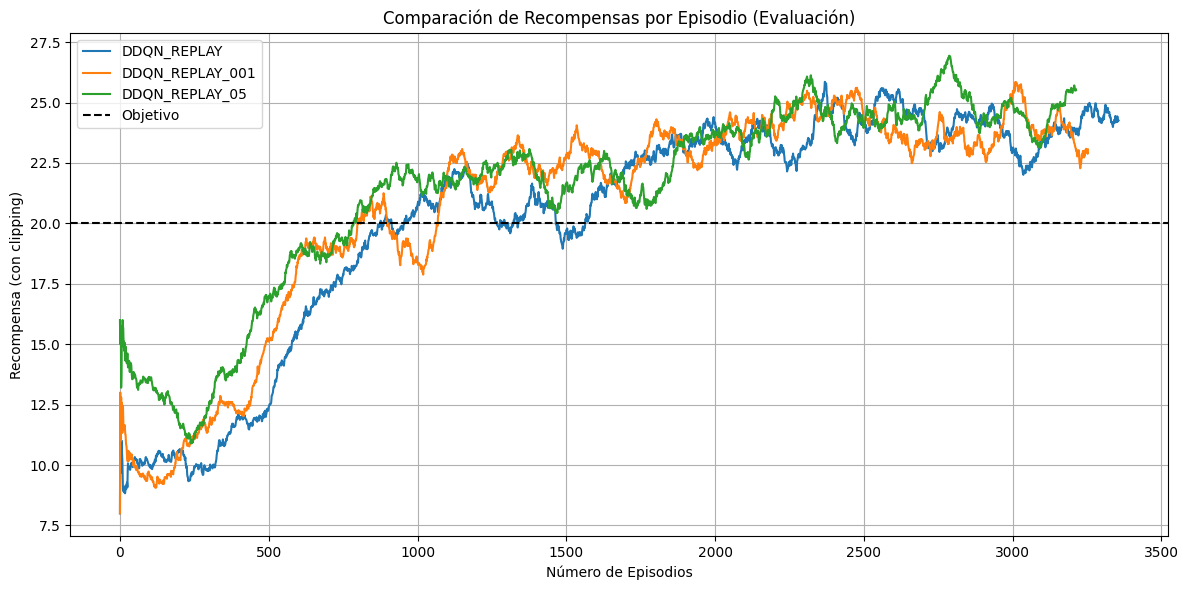

In [54]:
Modelos_a_procesar_5 = ['DDQN_REPLAY','DDQN_REPLAY_001','DDQN_REPLAY_05']

resumen_resultados, rewards, rewards_ep, loss, pasos, duracion = procesar_fichero(Modelos_a_procesar_5)
df_resultados = pd.DataFrame(resumen_resultados)
print("\n📊 COMPARATIVA DE MODELOS DDQN/DQN:")
print(df_resultados.to_string(index=False))

graficar_superpuesto(rewards_ep, 'Recompensas', 'Recompensa (con clipping)', target_reward=TARGET_REWARD)

El modelo base, DDQN_REPLAY, con su configuración estándar de learning_rate bajo y una actualización de red objetivo más espaciada, establece un punto de referencia sólido al alcanzar una recompensa media de 20.28. Al introducir cambios en el DDQN_REPLAY_001, que incorpora un learning_rate más alto (0.001) y una actualización de la red objetivo más frecuente (cada 5000 pasos), observamos una ligera mejora en la recompensa media (20.75) y una pequeña reducción en la desviación estándar, indicando una mayor estabilidad, aunque su recompensa máxima fue ligeramente inferior a la base. Sin embargo, la configuración DDQN_REPLAY_05, que ajusta los parámetros de epsilon (epsilon_start a 0.5 y epsilon_stop a 0.01) para una exploración inicial menos agresiva y una transición más rápida a la explotación, se destaca como la más exitosa en términos de recompensa media (21.33) y la más estable, al presentar la menor desviación estándar. Aunque su curva de aprendizaje inicial en el gráfico puede parecer un poco más retrasada, una vez que el modelo converge, demuestra una robustez superior y alcanzó el pico de recompensa más alto de los tres. En definitiva, si bien todas las configuraciones lograron el objetivo de recompensa, la optimización de los parámetros de epsilon resultó ser la más influyente en la mejora del rendimiento general y la consistencia del agente.